# ETL for Cost Dataset: Step One
I am manually doing this in order to assure accuracy. 

Once I am assurred that the code is correct and makes sense then I will condense it in a function as a data pipeline for future data. 

This file will only contain the cleaning of the column names in order to append 2015-2021 Datasets. Cleaning, outliers, NAs will be handled next.

AI is used to improve efficiency in creating the code, troubleshooting, and giving advice.

## Needed Libraries

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import cluster
import sklearn
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [323]:
# allow us to see all columns
pd.set_option('display.max_columns', None)

## LOAD DATASET

In [324]:
df_original = pd.read_csv("../Datasets_P1/2015_CostReport.csv")
df_original.sample(5)

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\660363129.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("../Datasets_P1/2015_CostReport.csv")


rpt_rec_num  Provider_CCN                         Facility_Name  \
8632      1147498        505230    FIR LANE HEALTH AND REHABILITATION   
922       1123191        675395  VAL VERDE CNTY HOSP DIST-VAL VRD NRC   
2209      1136218        175477        LEONARDVILLE NURSING HOME  INC   
5149      1140035        525426           HILLVIEW HEALTH CARE CENTER   
2714      1136949        385237                 FERNHILL ESTATES  LLC   

              Street_Address          City State_Code    Zip_Code     County  \
8632  2430 NORTH 13TH STREET       SHELTON         WA       98584      MASON   
922        100 HERMANN DRIVE       DEL RIO         TX       78840  VAL VERDE   
2209           409 W. BARTON  LEONARDVILLE         KS  66449-0148      RILEY   
5149    3501 PARK LANE DRIVE     LA CROSSE         WI  54601-7700  LA CROSSE   
2714        5737 NE 37TH AVE      PORTLAND         OR       97211  MULTNOMAH   

     Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
8632                99950                  R               1/1/2015   
922               99945.0                  R               1/1/2015   
2209              99917.0                  R               1/1/2015   
5149              29100.0                  U               1/1/2015   
2714              38900.0                  U               1/1/2015   

     Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
8632            6/30/2015                4            1194550.0   
922             9/30/2015                4             398666.0   
2209           12/31/2015                4             233227.0   
5149           12/31/2015                4            1896360.0   
2714           12/31/2015                4             414334.0   

      Accounts_payable  Buildings  Cash_on_hand_and_in_banks  \
8632          126787.0  4596934.0                    12047.0   
922           631314.0        NaN                   698046.0   
2209           62224.0  2505531.0                   311904.0   
5149          243212.0  3798841.0                  3092602.0   
2714          131000.0        NaN                   159225.0   

      General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
8632             -360837.0      6734787.0             1684070.0   
922              -272347.0      3044759.0              598832.0   
2209             2438526.0      3005141.0              341701.0   
5149             6115359.0     13870548.0             1816123.0   
2714             1218471.0      3979353.0              235130.0   

      Inpatient_Revenue  Less_Total_Operating_Expense  \
8632          6734787.0                     5527880.0   
922           3044759.0                     2955680.0   
2209          3005141.0                     3013958.0   
5149         13870548.0                    16323783.0   
2714          3979353.0                     3547155.0   

      Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
8632                   1586038.0                 822019.0   -367389.0   
922                          NaN                 102532.0     91237.0   
2209                         NaN                 735151.0      5869.0   
5149                   -299334.0                2065777.0   -327359.0   
2714                    112671.0                 143876.0    320495.0   

      Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
8632                 -379131.0            5148749.0           135.0   
922                    89079.0            3044759.0            80.0   
2209                   -8817.0            3005141.0            59.0   
5149                -2153901.0           14169882.0           199.0   
2714                  319527.0            3866682.0            63.0   

      Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
8632           NaN                    76114.0                  3365207.0   
922            NaN                    59417.0                  1552113.0   
2209           NaN             

In [325]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15402 entries, 0 to 15401
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rpt_rec_num                      15402 non-null  int64  
 1   Provider_CCN                     15402 non-null  int64  
 2   Facility_Name                    15402 non-null  object 
 3   Street_Address                   15399 non-null  object 
 4   City                             15402 non-null  object 
 5   State_Code                       15402 non-null  object 
 6   Zip_Code                         15402 non-null  object 
 7   County                           15402 non-null  object 
 8   Medicare_CBSA_Number             14914 non-null  object 
 9   Rural_versus_Urban               14927 non-null  object 
 10  Fiscal_Year_Begin_Date           14950 non-null  object 
 11  Fiscal_Year_End_Date             14950 non-null  object 
 12  Type_of_Control   

## Change target variable to Target. 

In [326]:
df_original1 = df_original

In [327]:
df_original1.rename(columns={'Net_Income': 'Target'}, inplace=True)

In [328]:
df_original1.isnull().sum()

rpt_rec_num                   0
Provider_CCN                  0
Facility_Name                 0
Street_Address                3
City                          0
                           ... 
Total_fund_balances         484
Total_liabilities           617
Total_other_Assets         4727
Wage_related_Costs_core     545
Fixed_equipment            8790
Length: 74, dtype: int64

## NAS OVERVIEW

### Look for feature that have large Percent Missing and close to 0 Percent difference and low correlation to Target.
This means that the feature is irrelevant and proabably shoud be taken out. 
### Difference and Percentage Difference
Large Differences: Missingness is informative; consider modeling missingness explicitly or imputing carefully.
Small Differences: Missingness is likely random; imputation is less critical to performance.

#### Rules to follow include 90% NA bias rule. Correlation +-0.1 or less. 

Text(0.5, 1.0, 'Missing Values Heatmap')

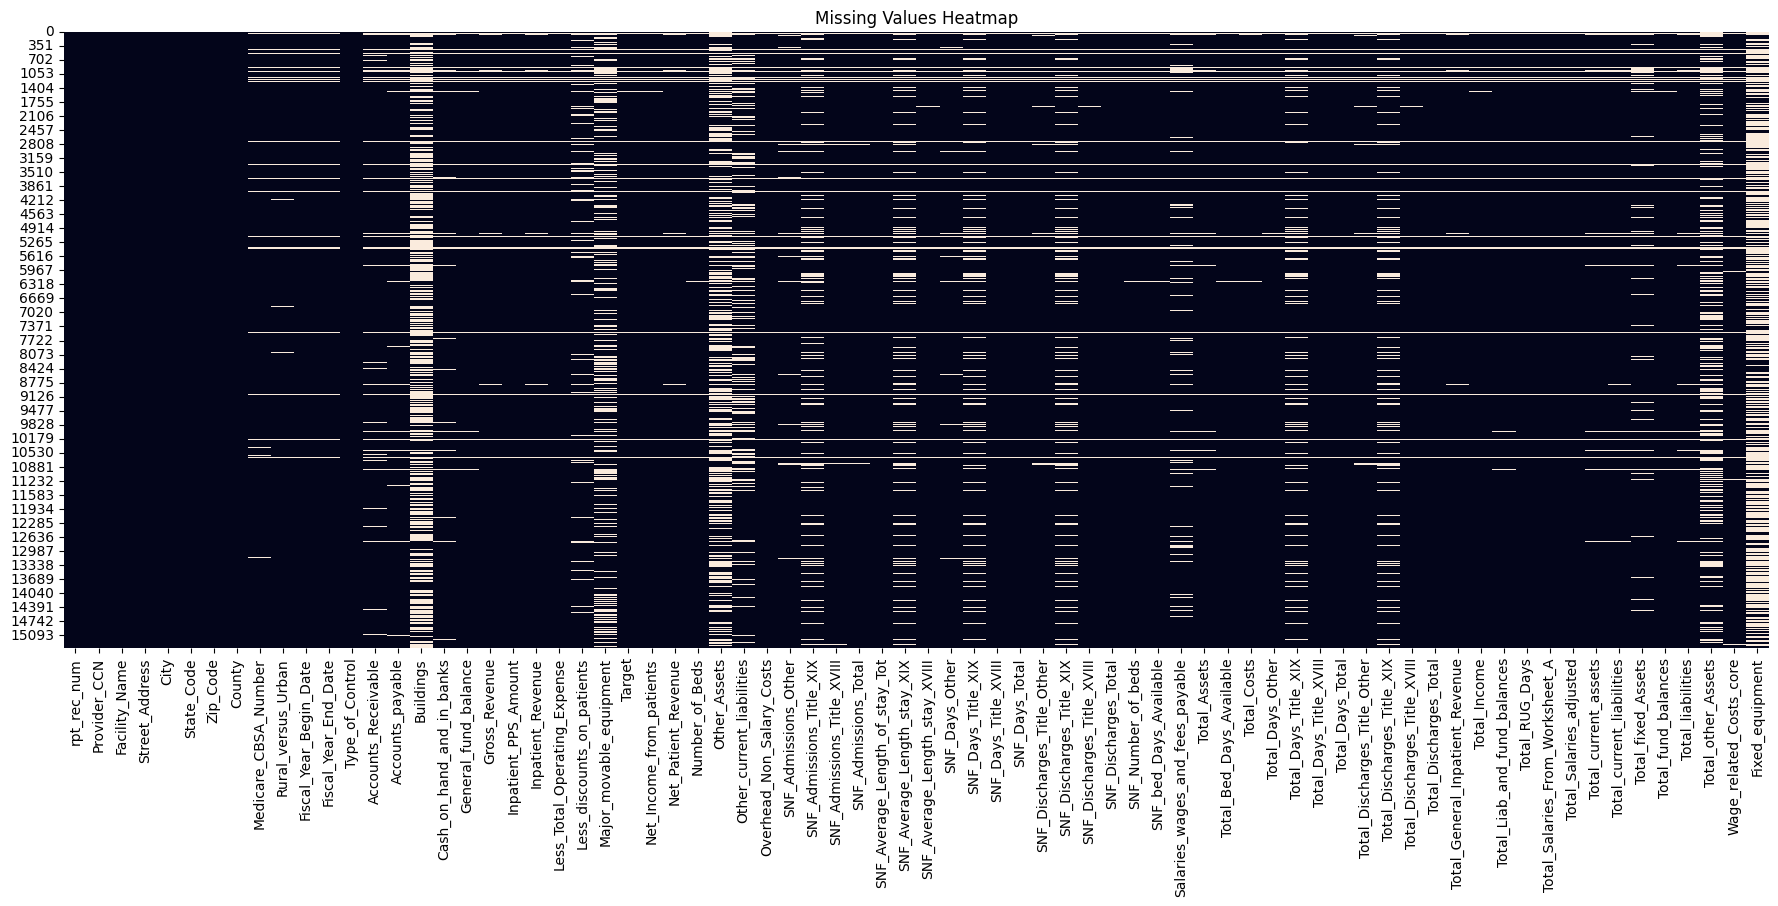

In [329]:

plt.figure(figsize=(22, 8))
sns.heatmap(df_original.isnull(), cbar=False)
plt.title("Missing Values Heatmap")


Look at this graph to see what variables you might want to see later and watch for multicollinearity or why theres NA's etc. 

# I want to Merge now and Make a Master Data Table for this Table with the years. 

Append the years together.

## First upload other Provider datasets

In [330]:
df15 = pd.read_csv("../Datasets_P1/2015_CostReport.csv")
df15.sample(5)

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\2000465137.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df15 = pd.read_csv("../Datasets_P1/2015_CostReport.csv")


rpt_rec_num  Provider_CCN                         Facility_Name  \
6085      1141157         15145              GOLDEN LIVING-RIVERCHASE   
8247      1145565        365897                    NEW LEBANON CENTER   
5267      1140163         56457                GREENRIDGE SENIOR CARE   
8533      1146893        145986                     LAKE FOREST PLACE   
7804      1143859        225539  BIRCH MANOR REHABILITATION & SKILLED   

              Street_Address         City State_Code    Zip_Code  \
6085  2500 RIVER HAVEN DRIVE   BIRMINGHAM         AL       35244   
8247         101 MILLS PLACE  NEW LEBANON         OH  45345-1430   
5267      2150 PYRAMID DRIVE     RICHMOND         CA       94803   
8533    1100 PEMBRIDGE DRIVE  LAKE FOREST         IL       60045   
7804     44 NEW LOMBARD ROAD     CHICOPEE         MA        1020   

            County Medicare_CBSA_Number Rural_versus_Urban  \
6085     JEFFERSON              13820.0                  U   
8247    MONTGOMERY                19380                  U   
5267  CONTRA COSTA              36084.0                  U   
8533          LAKE                29404                  U   
7804       HAMPDEN              44140.0                  U   

     Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
6085               1/1/2015           12/31/2015                4   
8247               1/1/2015           12/31/2015                4   
5267               1/1/2015           12/31/2015                4   
8533               4/1/2015           11/30/2015                4   
7804               1/1/2015            2/29/2016                4   

      Accounts_Receivable  Accounts_payable    Buildings  \
6085            1292399.0          177772.0          NaN   
8247             800068.0          215696.0          NaN   
5267             645282.0          567172.0          NaN   
8533            3935889.0        11309158.0  398250866.0   
7804            1399598.0          270468.0    1182250.0   

      Cash_on_hand_and_in_banks  General_fund_balance  Gross_Revenue  \
6085                    17600.0             1203280.0     12561216.0   
8247                    99500.0              816001.0     10067008.0   
5267                   297692.0              637072.0      8314746.0   
8533                 14176023.0            38672010.0      7810377.0   
7804                   117613.0             1512216.0      6195812.0   

      Inpatient_PPS_Amount  Inpatient_Revenue  Less_Total_Operating_Expense  \
6085             2265445.0         12561216.0                    10411635.0   
8247              882998.0         10067008.0                     7050648.0   
5267              599069.0          8314746.0                     5903338.0   
8533             2036501.0          7810377.0                    19867409.0   
7804              784305.0          6195812.0                     6181889.0   

      Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
6085                   1974842.0                 476588.0    445480.0   
8247                   2847452.0                 114646.0    170914.0   
5267                   2076941.0                      NaN    345108.0   
8533                    983036.0                      NaN   1417938.0   
7804                         NaN                      NaN     61111.0   

      Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
6085                  174739.0           10586374.0           132.0   
8247                  168908.0            7219556.0           120.0   
5267                  334467.0            6237805.0            60.0   
8533               -13040068.0            6827341.0            70.0   
7804                   13923.0            6195812.0            68.0   

      Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
6085           NaN                    67153.0                  5947193.0   
8247      877467.0                   297073.0                  4120907.0   
5267   

In [331]:
df16 = pd.read_csv("../Datasets_P1/2016_CostReport.csv")
df16.sample(5)

rpt_rec_num  Provider_CCN                       Facility_Name  \
13876      1215911        495218              AFS OF FINCASTLE  INC.   
11355      1189438        465095          SUCCESSOR HEALTHCARE  INC.   
5431       1172828        335232  DEWITT REHABILITATION & NRSG. CTR.   
6618       1174300        455637     WELLINGTON PLACE LIVING & REHAB   
13254      1214197        215055            GOLDEN LIVING-CUMBERLAND   

                     Street_Address            City State_Code    Zip_Code  \
13876        188 OLD FINCASTLE ROAD       FINCASTLE         VA       24090   
11355  451 EAST BISHOP FEDERAL LANE  SALT LAKE CITY         UT       84115   
5431           211 EAST 79TH STREET        NEW YORK         NY       10021   
6618                 1802 S 31ST ST          TEMPLE         TX  76504-6712   
13254             512 WINIFRED ROAD      CUMBERLAND         MD       21502   

          County  Medicare_CBSA_Number Rural_versus_Urban  \
13876    ROANOKE               40220.0                  U   
11355  SALT LAKE               41620.0                  U   
5431   MANHATTAN               10180.0                  U   
6618        BELL               28660.0                  U   
13254   ALLEGANY               19060.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
13876               1/1/2016           12/31/2016                4   
11355               5/1/2016           12/31/2016                4   
5431                1/1/2016           12/31/2016                4   
6618                1/1/2016           12/31/2016                4   
13254               1/1/2016           12/31/2016                4   

       Accounts_Receivable  Accounts_payable  Buildings  \
13876            1848915.0         1012769.0        NaN   
11355            3382495.0          297918.0        NaN   
5431            10219883.0         5331152.0        NaN   
6618              598199.0           71973.0        NaN   
13254             990192.0          301737.0        NaN   

       Cash_on_hand_and_in_banks  General_fund_balance  Gross_Revenue  \
13876                   160861.0            -3001793.0     22443421.0   
11355                  3566322.0             2174217.0      9236140.0   
5431                   1218578.0            10682507.0     68983725.0   
6618                      1050.0             -408295.0      5667986.0   
13254                    29633.0              357948.0     15025534.0   

       Inpatient_PPS_Amount  Inpatient_Revenue  Less_Total_Operating_Expense  \
13876              741243.0         22443421.0                     8707076.0   
11355             2313848.0          9236140.0                     9596017.0   
5431             36682073.0         68983725.0                    67098365.0   
6618              2197034.0          5667986.0                     5069854.0   
13254             3589111.0         15025534.0                    10052707.0   

       Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
13876                  14045345.0                 307815.0   -187935.0   
11355                  -1725693.0                1396699.0   1261194.0   
5431                          NaN                7425536.0   1959956.0   
6618                     420096.0                 333256.0    182559.0   
13254                   4667169.0                 736071.0    640341.0   

       Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
13876                 -309000.0            8398076.0            60.0   
11355                 1365816.0           10961833.0           221.0   
5431                  1885360.0           68983725.0           499.0   
6618                   178036.0            5247890.0           145.0   
13254                  305658.0           10358365.0           134.0   

       Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
13876           NaN                   954720.0                  4475743.0   
11355     

In [332]:
df17 = pd.read_csv("../Datasets_P1/2017_CostReport.csv")
df17.sample(5)

rpt_rec_num  Provider_CCN                     Facility_Name  \
10367      1219003        165535  SUNSET KNOLL CARE & REHAB CENTER   
5843       1208525        155844            SYMPHONY OF CHESTERTON   
5176       1207702        415051       THE SCANDINAVIAN HOME  INC.   
7768       1210983        395738                         PAULS RUN   
9290       1217096        245634                  AURORA ON FRANCE   

              Street_Address          City State_Code Zip_Code        County  \
10367           401 W 5TH ST       AURELIA         IA    51005      CHEROKEE   
5843      2775 VILLAGE POINT    CHESTERTON         IN    46304        PORTER   
5176       1811 BROAD STREET      CRANSTON         RI     2905    PROVIDENCE   
7768      9896 BUSTLETON AVE  PHILADELPHIA         PA    19115  PHILADELPHIA   
9290   6500 FRANCE AVE SOUTH         EDINA         MN    55435      HENNEPIN   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
10367               99916.0                  R               6/1/2017   
5843                23844.0                  U               1/1/2017   
5176                39300.0                  U               1/1/2017   
7768                37964.0                  U               1/1/2017   
9290                33460.0                  U               7/1/2017   

      Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
10367            5/31/2018                4             229339.0   
5843            12/31/2017                4            1848579.0   
5176            12/31/2017                4            1590852.0   
7768            12/31/2017                4            3140390.0   
9290             6/30/2018                4            2410410.0   

       Accounts_payable   Buildings  Cash_on_hand_and_in_banks  \
10367           72527.0   2175093.0                   -54485.0   
5843          1220127.0         NaN                    26003.0   
5176           790146.0   4604462.0                   586762.0   
7768           767875.0  38812469.0                 10670277.0   
9290           454323.0  77490357.0                  1096494.0   

       General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
10367             -471345.0      1452584.0              122609.0   
5843             -5049938.0     18044408.0             8447344.0   
5176             10788782.0     10891497.0              944392.0   
7768             25295933.0     18433143.0             3728889.0   
9290            -10569797.0     16792717.0             6991889.0   

       Inpatient_Revenue  Less_Total_Operating_Expense  \
10367          1452584.0                     1524318.0   
5843          18044408.0                    13197207.0   
5176          10891497.0                    10037168.0   
7768          18433143.0                    28760654.0   
9290          16792717.0                    13204762.0   

       Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
10367                     88178.0                      NaN   -162367.0   
5843                    6053085.0                 380108.0  -1153150.0   
5176                    2003543.0                  33610.0    419974.0   
7768                    4392530.0                6463463.0   5692686.0   
9290                    6105387.0                1559744.0  -6537197.0   

       Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
10367                 -159912.0            1364406.0            44.0   
5843                 -1205884.0           11991323.0            70.0   
5176                 -1149214.0            8887954.0            74.0   
7768                -14720041.0           14040613.0           120.0   
9290                 -2517432.0           10687330.0            63.0   

       Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
10367           NaN                    59028.0                   720686.0   
5843            NaN                  1505622.0                  865152

In [333]:
df18 = pd.read_csv("../Datasets_P1/2018_CostReport.csv")
df18.sample(5)

rpt_rec_num  Provider_CCN                    Facility_Name  \
10026      1249889         15155  RIDGEVIEW HEALTH SERVICES  INC.   
5527       1240256        205004    DOVER FOXCROFT HEALTHCARE LLC   
8342       1244270        145026                WESTMINSTER PLACE   
12759      1264863        315157              MORRIS HILLS CENTER   
10937      1251602        365093           THE GOOD SHEPHERD HOME   

           Street_Address            City State_Code Zip_Code       County  \
10026  907 11TH STREET NE          JASPER         AL    35501       WALKER   
5527    1037 WEST MAIN ST  DOVER FOXCROFT         ME     4426  PISCATAQUIS   
8342    3200 GRANT STREET        EVANSTON         IL    60201         COOK   
12759   77 MADISON AVENUE      MORRISTOWN         NJ     7960       MORRIS   
10937   622 CENTER STREET         ASHLAND         OH    44805      ASHLAND   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
10026               13820.0                  U               7/1/2018   
5527                99920.0                  R               1/1/2018   
8342                16974.0                  U               4/1/2018   
12759               35084.0                  U               1/1/2018   
10937               99936.0                  R               7/1/2018   

      Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
10026            6/30/2019                4            1199661.0   
5527            12/31/2018                4             603046.0   
8342             3/31/2019                4            1881403.0   
12759           12/31/2018                4            2378883.0   
10937            6/30/2019                4            1767813.0   

       Accounts_payable    Buildings  Cash_on_hand_and_in_banks  \
10026          904794.0          NaN                  1149155.0   
5527           288231.0    4931870.0                   956965.0   
8342          5955326.0  163047431.0                 17659232.0   
12759         1048405.0          NaN                     4241.0   
10937          419609.0      39901.0                  -126998.0   

       General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
10026             1301611.0     11862069.0             2534288.0   
5527                62057.0     10100105.0             1137488.0   
8342             13152699.0     28288660.0             4723564.0   
12759              768204.0     38108459.0             5174426.0   
10937             4598331.0     18689987.0             1869531.0   

       Inpatient_Revenue  Less_Total_Operating_Expense  \
10026         11862069.0                    12943622.0   
5527          10100105.0                     7864149.0   
8342          28288660.0                    22797984.0   
12759         38108459.0                    20170792.0   
10937         18689987.0                    12338933.0   

       Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
10026                   -292528.0                 299253.0   -382481.0   
5527                    2235098.0                      NaN     23116.0   
8342                    2625110.0                      NaN   2061751.0   
12759                  18358587.0                1288364.0   -365746.0   
10937                   6197769.0                      NaN    337049.0   

       Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
10026                 -789025.0           12154597.0           148.0   
5527                      858.0            7865007.0           107.0   
8342                  2865566.0           25663550.0           204.0   
12759                 -420920.0           19749872.0           287.0   
10937                  153285.0           12492218.0           130.0   

       Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
10026     6660167.0                  -136358.0                  7699691.0   
5527       563272.0                   681666.0                  4893773.0   
8342 

In [334]:
df19 = pd.read_csv("../Datasets_P1/2019_CostReport.csv")
df19.sample(5)

rpt_rec_num  Provider_CCN                       Facility_Name  \
13824      1310129        675277               CARE INN OF LA GRANGE   
14198      1311536        105513                      CLARIDGE HOUSE   
5640       1272518         56475                    VISTA POST ACUTE   
2915       1261952        155785            WEST RIVER HEALTH CAMPUS   
11514      1288473        335020  HEBREW HOME FOR THE AGED/RIVERDALE   

             Street_Address         City State_Code    Zip_Code       County  \
13824        457 NORTH MAIN    LA GRANGE         TX       78945      FAYETTE   
14198  13900 N.E. 3RD COURT  NORTH MIAMI         FL       33161         DADE   
5640          3269 D STREET      HAYWARD         CA       94541      ALAMEDA   
2915   714 S. EICKHOFF ROAD   EVANSVILLE         IN  47712-9060  VANDERBURGH   
11514  5901 PALISADE AVENUE        BRONX         NY       10471        BRONX   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
13824               99945.0                  R               1/1/2019   
14198               33124.0                  U               1/1/2019   
5640                36084.0                  U               1/1/2019   
2915                21780.0                  U               1/1/2019   
11514               35614.0                  U               1/1/2019   

      Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
13824           12/31/2019                4             859244.0   
14198           12/31/2019                4            2457752.0   
5640            12/31/2019                4            1416428.0   
2915            12/31/2019                4             274222.0   
11514           12/31/2019                4           26889662.0   

       Accounts_payable    Buildings  Cash_on_hand_and_in_banks  \
13824          340975.0    4760970.0                    38605.0   
14198         1190285.0          NaN                  1027122.0   
5640           928038.0          NaN                   119177.0   
2915           152207.0     220147.0                 10894147.0   
11514        24430372.0  165706855.0                  7244611.0   

       General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
13824              858799.0      4853376.0             1792305.0   
14198             2363550.0     46145753.0             1022549.0   
5640               314981.0     11355807.0             2987367.0   
2915             13491341.0     12424458.0             2462525.0   
11514            26890852.0    109106638.0            11631793.0   

       Inpatient_Revenue  Less_Total_Operating_Expense  \
13824          4350308.0                     4027082.0   
14198         46145753.0                    21524472.0   
5640          11355807.0                     7814374.0   
2915          12424458.0                     9880539.0   
11514         98832970.0                   126496417.0   

       Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
13824                    156497.0                  40152.0    767598.0   
14198                  23862831.0                      NaN    765835.0   
5640                    3404837.0                      NaN    138277.0   
2915                    1534865.0                      NaN   1066532.0   
11514                         NaN               36866842.0   8797031.0   

       Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
13824                  669797.0            4696879.0            98.0   
14198                  758450.0           22282922.0           240.0   
5640                   136596.0            7950970.0            99.0   
2915                  1009054.0           10889593.0           131.0   
11514               -17389779.0          109106638.0           843.0   

       Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
13824           NaN                        NaN                  2145029.0   
14198           NaN                        NaN      

In [335]:
df20 = pd.read_csv("../Datasets_P1/2020_CostReport.csv")
df20.sample(5)

rpt_rec_num  Provider CCN                       Facility Name  \
1695      1289370        185276                 LORETTO MOTHERHOUSE   
8101      1309553        366286                   CHS AT CEDAR HILL   
2088      1291029        365550            OAK HILLS NURSING CENTER   
349       1279554         75443  JOHN L. LEVITOW HEALTH CARE CENTER   
2831      1298365        265367                       CYPRESS POINT   

              Street Address        City State Code    Zip Code     County  \
1695         515 NERINX ROAD      NERINX         KY       40049     MARION   
8101       1136 ADAIR AVENUE  ZANESVILLE         OH       43701  MUSKINGUM   
2088  3650 BEAVERCREST DRIVE      LORAIN         OH       44053     LORAIN   
349              287 WEST ST  ROCKY HILL         CT  06067-3501   HARTFORD   
2831       801 BAILISS DRIVE      DEXTER         MO       63841   STODDARD   

      Medicare CBSA Number Rural versus Urban Fiscal Year Begin Date  \
1695                   NaN                NaN                    NaN   
8101               99936.0                  R             01/01/2020   
2088               17460.0                  U             01/01/2020   
349                    NaN                NaN                    NaN   
2831               99926.0                  R             01/01/2020   

     Fiscal Year End Date  Type of Control  Total Days Title V  \
1695                  NaN              5.0                 NaN   
8101           12/31/2020              4.0                 NaN   
2088           12/31/2020              5.0                 NaN   
349                   NaN              3.0                 NaN   
2831           12/31/2020              5.0                 NaN   

      Total Days Title XVIII  Total Days Title XIX  Total Days Other  \
1695                     NaN                   NaN               NaN   
8101                  2614.0               15020.0            6907.0   
2088                   543.0               19866.0            1772.0   
349                      NaN                   NaN               NaN   
2831                  5654.0                8908.0            5963.0   

      Total Days Total  Number of Beds  Total Bed Days Available  \
1695               NaN             NaN                       NaN   
8101           24541.0            90.0                   35334.0   
2088           22181.0            80.0                   29280.0   
349                NaN             NaN                       NaN   
2831           20525.0            66.0                   24156.0   

      Total Discharges Title V  Total Discharges Title XVIII  \
1695                       NaN                           NaN   
8101                       NaN                          55.0   
2088                       NaN                          13.0   
349                        NaN                           NaN   
2831                       NaN                         120.0   

      Total Discharges Title XIX  Total Discharges Title Other  \
1695                         NaN                           NaN   
8101                       173.0                         138.0   
2088                        76.0                          59.0   
349                          NaN                           NaN   
2831                        39.0                          37.0   

      Total Discharges Total  SNF Average Length of Stay Title V  \
1695                     NaN                                 NaN   
8101                   366.0                                 NaN   
2088                   148.0                                 NaN   
349                      NaN                                 NaN   
2831                   196.0                                 NaN   

      SNF Average Length of Stay Title XVIII  \
1695                                     NaN   
8101                                   47.53   
2088                                   41.77   
349                                      NaN   
2831   

In [336]:
df21 = pd.read_csv("../Datasets_P1/2021_CostReport.csv")
df21.sample(5)

rpt_rec_num  Provider CCN                         Facility Name  \
12778      1345658        365617                 WATERVILLE HEALTHCARE   
5364       1330320         55480   CALIF CONV HOSPITAL OF PASADENA INC   
4993       1329731        225264          ST. JOHNS NURSING HOME  INC.   
9799       1336692        445244         LIFE CARE CENTER OF CLEVELAND   
10289      1337980        115691  SMITH MEDICAL NURSING CARE CENTER IN   

             Street Address          City State Code Zip Code       County  \
12778   8885 BROWNING DRIVE    WATERVILLE         OH    43566        LUCAS   
5364      120 BELLEFONTAINE      PASADENA         CA    91105  LOS ANGELES   
4993     397 COUNTRY STREET   NEW BEDFORD         MA    02740      BRISTOL   
9799      3570 KEITH STREET     CLEVELAND         TN    37312      BRADLEY   
10289  501 E MCCARTY STREET  SANDERSVILLE         GA    31082   WASHINGTON   

       Medicare CBSA Number Rural versus Urban Fiscal Year Begin Date  \
12778               45780.0                  U             01/01/2021   
5364                31084.0                  U             01/01/2021   
4993                39300.0                  U             01/01/2021   
9799                17420.0                  U             01/01/2021   
10289                   NaN                NaN                    NaN   

      Fiscal Year End Date  Type of Control  Total Days Title V  \
12778           12/30/2021              5.0                 NaN   
5364            12/31/2021              4.0                 NaN   
4993            12/31/2021              4.0                 NaN   
9799            12/31/2021              6.0                 NaN   
10289                  NaN              2.0                 NaN   

       Total Days Title XVIII  Total Days Title XIX  Total Days Other  \
12778                  1251.0               17391.0            3386.0   
5364                   5625.0                   NaN            7134.0   
4993                   2115.0               10574.0           23357.0   
9799                   5307.0               19732.0            9945.0   
10289                     NaN                   NaN               NaN   

       Total Days Total  Number of Beds  Total Bed Days Available  \
12778           22028.0           126.0                   45864.0   
5364            12759.0            82.0                   29930.0   
4993            36046.0           135.0                   49275.0   
9799            34984.0           142.0                   51830.0   
10289               NaN             NaN                       NaN   

       Total Discharges Title V  Total Discharges Title XVIII  \
12778                       NaN                          28.0   
5364                        NaN                         174.0   
4993                        NaN                          63.0   
9799                        NaN                         149.0   
10289                       NaN                           NaN   

       Total Discharges Title XIX  Total Discharges Title Other  \
12778                        29.0                         142.0   
5364                          NaN                          58.0   
4993                         31.0                          48.0   
9799                         76.0                         266.0   
10289                         NaN                           NaN   

       Total Discharges Total  SNF Average Length of Stay Title V  \
12778                   199.0                                 NaN   
5364                    232.0                                 NaN   
4993                    142.0                                 NaN   
9799                    491.0                                 NaN   
10289                     NaN                                 NaN   

       SNF Average Length of Stay Title XVIII  \
12778                                   44.68   
5364                                    32.33   
4993                                    3

## Second check the type of data and number of variables and names match in each dataset

In [337]:
# CHANGE THE spaces to _ 
df20.columns = df20.columns.str.replace(' ', '_')
df21.columns = df21.columns.str.replace(' ', '_')

In [338]:
df20.sample(2)

rpt_rec_num  Provider_CCN                         Facility_Name  \
2394      1293723        396114  CHATHAM ACRES HEALTHCARE GROUP  INC.   
9898      1315657         65228               PALISADES LIVING CENTER   

                  Street_Address        City State_Code    Zip_Code   County  \
2394  315 EAST LONDON GROVE ROAD  WEST GROVE         PA  19390-9239  CHESTER   
9898            151 E 3RD STREET    PALISADE         CO       81526     MESA   

      Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
2394               33874.0                  U             01/01/2020   
9898               24300.0                  U             10/01/2019   

     Fiscal_Year_End_Date  Type_of_Control  Total_Days_Title_V  \
2394           12/31/2020              4.0                 NaN   
9898           09/30/2020              4.0                 NaN   

      Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
2394                  1511.0               33992.0            3352.0   
9898                   916.0               20671.0            5669.0   

      Total_Days_Total  Number_of_Beds  Total_Bed_Days_Available  \
2394           38855.0           120.0                   43920.0   
9898           27256.0            91.0                   33306.0   

      Total_Discharges_Title_V  Total_Discharges_Title_XVIII  \
2394                       NaN                          51.0   
9898                       NaN                          27.0   

      Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
2394                        58.0                          59.0   
9898                        50.0                          38.0   

      Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_V  \
2394                   168.0                                 NaN   
9898                   115.0                                 NaN   

      SNF_Average_Length_of_Stay_Title_XVIII  \
2394                                   29.63   
9898                                   33.93   

      SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
2394                                586.07                            231.28   
9898                                413.42                            237.01   

      SNF_Admissions_Title_V  SNF_Admissions_Title_XVIII  \
2394                     NaN                        60.0   
9898                     NaN                        38.0   

      SNF_Admissions_Title_XIX  SNF_Admissions_Other  SNF_Admissions_Total  \
2394                      15.0                  70.0                 145.0   
9898                      35.0                  13.0                  86.0   

      SNF_Days_Title_V  SNF_Days_Title_XVIII  SNF_Days_Title_XIX  \
2394               NaN                1511.0             33992.0   
9898               NaN                 916.0             20671.0   

      SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  \
2394          3352.0         38855.0               120.0   
9898          5669.0         27256.0                91.0   

      SNF_Bed_Days_Available  SNF_Discharges_Title_V  \
2394                 43920.0                     NaN   
9898                 33306.0                     NaN   

      SNF_Discharges_Title_XVIII  SNF_Discharges_Title_XIX  \
2394                        51.0                      58.0   
9898                        27.0                      50.0   

      SNF_Discharges_Title_Other  SNF_Discharges_Total  NF_Number_of_Beds  \
2394                        59.0                 168.0                NaN   
9898                        38.0                 115.0                NaN   

      NF_Bed_Days_Available  NF_Days_Title_V  NF_Days_Title_XIX  \
2394                    NaN              NaN                NaN   
9898                    NaN              NaN                NaN   

      NF_Days_Other  NF_Days_Total  NF_Discharges_Title_V  \
2394            NaN            NaN                    NaN   
9898      

In [339]:
df21.sample(2)

rpt_rec_num  Provider_CCN                    Facility_Name  \
10731      1339335        375331  THUNDER CARE AND REHABILITATION   
1147       1315762        676392         RIVERWALK HEALTHCARE.INC   

         Street_Address           City State_Code Zip_Code     County  \
10731  2120 N. BROADWAY          MOORE         OK    73160  CLEVELAND   
1147       2468 FM 1101  NEW BRAUNFELS         TX    78130      COMAL   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
10731               36420.0                  U             01/01/2021   
1147                41700.0                  U             10/01/2020   

      Fiscal_Year_End_Date  Type_of_Control  Total_Days_Title_V  \
10731           06/30/2021              3.0                 NaN   
1147            09/30/2021             11.0                 NaN   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
10731                   560.0               11904.0             499.0   
1147                   5151.0               13519.0           11608.0   

       Total_Days_Total  Number_of_Beds  Total_Bed_Days_Available  \
10731           12963.0           154.0                   27874.0   
1147            30278.0           126.0                   45990.0   

       Total_Discharges_Title_V  Total_Discharges_Title_XVIII  \
10731                       NaN                           3.0   
1147                        NaN                          92.0   

       Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
10731                        38.0                           3.0   
1147                          8.0                         344.0   

       Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_V  \
10731                    44.0                                 NaN   
1147                    444.0                                 NaN   

       SNF_Average_Length_of_Stay_Title_XVIII  \
10731                                  186.67   
1147                                    55.99   

       SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
10731                                313.26                            294.61   
1147                                1689.88                             68.19   

       SNF_Admissions_Title_V  SNF_Admissions_Title_XVIII  \
10731                     NaN                        11.0   
1147                      NaN                       131.0   

       SNF_Admissions_Title_XIX  SNF_Admissions_Other  SNF_Admissions_Total  \
10731                      21.0                   6.0                  38.0   
1147                        6.0                 311.0                 448.0   

       SNF_Days_Title_V  SNF_Days_Title_XVIII  SNF_Days_Title_XIX  \
10731               NaN                 560.0             11904.0   
1147                NaN                5151.0             13519.0   

       SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  \
10731           499.0         12963.0               154.0   
1147          11608.0         30278.0               126.0   

       SNF_Bed_Days_Available  SNF_Discharges_Title_V  \
10731                 27874.0                     NaN   
1147                  45990.0                     NaN   

       SNF_Discharges_Title_XVIII  SNF_Discharges_Title_XIX  \
10731                         3.0                      38.0   
1147                         92.0                       8.0   

       SNF_Discharges_Title_Other  SNF_Discharges_Total  NF_Number_of_Beds  \
10731                         3.0                  44.0                NaN   
1147                        344.0                 444.0                NaN   

       NF_Bed_Days_Available  NF_Days_Title_V  NF_Days_Title_XIX  \
10731                    NaN              NaN                NaN   
1147                     NaN              NaN                NaN   

       NF_Days_Other  NF_Days_Total  NF_Discharges_Title_V  \
10731            NaN            NaN                  

## Drop Columns because they are entirely NULL.
I know this by looking at:
plt.figure(figsize=(28, 8))
sns.heatmap(df20.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

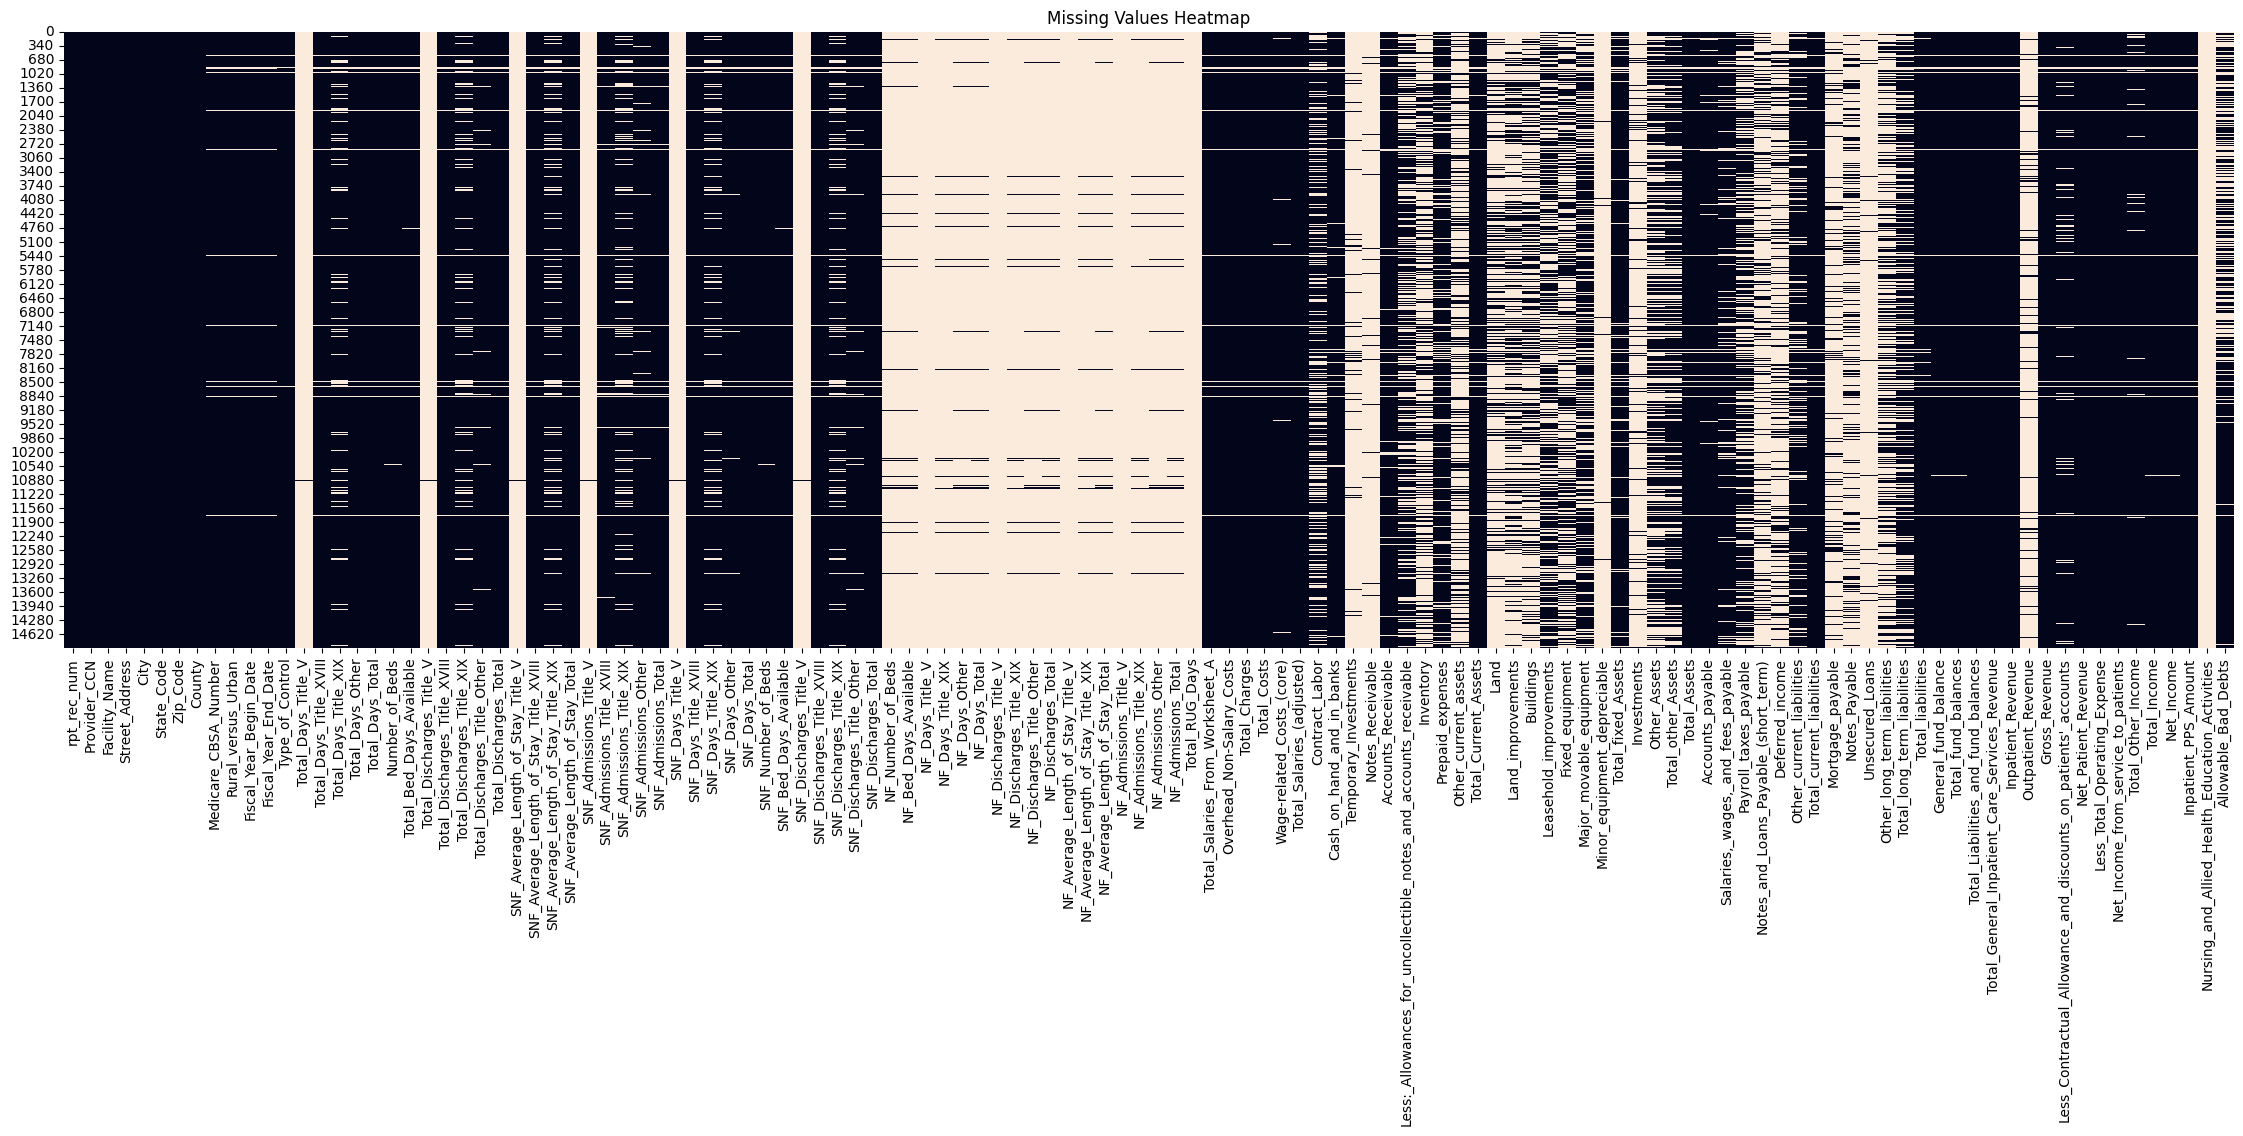

In [340]:
plt.figure(figsize=(28, 8))
sns.heatmap(df20.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

I am dropping these columns because they are not in df15-19 and they have less than 10 values in df20-21.

In [341]:
# List of columns to extract
columns_to_drop = [
    "Total_Days_Title_V", "Total_Discharges_Title_V", "NF_Number_of_Beds",
    "NF_Bed_Days_Available", "NF_Days_Title_V", "NF_Days_Title_XIX", "NF_Days_Other", "NF_Days_Total",
    "NF_Discharges_Title_V", "NF_Discharges_Title_XIX", "NF_Discharges_Title_Other", "NF_Discharges_Total",
    "NF_Average_Length_of_Stay_Title_V", "NF_Average_Length_of_Stay_Title_XIX", "NF_Average_Length_of_Stay_Total",
    "NF_Admissions_Title_V", "NF_Admissions_Title_XIX", "NF_Admissions_Other", "NF_Admissions_Total",
    "Temporary_Investments", "Notes_Receivable", "Minor_equipment_depreciable", "Deferred_income", "Unsecured_Loans", 
    "Outpatient_Revenue", "Nursing_and_Allied_Health_Education_Activities", "SNF_Average_Length_of_Stay_Title_V", "SNF_Admissions_Title_V", "SNF_Days_Title_V", "SNF_Discharges_Title_V"

]

# Drop the specified columns
df21_cleaned = df21.drop(columns=columns_to_drop)

# Display the cleaned dataframe
df21_cleaned.sort_values(by="Provider_CCN")

rpt_rec_num  Provider_CCN                         Facility_Name  \
10978      1339846         15009                    BURNS NURSING HOME   
10094      1337420         15010   COOSA VALLEY HEALTHCARE CENTER  LLC   
10784      1339514         15014       EASTVIEW REHAB & HEALTHCARE CTR   
10764      1339456         15015         PLANTATION MANOR NURSING HOME   
9912       1336942         15016      ATHENS HEALTH AND REHABILITATION   
...            ...           ...                                   ...   
4099       1328349        676499  SPRINGTOWN PARK NURSING AND CARE CEN   
9635       1336311        686123  KENDALL LAKES HEALTH AND REHABILITAT   
2719       1324686        686124                 HARMONY HEALTH CENTER   
4146       1328427        745000                LAS ALTURAS DE PENITAS   
4309       1328686        745001               ESTATES AT SHAVANO PARK   

                    Street_Address          City State_Code Zip_Code  \
10978         701 MONROE STREET NW  RUSSELLVILLE         AL    35653   
10094         260 W. WALNUT STREET     SYLACAUGA         AL    35150   
10784        7755 4TH AVENUE SOUTH    BIRMINGHAM         AL    35206   
10764  6450 OLD TUSCALOOSA HIGHWAY       MCCALLA         AL    35111   
9912        611 WEST MARKET STREET        ATHENS         AL    35611   
...                            ...           ...        ...      ...   
4099           200 WILLIAM WARD RD    SPRINGTOWN         TX    76082   
9635          5280 SW 157TH AVENUE         MIAMI         FL    33185   
2719      9820 NORTH KENDALL DRIVE         MIAMI         FL    33176   
4146              414 LIBERTY BLVD       PENITAS         TX    78576   
4309        4366 LOCKHILL SELMA RD   SAN ANTONIO         TX    78249   

           County  Medicare_CBSA_Number Rural_versus_Urban  \
10978      MARION               99901.0                  R   
10094   TALLADEGA               99901.0                  R   
10784   JEFFERSON               13820.0                  U   
10764   JEFFERSON               13820.0                  U   
9912    LIMESTONE               26620.0                  U   
...           ...                   ...                ...   
4099       PARKER               23104.0                  U   
9635   MIAMI-DADE               33124.0                  U   
2719   MIAMI-DADE               33124.0                  U   
4146      HIDALGO               32580.0                  U   
4309        BEXAR               41700.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
10978             07/01/2021           06/30/2022              4.0   
10094             07/01/2021           06/30/2022              6.0   
10784             07/01/2021           06/30/2022              6.0   
10764             07/01/2021           06/30/2022              4.0   
9912              07/01/2021           06/30/2022              4.0   
...                      ...                  ...              ...   
4099              04/01/2021           12/31/2021              5.0   
9635              06/01/2021           05/31/2022              4.0   
2719              01/01/2021           12/31/2021              5.0   
4146              07/08/2021           12/31/2021              4.0   
4309              07/16/2021           12/31/2021              5.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
10978                  1659.0               15606.0            1525.0   
10094                  1392.0               21852.0            5299.0   
10784                  2525.0               20777.0            2575.0   
10764                   766.0               12067.0           14671.0   
9912                   7988.0               25013.0           11347.0   
...                       ...                   ...               ...   
4099                   3776.0               12543.0            8213.0   
9635                  19184.0               28555.0            5422.0   
2719      

In [342]:
import pandas as pd

# List of columns to extract
columns_to_drop = [
     "Total_Days_Title_V", "Total_Discharges_Title_V", "NF_Number_of_Beds",
    "NF_Bed_Days_Available", "NF_Days_Title_V", "NF_Days_Title_XIX", "NF_Days_Other", "NF_Days_Total",
    "NF_Discharges_Title_V", "NF_Discharges_Title_XIX", "NF_Discharges_Title_Other", "NF_Discharges_Total",
    "NF_Average_Length_of_Stay_Title_V", "NF_Average_Length_of_Stay_Title_XIX", "NF_Average_Length_of_Stay_Total",
    "NF_Admissions_Title_V", "NF_Admissions_Title_XIX", "NF_Admissions_Other", "NF_Admissions_Total",
    "Temporary_Investments", "Notes_Receivable", "Minor_equipment_depreciable", "Deferred_income", "Unsecured_Loans", 
    "Outpatient_Revenue", "Nursing_and_Allied_Health_Education_Activities","SNF_Average_Length_of_Stay_Title_V", "SNF_Admissions_Title_V", "SNF_Days_Title_V", "SNF_Discharges_Title_V"

]

# Drop the specified columns
df20_cleaned = df20.drop(columns=columns_to_drop)

# Display the cleaned dataframe
df20_cleaned.sort_values(by="Provider_CCN")

rpt_rec_num  Provider_CCN                         Facility_Name  \
7834       1309179         15009                    BURNS NURSING HOME   
7374       1308350         15010   COOSA VALLEY HEALTHCARE CENTER  LLC   
7341       1308248         15014       EASTVIEW REHAB & HEALTHCARE CTR   
7436       1308500         15015         PLANTATION MANOR NURSING HOME   
8017       1309464         15016      ATHENS HEALTH AND REHABILITATION   
...            ...           ...                                   ...   
4199       1301962        676488    CEDAR HOLLOW REHABILITATION CENTER   
974        1284090        676489               THE LEGACY MIDTOWN PARK   
2324       1292762        676491  MISSION RIDGE REHAB. & NURSING CENTE   
4988       1303136        686123  KENDALL LAKES HEALTH AND REHABILITAT   
14066      1342344        686124                 HARMONY HEALTH CENTER   

                    Street_Address         City State_Code Zip_Code  \
7834             701 MONROE STREET  RUSSELVILLE         AL    35653   
7374          260 W. WALNUT STREET    SYLACAUGA         AL    35150   
7341         7755 4TH AVENUE SOUTH   BIRMINGHAM         AL    35206   
7436   6450 OLD TUSCALOOSA HIGHWAY      MCCALLA         AL    35111   
8017        611 WEST MARKET STREET       ATHENS         AL    35611   
...                            ...          ...        ...      ...   
4199          5011 NORTH US HWY 75      SHERMAN         TX    75090   
974          8280 MANDERVILLE LANE       DALLAS         TX    75231   
2324                     401 SWIFT      REFUGIO         TX    78377   
4988          5280 SW 157TH AVENUE        MIAMI         FL    33185   
14066     9820 NORTH KENDALL DRIVE        MIAMI         FL    33176   

           County  Medicare_CBSA_Number Rural_versus_Urban  \
7834     FRANKLIN               99901.0                  R   
7374    TALLADEGA               99901.0                  R   
7341    JEFFERSON               13820.0                  U   
7436    JEFFERSON               13820.0                  U   
8017    LIMESTONE               26620.0                  U   
...           ...                   ...                ...   
4199      GRAYSON               43300.0                  U   
974        DALLAS                   NaN                NaN   
2324      REFUGIO               99945.0                  R   
4988   MIAMI-DADE               33124.0                  U   
14066  MIAMI-DADE               33124.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
7834              07/01/2020           06/30/2021              4.0   
7374              07/01/2020           06/30/2021              6.0   
7341              07/01/2020           06/30/2021              6.0   
7436              07/01/2020           06/30/2021              4.0   
8017              07/01/2020           06/30/2021              4.0   
...                      ...                  ...              ...   
4199              06/12/2020           12/31/2020              5.0   
974                      NaN                  NaN              NaN   
2324              07/13/2020           12/31/2020              4.0   
4988              06/01/2020           05/31/2021              4.0   
14066             01/01/2020           12/31/2020              5.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
7834                   1651.0               13119.0            4231.0   
7374                   1351.0               20655.0            3796.0   
7341                   1623.0               21724.0            2015.0   
7436                   1086.0               15165.0           12951.0   
8017                   7592.0               24414.0           10066.0   
...                       ...                   ...               ...   
4199                   4044.0                 879.0             597.0   
974                       NaN                   NaN               NaN   
2324                  

In [343]:
# Find columns in df1 but not in df2
cols_in_df1_not_df2 = list(set(df20_cleaned.columns) - set(df19.columns))

# Find columns in df2 but not in df1
cols_in_df2_not_df1 = list(set(df19.columns) - set(df20_cleaned.columns))

# Print results
print("Columns in df1 but not in df2:", cols_in_df1_not_df2)
print("Columns in df2 but not in df1:", cols_in_df2_not_df1)


Columns in df1 but not in df2: ['Total_Other_Income', 'Total_General_Inpatient_Care_Services_Revenue', 'SNF_Average_Length_of_Stay_Total', 'SNF_Average_Length_of_Stay_Title_XIX', 'Mortgage_payable', 'Allowable_Bad_Debts', 'Notes_Payable', 'Total_Current_Assets', 'Inventory', 'Wage-related_Costs_(core)', 'SNF_Number_of_Beds', 'Land', 'Leasehold_improvements', 'Overhead_Non-Salary_Costs', 'Notes_and_Loans_Payable_(short_term)', 'Land_improvements', 'Contract_Labor', 'Total_Liabilities_and_fund_balances', 'Total_Salaries_(adjusted)', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Other_current_assets', 'SNF_Average_Length_of_Stay_Title_XVIII', 'Less:_Allowances_for_uncollectible_notes_and_accounts_receivable', 'Prepaid_expenses', 'Net_Income_from_service_to_patients', 'Payroll_taxes_payable', 'SNF_Bed_Days_Available', 'Other_long_term_liabilities', 'Total_Charges', 'Total_long_term_liabilities', 'Salaries,_wages,_and_fees_payable', 'Investments']
Columns in df2 but not

Columns in df1 but not in df2: ['Total_Charges', 'Total_long_term_liabilities', 'Other_long_term_liabilities', 'SNF_Average_Length_of_Stay_Total', 'Notes_and_Loans_Payable_(short_term)', 'Total_Current_Assets', 'Land', 'Total_Salaries_(adjusted)', 'Leasehold_improvements', 'Overhead_Non-Salary_Costs', 'Contract_Labor', 'Total_Other_Income', 'Allowable_Bad_Debts', 'Salaries,_wages,_and_fees_payable', 'SNF_Average_Length_of_Stay_Title_XIX', 'Investments', 'SNF_Bed_Days_Available', 'Net_Income_from_service_to_patients', 'Total_Liabilities_and_fund_balances', 'Total_General_Inpatient_Care_Services_Revenue', 'Mortgage_payable', 'Notes_Payable', 'Less:_Allowances_for_uncollectible_notes_and_accounts_receivable', 'Inventory', 'Land_improvements', 'SNF_Average_Length_of_Stay_Title_XVIII', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Other_current_assets', 'Payroll_taxes_payable', 'SNF_Number_of_Beds', 'Wage-related_Costs_(core)', 'Prepaid_expenses']


Columns in df2 but not in df1: ['Net_Income_from_patients', 'Wage_related_Costs_core', 'SNF_Number_of_beds', 'Total_current_assets', 'Total_Liab_and_fund_balances', 'Salaries_wages_and_fees_payable', 'Total_General_Inpatient_Revenue', 'Less_discounts_on_patients', 'Total_Salaries_adjusted', 'SNF_Average_Length_of_stay_Tot', 'Overhead_Non_Salary_Costs', 'SNF_Average_Length_stay_XVIII', 'rpt_rec_num', 'SNF_Average_Length_stay_XIX', 'SNF_bed_Days_Available']

## Missing variable analysis
We have identified 27 columns that are in df20 and df21 but not in df15-19. 

We need to determine what to do for each one. 

The options are: 

See if calculatable from another column and do it in 2015-2019.

See if correlated and maybe drop if not at all. 

See if there is a statistical significance from the target varaible(s).

Possibly make another dataset with the (on the edge) columns.

Determine if the varaible is "universal" and can appy to every year.

### TOTAL_CHARGES
We are analysing what to do with total_charges

In [344]:
import pandas as pd

# List of columns to keep
columns_to_keep = [
    "Total_Charges", "Total_Costs","Inpatient_Revenue", "Gross_Revenue", 
    "Total_General_Inpatient_Care_Services_Revenue", "Net_Patient_Revenue", 
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",  
    "Less_Total_Operating_Expense", "Net_Income_from_service_to_patients",  
    "Total_Other_Income", "Total_Income", "Net_Income"
]

# Select only these columns
df_selected = df20_cleaned[columns_to_keep]

# Display the first few rows
df_selected.head()


Total_Charges  Total_Costs  Inpatient_Revenue  Gross_Revenue  \
0       299558.0     195203.0          1795483.0      1795483.0   
1       254234.0     210445.0          1286852.0      1286852.0   
2       791188.0     492172.0          1906805.0      1907688.0   
3        34477.0      42549.0          1060866.0      1060866.0   
4       137122.0     222656.0          2038599.0      2038599.0   

   Total_General_Inpatient_Care_Services_Revenue  Net_Patient_Revenue  \
0                                      1490851.0            1083396.0   
1                                      1032618.0             814204.0   
2                                      1116500.0            1543399.0   
3                                      1026389.0             877453.0   
4                                      1901478.0            2038599.0   

   Less_Contractual_Allowance_and_discounts_on_patients'_accounts  \
0                                           712087.0                
1                                           472648.0                
2                                           364289.0                
3                                           183413.0                
4                                                NaN                

   Less_Total_Operating_Expense  Net_Income_from_service_to_patients  \
0                     1023062.0                              60334.0   
1                     1076191.0                            -261987.0   
2                     1735321.0                            -191922.0   
3                      914701.0                             -37248.0   
4                     1880948.0                             157651.0   

   Total_Other_Income  Total_Income  Net_Income  
0                50.0       60384.0     60384.0  
1               806.0     -261181.0   -261181.0  
2               120.0     -191802.0   -191802.0  
3               349.0      -36899.0    -36899.0  
4                20.0      157671.0    157671.0

### Total Charges is not in 15-19
These other variables other than Total_Charges are present in all datasets.
I tried all the combos I could to get to Total charges by calculating it from other varaibles. There is no way. 

In [345]:

# Remove rows with any NaN values
df_selected_cleaned = df_selected.dropna()

# Assuming df_selected is your dataset
# Define features and target variable
features = ['Inpatient_Revenue', 'Gross_Revenue', 'Total_General_Inpatient_Care_Services_Revenue', 'Net_Patient_Revenue']
target = 'Total_Charges'

# Prepare the data for training
X = df_selected_cleaned[features]
y = df_selected_cleaned[target]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# --- Model 2: Random Forest Regressor ---
# Initialize the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Calculate performance metrics for Random Forest
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Results
print(f"Linear Regression Model:")
print(f"Mean Squared Error: {mse_lin_reg}")
print(f"R-squared: {r2_lin_reg}\n")

print(f"Random Forest Regressor Model:")
print(f"Mean Squared Error: {mse_rf_reg}")
print(f"R-squared: {r2_rf_reg}")


Linear Regression Model:
Mean Squared Error: 2221854718799.4473
R-squared: 0.31279200793742357

Random Forest Regressor Model:
Mean Squared Error: 579483406567.4524
R-squared: 0.8207688266512866


In [346]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned[['Total_Charges']]  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Total_Charges: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Total_Charges is not significant in predicting Net_Income.")


Coefficient (Slope) for Total_Charges: 0.035781499506833014
T-statistic: 391.34042012488203
P-value: 0.0
Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.


In conclusion, total_charges cannot be directly calculated. It has about a 1% correlation with Net_Income. and it is not in datasets 2015-2019. It can be calculated using a randomforest formula based on the other columns but it has 80% accuracy. the previous years could also be calculated using the difference from 20 and 21 and linearly estimate what the previous years were, but it will not be accurate at all. Hypothesis testing for significance resulted in it being significant, but not by a lot. 

We will try adding it to the master data so it atleast is present. During cleaning and simplification, we will probably drop it especially because it has high multicollinearity with some other variables.

I will have to make the variable Total_Charges in df15 - df19.


In [347]:
# adding an empty Total_Charges to df15 df16 df17 df18 df19
df15['Total_Charges'] = np.nan
df16['Total_Charges'] = np.nan
df17['Total_Charges'] = np.nan
df18['Total_Charges'] = np.nan
df19['Total_Charges'] = np.nan


In [348]:
df19.sample(4)

rpt_rec_num  Provider_CCN                  Facility_Name  \
14775      1314432        375325                  BURFORD MANOR   
569        1252376        676081      WALLSVILLE HEALTHCARE INC   
10453      1283005        505418          PROVIDENCE MARIANWOOD   
7499       1277390        555069  WESTERN CONVALESCENT HOSPITAL   

                 Street_Address         City State_Code Zip_Code       County  \
14775      505 SOUTH 7TH STREET        DAVIS         OK    73030       MURRAY   
569       15880 WALLISVILLE RD.      HOUSTON         TX    77049       HARRIS   
10453  3725 PROVIDENCE PT DR SE     ISSAQUAH         WA    98029         KING   
7499       2190 WEST ADAMS BLVD  LOS ANGELES         CA    90018  LOS ANGELES   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
14775               99937.0                  R               7/1/2019   
569                 26420.0                  U              10/1/2018   
10453               42644.0                  U               1/1/2019   
7499                31084.0                  U               1/1/2019   

      Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
14775            6/30/2020                4             389427.0   
569              9/30/2019                4            2278264.0   
10453           12/31/2019                4           12341509.0   
7499            12/31/2019                4            1992909.0   

       Accounts_payable  Buildings  Cash_on_hand_and_in_banks  \
14775          144825.0     2660.0                  1221742.0   
569            146842.0        NaN                    20169.0   
10453           61217.0  3302110.0                   186547.0   
7499           239119.0        NaN                  1953877.0   

       General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
14775             1038217.0      4690275.0             1445848.0   
569                538048.0     10719813.0             1808525.0   
10453             5724091.0     16875883.0             2431666.0   
7499             12057697.0     21105597.0             2365064.0   

       Inpatient_Revenue  Less_Total_Operating_Expense  \
14775          4690275.0                     4178048.0   
569           10719813.0                     9493915.0   
10453         16875883.0                    17165571.0   
7499          21105597.0                    13463113.0   

       Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
14775                    635313.0                  17873.0    369349.0   
569                      404606.0                      NaN    824999.0   
10453                   4346196.0                 936860.0  -4098789.0   
7499                    7512160.0                      NaN    138170.0   

       Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
14775                 -123086.0            4054962.0            73.0   
569                    821292.0           10315207.0           125.0   
10453                -4635884.0           12529687.0           117.0   
7499                   130324.0           13593437.0           129.0   

       Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
14775         820.0                    48080.0                  1980257.0   
569       4907138.0                   718314.0                  4730594.0   
10453           NaN                   135461.0                  9938227.0   
7499            NaN                   410315.0                  7275272.0   

       SNF_Admissions_Other  SNF_Admissions_Title_XIX  \
14775                  15.0                      11.0   
569                   474.0                      58.0   
10453                 456.0                      36.0   
7499                   35.0                     204.0   

       SNF_Admissions_Title_XVIII  SNF_Admissions_Total  \
14775                        40.0                  66.0   
569                         128.0                 660.0   
10453              

### Contract Labor 
It is in df20 and df21 but not the others.

In [349]:
df20_cleaned

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1254744         75031                      GLEN HILL CENTER   
1          1255877        495268         MARY WASHINGTON HEALTH CENTER   
2          1256270        295107      ADVANCED HEALTH CARE OF PARADISE   
3          1259169        146097            EL PASO HEALTH CARE CENTER   
4          1259189        215136  BIRCH MANOR CTR FOR REHAB & HEALTHCA   
...            ...           ...                                   ...   
14944      1363186        105382  SANDGATE GARDENS REHAB AND NURSING C   
14945      1363595        145970             THE VILLA AT WINDSOR PARK   
14946      1364413        375567               MEMORIAL NURSING CENTER   
14947      1364622        415071   SOUTH COUNTY NURSING & REHAB CENTER   
14948      1365542         56261   MERRITT MANOR CONVALESCENT HOSPITAL   

                       Street_Address             City State_Code Zip_Code  \
0                    1 GLEN HILL ROAD          DANBURY         CT    06811   
1                  2400 MCKINNEY BLVD   COLONIAL BEACH         VA    22443   
2      3455 PECOS-MCLEOD INTERCONNECT        LAS VEGAS         NV    89121   
3              850 EAST SECOND STREET          EL PASO         IL    61738   
4                     7309 SECOND AVE       SYKESVILLE         MD    21784   
...                               ...              ...        ...      ...   
14944           703 SOUTH 29TH STREET      FORT PIERCE         FL    34947   
14945           2649 EAST 75TH STREET          CHICAGO         IL    60649   
14946              319 EAST JOSEPHINE        FREDERICK         OK    73542   
14947               740 OAK HILL ROAD  NORTH KINGSTOWN         RI    02852   
14948         604 EAST MERRITT AVENUE           TULARE         CA    93274   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0         FAIRFIELD               14860.0                  U   
1      WESTMORELAND               99949.0                  R   
2             CLARK               29820.0                  U   
3          WOODFORD               37900.0                  U   
4           CARROLL               12580.0                  U   
...             ...                   ...                ...   
14944     ST. LUCIE               38940.0                  U   
14945          COOK               16974.0                  U   
14946       TILLMAN               99937.0                  R   
14947    WASHINGTON               39300.0                  U   
14948        TULARE               47300.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                 10/01/2019           10/31/2019              6.0   
1                 11/01/2019           12/29/2019              4.0   
2                 10/04/2019           12/31/2019              4.0   
3                 10/31/2019           12/31/2019              4.0   
4                 11/01/2019           12/31/2019              4.0   
...                      ...                  ...              ...   
14944             01/01/2020           12/31/2020              4.0   
14945             01/01/2020           12/31/2020              6.0   
14946             07/01/2020           06/30/2021              8.0   
14947             07/01/2020           12/31/2020              6.0   
14948             01/01/2020           12/31/2020              6.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
0                       735.0                1648.0             538.0   
1                       341.0                 260.0            2803.0   
2                      1381.0                   NaN             846.0   
3                       131.0                3853.0            1441.0   
4                       539.0                4957.0             378.0   
...                       ...                   ...               ...   
14944                  8319.0               18121.0         

In [350]:
# Define the most relevant 20 variables related to Contract_Labor
labor_related_columns = [
    "Contract_Labor",
    "Total_Salaries_From_Worksheet_A",
    "Total_Salaries_(adjusted)",
    "Wage-related_Costs_(core)",
    "Overhead_Non-Salary_Costs",
    "Total_Costs",
    "Total_Charges",
    "Net_Income",
    "Total_Income",
    "Net_Patient_Revenue",
    "Total_Days_Total",
    "Total_Discharges_Total",
    "SNF_Days_Total",
    "SNF_Admissions_Total",
    "SNF_Discharges_Total",
    "SNF_Number_of_Beds",
    "Total_Bed_Days_Available",
    "Total_fixed_Assets",
    "Total_Assets",
    "Payroll_taxes_payable"
]

# Create a new DataFrame with the selected columns
df_labor_vars = df20_cleaned[labor_related_columns]

# Display the first few rows to verify
df_labor_vars.head()


Contract_Labor  Total_Salaries_From_Worksheet_A  Total_Salaries_(adjusted)  \
0        136024.0                         371857.0                   371857.0   
1        156009.0                         369008.0                   369008.0   
2         17352.0                         713984.0                   713984.0   
3             NaN                         324450.0                   324450.0   
4             NaN                         844993.0                   844993.0   

   Wage-related_Costs_(core)  Overhead_Non-Salary_Costs  Total_Costs  \
0                    79053.0                   651205.0     195203.0   
1                    60217.0                   707183.0     210445.0   
2                    83667.0                  1021337.0     492172.0   
3                    33821.0                   590251.0      42549.0   
4                   103797.0                  1035955.0     222656.0   

   Total_Charges  Net_Income  Total_Income  Net_Patient_Revenue  \
0       299558.0     60384.0       60384.0            1083396.0   
1       254234.0   -261181.0     -261181.0             814204.0   
2       791188.0   -191802.0     -191802.0            1543399.0   
3        34477.0    -36899.0      -36899.0             877453.0   
4       137122.0    157671.0      157671.0            2038599.0   

   Total_Days_Total  Total_Discharges_Total  SNF_Days_Total  \
0            2921.0                    57.0          2921.0   
1            3404.0                    26.0          3404.0   
2            2227.0                    51.0          2227.0   
3            5425.0                    18.0          5425.0   
4            5874.0                    30.0          5874.0   

   SNF_Admissions_Total  SNF_Discharges_Total  SNF_Number_of_Beds  \
0                  58.0                  57.0               100.0   
1                  29.0                  26.0                66.0   
2                 138.0                  51.0                38.0   
3                  10.0                  18.0               123.0   
4                  26.0                  30.0               118.0   

   Total_Bed_Days_Available  Total_fixed_Assets  Total_Assets  \
0                    3100.0             35976.0    14400312.0   
1                    3894.0                 NaN     -278550.0   
2                    3382.0             99168.0     2817453.0   
3                    7749.0            484549.0     3176256.0   
4                    7198.0            334401.0    16961403.0   

   Payroll_taxes_payable  
0                    NaN  
1              -337340.0  
2                    NaN  
3                26575.0  
4                 -177.0

I cannot find a way to calculate it or a trend. 

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows with any NaN values
df_selected_cleaned = df_labor_vars.dropna()

# Assuming df_selected is your dataset
# Define features and target variable
target = 'Contract_Labor'
labor_columns = [
    "Total_Salaries_From_Worksheet_A",
    "Total_Salaries_(adjusted)",
    "Wage-related_Costs_(core)",
    "Overhead_Non-Salary_Costs",
    "Total_Costs",
    "Net_Income",
    "Total_Charges",
    "Net_Patient_Revenue",
    "Total_Days_Total",
    "Total_Discharges_Total",
    "SNF_Days_Total",
    "SNF_Admissions_Total",
    "SNF_Discharges_Total",
    "SNF_Number_of_Beds",
    "Total_Bed_Days_Available",
    "Total_fixed_Assets",
    "Total_Assets",
    "Payroll_taxes_payable"
]

# Prepare the data for training
X = df_selected_cleaned[labor_columns]
y = df_selected_cleaned[target]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# --- Model 2: Random Forest Regressor ---
# Initialize the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Calculate performance metrics for Random Forest
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Results
print(f"Linear Regression Model:")
print(f"Mean Squared Error: {mse_lin_reg}")
print(f"R-squared: {r2_lin_reg}\n")

print(f"Random Forest Regressor Model:")
print(f"Mean Squared Error: {mse_rf_reg}")
print(f"R-squared: {r2_rf_reg}")


Linear Regression Model:
Mean Squared Error: 324482208067.026
R-squared: 0.5757153184767569

Random Forest Regressor Model:
Mean Squared Error: 226795028648.15125
R-squared: 0.7034485894488274


In [352]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Contract_Labor']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Total_Charges: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Total_Charges is not significant in predicting Net_Income.")


Coefficient (Slope) for Total_Charges: 0.19870491294125217
T-statistic: 531.0734456139027
P-value: 0.0
Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.


In [353]:
df_labor_vars

Contract_Labor  Total_Salaries_From_Worksheet_A  \
0            136024.0                         371857.0   
1            156009.0                         369008.0   
2             17352.0                         713984.0   
3                 NaN                         324450.0   
4                 NaN                         844993.0   
...               ...                              ...   
14944         28405.0                        4620444.0   
14945        956956.0                        6897345.0   
14946             NaN                        1217063.0   
14947        255632.0                        1408295.0   
14948        498812.0                        4991128.0   

       Total_Salaries_(adjusted)  Wage-related_Costs_(core)  \
0                       371857.0                    79053.0   
1                       369008.0                    60217.0   
2                       713984.0                    83667.0   
3                       324450.0                    33821.0   
4                       844993.0                   103797.0   
...                          ...                        ...   
14944                  4620444.0                   680814.0   
14945                  6897345.0                  1110438.0   
14946                  1217063.0                   372070.0   
14947                  1408295.0                   218453.0   
14948                  4991128.0                   552231.0   

       Overhead_Non-Salary_Costs  Total_Costs  Total_Charges  Net_Income  \
0                       651205.0     195203.0       299558.0     60384.0   
1                       707183.0     210445.0       254234.0   -261181.0   
2                      1021337.0     492172.0       791188.0   -191802.0   
3                       590251.0      42549.0        34477.0    -36899.0   
4                      1035955.0     222656.0       137122.0    157671.0   
...                          ...          ...            ...         ...   
14944                  7267864.0    1585761.0      1454089.0    545241.0   
14945                 10205508.0    1322483.0      3325030.0   -433682.0   
14946                   935345.0      16221.0        19670.0   -511877.0   
14947                  2134249.0     363700.0       453329.0   -541814.0   
14948                  5035803.0     990470.0      1049604.0    -89357.0   

       Total_Income  Net_Patient_Revenue  Total_Days_Total  \
0           60384.0            1083396.0            2921.0   
1         -261181.0             814204.0            3404.0   
2         -191802.0            1543399.0            2227.0   
3          -36899.0             877453.0            5425.0   
4          157671.0            2038599.0            5874.0   
...             ...                  ...               ...   
14944      545241.0           11533335.0           32898.0   
14945     -433682.0           16610849.0           67098.0   
14946     -511877.0            1640531.0            6103.0   
14947     -541814.0            2999135.0           10223.0   
14948      -58933.0            9213000.0           29900.0   

       Total_Discharges_Total  SNF_Days_Total  SNF_Admissions_Total  \
0                        57.0          2921.0                  58.0   
1                        26.0          3404.0                  29.0   
2                        51.0          2227.0                 138.0   
3                        18.0          5425.0                  10.0   
4                        30.0          5874.0                  26.0   
...                       ...             ...                   ...   
14944                   397.0         32898.0                 295.0   
14945                   369.0         67098.0                 360.0   
14946                    39.0          6103.0                  37.0   
14947                    80.0         10223.0                  89.0   
14948                   240.0         29900.0                 107.0   

       SNF_Discharges_Total  SNF_Number_of

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\2026169166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Contract_Labor"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

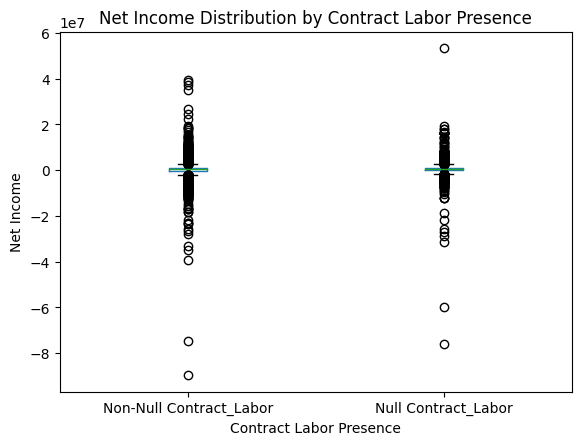

       Non-Null Contract_Labor  Null Contract_Labor
count             1.011500e+04         4.590000e+03
mean              2.412548e+05         3.723099e+05
std               2.512138e+06         2.583888e+06
min              -8.971656e+07        -7.619267e+07
25%              -3.191710e+05        -1.677922e+05
50%               2.488180e+05         3.415350e+05
75%               8.800960e+05         9.505118e+05
max               3.918180e+07         5.337325e+07
T-Test p-value: 0.0036757032018827976
Mann-Whitney U Test p-value: nan


In [354]:
import matplotlib.pyplot as plt

# Create a new column for grouping
df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Contract_Labor"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_labor_vars.boxplot(column="Net_Income", by="Contract_Labor_Group", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Contract Labor Presence")
plt.suptitle("")
plt.xlabel("Contract Labor Presence")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Contract_Labor", "Null Contract_Labor"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df_labor_vars[df_labor_vars["Contract_Labor"].notnull()]
df_null = df_labor_vars[df_labor_vars["Contract_Labor"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Contract_Labor": df_non_null["Net_Income"].describe(),
    "Null Contract_Labor": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

Contract_Labor is significant so we should keep it.

There is an important difference between the null and the non null Contract_Labor in terms of Net_Income. 
I think it will be okay to make the contract labor NULL = 0 because that means they didn't contract labor quite simply. 

So I will put contract labor files into the df15-df19. 

In [355]:
# adding an empty Total_Charges to df15 df16 df17 df18 df19
df15['Contract_Labor'] = np.nan
df16['Contract_Labor'] = np.nan
df17['Contract_Labor'] = np.nan
df18['Contract_Labor'] = np.nan
df19['Contract_Labor'] = np.nan

### Number_of_beds
in df19 it is called SNF_Number_of_beds

In [356]:
df20_cleaned.sample(4)

rpt_rec_num  Provider_CCN                         Facility_Name  \
1015       1284434        675903              MEXIA LTC PARTNERS  INC.   
48         1265630        115723               MLH SALUDE GWINNETT LLC   
77         1268017        455534  HONDO NURSING & REHABILITATION  L.P.   
11606      1331574        345510                     TARBORO CARE  LLC   

              Street_Address     City State_Code Zip_Code     County  \
1015        601 TERRACE LANE    MEXIA         TX    76667  LIMESTONE   
48      601 NORTHOLT PARKWAY  SUWANEE         GA    30024    GWINETT   
77             3002 AVENUE Q    HONDO         TX    78861     MEDINA   
11606  911 WESTERN BOULEVARD  TARBORO         NC    27886  EDGECOMBE   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
1015                99945.0                  R             10/01/2019   
48                  12060.0                  U             10/01/2019   
77                  41700.0                  U             01/01/2020   
11606               40580.0                  U             10/01/2019   

      Fiscal_Year_End_Date  Type_of_Control  Total_Days_Title_XVIII  \
1015            09/30/2020              9.0                  3973.0   
48              12/31/2019              4.0                  4679.0   
77              06/15/2020              4.0                    28.0   
11606           09/30/2020              4.0                  3417.0   

       Total_Days_Title_XIX  Total_Days_Other  Total_Days_Total  \
1015                12532.0            4545.0           21050.0   
48                      NaN            1001.0            5680.0   
77                   5115.0             352.0            5495.0   
11606               30379.0            1982.0           35778.0   

       Number_of_Beds  Total_Bed_Days_Available  Total_Discharges_Title_XVIII  \
1015             66.0                   24156.0                          28.0   
48               64.0                    5888.0                         185.0   
77               90.0                   15030.0                           2.0   
11606           118.0                   43188.0                          67.0   

       Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
1015                         29.0                          18.0   
48                            NaN                          63.0   
77                           35.0                           2.0   
11606                        65.0                          29.0   

       Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_XVIII  \
1015                     75.0                                  141.89   
48                      248.0                                   25.29   
77                       39.0                                   14.00   
11606                   161.0                                   51.00   

       SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
1015                                 432.14                            280.67   
48                                      NaN                             22.90   
77                                   146.14                            140.90   
11606                                467.37                            222.22   

       SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  \
1015                         24.0                      20.0   
48                          197.0                       NaN   
77                            2.0                       2.0   
11606                        82.0                      40.0   

       SNF_Admissions_Other  SNF_Admissions_Total  SNF_Days_Title_XVIII  \
1015                   17.0                  61.0                3973.0   
48                     51.0                 248.0                4679.0   
77                      4.0                   8.0                  28.0   
11606                  24.0                 146.0                3417.0   

       SNF_

In [357]:
df20_cleaned[df20_cleaned["Provider_CCN"] == 285085]

rpt_rec_num  Provider_CCN          Facility_Name  \
8831      1311676        285085  IMMANUEL - FONTENELLE   

              Street_Address   City State_Code    Zip_Code   County  \
8831  6901 NORTH 72ND STREET  OMAHA         NE  68122-1799  DOUGLAS   

      Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
8831               36540.0                  U             07/01/2020   

     Fiscal_Year_End_Date  Type_of_Control  Total_Days_Title_XVIII  \
8831           06/30/2021              2.0                  2926.0   

      Total_Days_Title_XIX  Total_Days_Other  Total_Days_Total  \
8831               18853.0            9342.0           31121.0   

      Number_of_Beds  Total_Bed_Days_Available  Total_Discharges_Title_XVIII  \
8831           165.0                   60225.0                          63.0   

      Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
8831                        42.0                          80.0   

      Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_XVIII  \
8831                   185.0                                   46.44   

      SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
8831                                448.88                            168.22   

      SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  \
8831                        72.0                       7.0   

      SNF_Admissions_Other  SNF_Admissions_Total  SNF_Days_Title_XVIII  \
8831                  95.0                 174.0                2926.0   

      SNF_Days_Title_XIX  SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  \
8831             18853.0          9342.0         31121.0               165.0   

      SNF_Bed_Days_Available  SNF_Discharges_Title_XVIII  \
8831                 60225.0                        63.0   

      SNF_Discharges_Title_XIX  SNF_Discharges_Title_Other  \
8831                      42.0                        80.0   

      SNF_Discharges_Total  Total_RUG_Days  Total_Salaries_From_Worksheet_A  \
8831                 185.0             NaN                        6993481.0   

      Overhead_Non-Salary_Costs  Total_Charges  Total_Costs  \
8831                  7326626.0      2566479.0    1531982.0   

      Wage-related_Costs_(core)  Total_Salaries_(adjusted)  Contract_Labor  \
8831                  2027780.0                  6993481.0       1950799.0   

      Cash_on_hand_and_in_banks  Accounts_Receivable  \
8831                   693293.0             804426.0   

      Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
8831                                            78300.0                  

      Inventory  Prepaid_expenses  Other_current_assets  Total_Current_Assets  \
8831        NaN               NaN                   NaN             1419419.0   

      Land  Land_improvements  Buildings  Leasehold_improvements  \
8831   NaN           468658.0   886651.0                     NaN   

      Fixed_equipment  Major_movable_equipment  Total_fixed_Assets  \
8831         403785.0                1170883.0          13835958.0   

      Investments  Other_Assets  Total_other_Assets  Total_Assets  \
8831          NaN     1984250.0           1984250.0    17239627.0   

      Accounts_payable  Salaries,_wages,_and_fees_payable  \
8831         4120017.0                           640591.0   

      Payroll_taxes_payable  Notes_and_Loans_Payable_(short_term)  \
8831                    NaN                                   NaN   

      Other_current_liabilities  Total_current_liabilities  Mortgage_payable  \
8831                        NaN                  4760608.0               NaN   

      Notes_Payable  Other_long_term_liabilities  Total_long_term_liabilities  \
8831            NaN                   27267407.0                   27267407.0   

      Total_liabilities  General_fund_balance  Total_fund_balances  \
8831         32028015.0           -14788388.0          -14788388.0   

      Total_Liabilities_and_fund_b

In [358]:
df19[df19["Provider_CCN"] == 285085]

rpt_rec_num  Provider_CCN          Facility_Name  \
8896      1279698        285085  IMMANUEL - FONTENELLE   

              Street_Address   City State_Code    Zip_Code   County  \
8896  6901 NORTH 72ND STREET  OMAHA         NE  68122-1799  DOUGLAS   

      Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
8896               36540.0                  U               7/1/2019   

     Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
8896            6/30/2020                4             970406.0   

      Accounts_payable  Buildings  Cash_on_hand_and_in_banks  \
8896          766442.0   886651.0                   967558.0   

      General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
8896           -11873067.0     14046378.0             2050985.0   

      Inpatient_Revenue  Less_Total_Operating_Expense  \
8896         11451268.0                    13450768.0   

      Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
8896                   2406435.0                1110995.0  -1398259.0   

      Net_Income_from_patients  Net_Patient_Revenue  Number_of_Beds  \
8896                -1810825.0           11639943.0           165.0   

      Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
8896     1984250.0                   493619.0                  6621812.0   

      SNF_Admissions_Other  SNF_Admissions_Title_XIX  \
8896                  78.0                       4.0   

      SNF_Admissions_Title_XVIII  SNF_Admissions_Total  \
8896                       112.0                 194.0   

      SNF_Average_Length_of_stay_Tot  SNF_Average_Length_stay_XIX  \
8896                          189.17                       716.41   

      SNF_Average_Length_stay_XVIII  SNF_Days_Other  SNF_Days_Title_XIX  \
8896                          39.64         12995.0             22925.0   

      SNF_Days_Title_XVIII  SNF_Days_Total  SNF_Discharges_Title_Other  \
8896                3805.0         39725.0                        82.0   

      SNF_Discharges_Title_XIX  SNF_Discharges_Title_XVIII  \
8896                      32.0                        96.0   

      SNF_Discharges_Total  SNF_Number_of_beds  SNF_bed_Days_Available  \
8896                 210.0               165.0                 60225.0   

      Salaries_wages_and_fees_payable  Total_Assets  Total_Bed_Days_Available  \
8896                         598374.0     5418424.0                   60225.0   

      Total_Costs  Total_Days_Other  Total_Days_Title_XIX  \
8896    1505811.0           12995.0               22925.0   

      Total_Days_Title_XVIII  Total_Days_Total  Total_Discharges_Title_Other  \
8896                  3805.0           39725.0                          82.0   

      Total_Discharges_Title_XIX  Total_Discharges_Title_XVIII  \
8896                        32.0                          96.0   

      Total_Discharges_Total  Total_General_Inpatient_Revenue  Total_Income  \
8896                   210.0                       11451268.0    -1398259.0   

      Total_Liab_and_fund_balances  Total_RUG_Days  \
8896                     5418424.0          1127.0   

      Total_Salaries_From_Worksheet_A  Total_Salaries_adjusted  \
8896                        6828956.0                6828956.0   

      Total_current_assets  Total_current_liabilities  Total_fixed_Assets  \
8896             1588314.0                  1858435.0           1845860.0   

      Total_fund_balances  Total_liabilities  Total_other_Assets  \
8896          -11873067.0         17291491.0           1984250.0   

      Wage_related_Costs_core  Fixed_equipment  Total_Charges  Contract_Labor  
8896                1814900.0         403785.0            NaN             NaN

there are two columns in df20_cleaned for Number of beds. I need to see if they are the same or not.

In [359]:
import pandas as pd

# Compare Number_of_Beds with SNF_Number_of_Beds
df20_cleaned["Beds_Match"] = df20_cleaned["Number_of_Beds"] == df20_cleaned["SNF_Number_of_Beds"]

# Count matches and mismatches
match_count = df20_cleaned["Beds_Match"].sum()
mismatch_count = len(df20_cleaned) - match_count

# Print results
print(f"Matching rows: {match_count}")
print(f"Non-matching rows: {mismatch_count}")

# Get mismatched rows
mismatched_rows = df20_cleaned[~df20_cleaned["Beds_Match"]]

# Calculate the average difference for mismatched rows
average_difference = (mismatched_rows["Number_of_Beds"] - mismatched_rows["SNF_Number_of_Beds"]).abs().mean()

# Print results
print(f"Average difference in mismatched rows: {average_difference}")



Matching rows: 13040
Non-matching rows: 1909
Average difference in mismatched rows: 120.8294434470377


They are not the same 13040 are the same but 11671 arent. 

I want to compare both these columns now to the df19 one.

In [360]:
import pandas as pd

# Rename datasets for clarity
df20_cleaned1 = df20_cleaned.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])
df19_cleaned1 = df19.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])

# Merge on Provider_CCN to align data
merged_df = df20_cleaned1.merge(df19_cleaned1, on="Provider_CCN", suffixes=("_20", "_19"))

# Compare Number_of_Beds
merged_df["Number_of_Beds_Match"] = merged_df["Number_of_Beds_20"] == merged_df["Number_of_Beds_19"]

# Count matches and mismatches
number_beds_match_count = merged_df["Number_of_Beds_Match"].sum()
number_beds_mismatch_count = len(merged_df) - number_beds_match_count

# Print results
print(f"Matching 'Number_of_Beds': {number_beds_match_count}")
print(f"Non-matching 'Number_of_Beds': {number_beds_mismatch_count}")

# Optional: Display mismatched rows
mismatched_rows = merged_df[~merged_df["Number_of_Beds_Match"]]
print(mismatched_rows)


Matching 'Number_of_Beds': 14158
Non-matching 'Number_of_Beds': 1033
       rpt_rec_num_20  Provider_CCN                      Facility_Name_20  \
21            1263659        265701                         ST. JOE MANOR   
39            1265193        235290                  METRON OF GREENVILLE   
90            1271452        165233   REGENCY PARK NRSG & REHAB-JEFFERSON   
116           1272680        185295                           DOVER MANOR   
125           1273039        366000  SYCAMORESPRING HEALTH CARE AND REHAB   
...               ...           ...                                   ...   
15068         1346464        465188        POINTE MEADOW HEALTHCARE  INC.   
15082         1346808        465101                 ZION HEALTHCARE  INC.   
15103         1347148         45195                  THE SPRINGS BROADWAY   
15133         1348681        676093     ROCKDALE ESTATES & REHABILITATION   
15176         1358766        675424            GREEN OAKS REHAB & NURSING   

      

In [361]:
import pandas as pd

# Rename datasets for clarity
df20_cleaned1 = df20_cleaned.drop_duplicates().dropna(subset=["Provider_CCN", "SNF_Number_of_Beds"])
df19_cleaned1 = df19.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])

# Merge on Provider_CCN to align data
merged_df = df20_cleaned1.merge(df19_cleaned1, on="Provider_CCN", suffixes=("_20", "_19"))

# Compare Number_of_Beds
merged_df["Number_of_Beds_Match"] = merged_df["Number_of_Beds_20"] == merged_df["Number_of_Beds_19"]

# Count matches and mismatches
number_beds_match_count = merged_df["Number_of_Beds_Match"].sum()
number_beds_mismatch_count = len(merged_df) - number_beds_match_count

# Print results
print(f"Matching 'Number_of_Beds': {number_beds_match_count}")
print(f"Non-matching 'Number_of_Beds': {number_beds_mismatch_count}")

# Optional: Display mismatched rows
mismatched_rows = merged_df[~merged_df["Number_of_Beds_Match"]]
print(mismatched_rows)


Matching 'Number_of_Beds': 14157
Non-matching 'Number_of_Beds': 1033
       rpt_rec_num_20  Provider_CCN                      Facility_Name_20  \
21            1263659        265701                         ST. JOE MANOR   
39            1265193        235290                  METRON OF GREENVILLE   
90            1271452        165233   REGENCY PARK NRSG & REHAB-JEFFERSON   
116           1272680        185295                           DOVER MANOR   
125           1273039        366000  SYCAMORESPRING HEALTH CARE AND REHAB   
...               ...           ...                                   ...   
15067         1346464        465188        POINTE MEADOW HEALTHCARE  INC.   
15081         1346808        465101                 ZION HEALTHCARE  INC.   
15102         1347148         45195                  THE SPRINGS BROADWAY   
15132         1348681        676093     ROCKDALE ESTATES & REHABILITATION   
15175         1358766        675424            GREEN OAKS REHAB & NURSING   

      

both of the df20 Number of Beds have the same matched with df19 Number of beds which is weird. Maybe the SNF accounts for new Homes added from 19 to 20. 

in the data dict both df20 have the same definitions which doesnt help. 

I will be keeping Number_of_Beds untouched and matching. But I will add SNF_Number_of_Beds to df15-19. 

In [362]:
df15["SNF_Number_of_beds"]

0        120.0
1        114.0
2         60.0
3        141.0
4        172.0
         ...  
15397      NaN
15398    120.0
15399     99.0
15400    140.0
15401    103.0
Name: SNF_Number_of_beds, Length: 15402, dtype: float64

In [363]:
df15['SNF_Number_of_Beds'] = df15["SNF_Number_of_beds"]
df16['SNF_Number_of_Beds'] = df16["SNF_Number_of_beds"]
df17['SNF_Number_of_Beds'] = df17["SNF_Number_of_beds"]
df18['SNF_Number_of_Beds'] = df18["SNF_Number_of_beds"]
df19['SNF_Number_of_Beds'] = df19["SNF_Number_of_beds"]

In [364]:
df15 = df15.drop(columns=["SNF_Number_of_beds"])
df16 = df16.drop(columns=["SNF_Number_of_beds"])
df17 = df17.drop(columns=["SNF_Number_of_beds"])
df18 = df18.drop(columns=["SNF_Number_of_beds"])
df19 = df19.drop(columns=["SNF_Number_of_beds"])

I will have to address this in the cleaning. 

# Less:_Allowances_for_uncollectible_notes_and_accounts_receivable

In [365]:
df20_cleaned

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1254744         75031                      GLEN HILL CENTER   
1          1255877        495268         MARY WASHINGTON HEALTH CENTER   
2          1256270        295107      ADVANCED HEALTH CARE OF PARADISE   
3          1259169        146097            EL PASO HEALTH CARE CENTER   
4          1259189        215136  BIRCH MANOR CTR FOR REHAB & HEALTHCA   
...            ...           ...                                   ...   
14944      1363186        105382  SANDGATE GARDENS REHAB AND NURSING C   
14945      1363595        145970             THE VILLA AT WINDSOR PARK   
14946      1364413        375567               MEMORIAL NURSING CENTER   
14947      1364622        415071   SOUTH COUNTY NURSING & REHAB CENTER   
14948      1365542         56261   MERRITT MANOR CONVALESCENT HOSPITAL   

                       Street_Address             City State_Code Zip_Code  \
0                    1 GLEN HILL ROAD          DANBURY         CT    06811   
1                  2400 MCKINNEY BLVD   COLONIAL BEACH         VA    22443   
2      3455 PECOS-MCLEOD INTERCONNECT        LAS VEGAS         NV    89121   
3              850 EAST SECOND STREET          EL PASO         IL    61738   
4                     7309 SECOND AVE       SYKESVILLE         MD    21784   
...                               ...              ...        ...      ...   
14944           703 SOUTH 29TH STREET      FORT PIERCE         FL    34947   
14945           2649 EAST 75TH STREET          CHICAGO         IL    60649   
14946              319 EAST JOSEPHINE        FREDERICK         OK    73542   
14947               740 OAK HILL ROAD  NORTH KINGSTOWN         RI    02852   
14948         604 EAST MERRITT AVENUE           TULARE         CA    93274   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0         FAIRFIELD               14860.0                  U   
1      WESTMORELAND               99949.0                  R   
2             CLARK               29820.0                  U   
3          WOODFORD               37900.0                  U   
4           CARROLL               12580.0                  U   
...             ...                   ...                ...   
14944     ST. LUCIE               38940.0                  U   
14945          COOK               16974.0                  U   
14946       TILLMAN               99937.0                  R   
14947    WASHINGTON               39300.0                  U   
14948        TULARE               47300.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                 10/01/2019           10/31/2019              6.0   
1                 11/01/2019           12/29/2019              4.0   
2                 10/04/2019           12/31/2019              4.0   
3                 10/31/2019           12/31/2019              4.0   
4                 11/01/2019           12/31/2019              4.0   
...                      ...                  ...              ...   
14944             01/01/2020           12/31/2020              4.0   
14945             01/01/2020           12/31/2020              6.0   
14946             07/01/2020           06/30/2021              8.0   
14947             07/01/2020           12/31/2020              6.0   
14948             01/01/2020           12/31/2020              6.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
0                       735.0                1648.0             538.0   
1                       341.0                 260.0            2803.0   
2                      1381.0                   NaN             846.0   
3                       131.0                3853.0            1441.0   
4                       539.0                4957.0             378.0   
...                       ...                   ...               ...   
14944                  8319.0               18121.0         

In [366]:
selected_columns = [
    "Accounts_Receivable",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Total_Charges",
    "Total_Costs",
    "Prepaid_expenses",
    "Net_Patient_Revenue",
    "Inventory",
    "Gross_Revenue",
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",
    "Allowable_Bad_Debts",
    "Cash_on_hand_and_in_banks",
    "Other_current_assets",
    "Total_Current_Assets",
    "Total_Assets",
    "Total_fixed_Assets",
    "Total_liabilities",
    "Total_Income",
    "Net_Income",
    "Leasehold_improvements"
]

df_selected = df20_cleaned[selected_columns]

df_labor_vars = df_selected

In [367]:
df_selected.sample(4)

Accounts_Receivable  \
8438              513407.0   
8523             1610404.0   
14139             595477.0   
5652             2930322.0   

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
8438                                             40000.0                  
8523                                           1065552.0                  
14139                                                NaN                  
5652                                           1100000.0                  

       Total_Charges  Total_Costs  Prepaid_expenses  Net_Patient_Revenue  \
8438        447486.0     646504.0          104327.0            6163011.0   
8523        529547.0     342620.0            3304.0            5462371.0   
14139      1054206.0     740352.0           44738.0            4607144.0   
5652       2649356.0    2310083.0          245850.0           24369938.0   

       Inventory  Gross_Revenue  \
8438     46847.0      6816174.0   
8523         NaN      6400647.0   
14139        NaN      3553355.0   
5652    132941.0     27386906.0   

       Less_Contractual_Allowance_and_discounts_on_patients'_accounts  \
8438                                            653163.0                
8523                                            938276.0                
14139                                         -1053789.0                
5652                                           3016968.0                

       Allowable_Bad_Debts  Cash_on_hand_and_in_banks  Other_current_assets  \
8438                   NaN                   610318.0                   NaN   
8523               32462.0                    -4684.0                   NaN   
14139              39078.0                     1325.0                   NaN   
5652                   NaN                 10149633.0             1417511.0   

       Total_Current_Assets  Total_Assets  Total_fixed_Assets  \
8438              6767082.0    10007414.0           3240332.0   
8523              1649182.0     1810812.0            161630.0   
14139             1325474.0     1400439.0             61916.0   
5652             14139508.0    32605374.0          18465866.0   

       Total_liabilities  Total_Income  Net_Income  Leasehold_improvements  
8438            409637.0     1234220.0   1234220.0                     NaN  
8523            518107.0     -840292.0   -840292.0                172869.0  
14139           598061.0      719281.0    719281.0                 26761.0  
5652          17037919.0      739285.0    255488.0                     NaN

In [368]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Remove rows with any NaN values
df_selected_cleaned = df_selected.dropna()

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Less:_Allowances_for_uncollectible_notes_and_accounts_receivable: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is not significant in predicting Net_Income.")

Coefficient (Slope) for Less:_Allowances_for_uncollectible_notes_and_accounts_receivable: 0.7796521839345408
T-statistic: 84.99851583770136
P-value: 0.0
Reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is significant in predicting Net_Income.


In [369]:
import matplotlib.pyplot as plt

# Create a new column for grouping
df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_labor_vars.boxplot(column="Net_Income", by="Contract_Labor_Group", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Contract Labor Presence")
plt.suptitle("")
plt.xlabel("Contract Labor Presence")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Contract_Labor", "Null Contract_Labor"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].notnull()]
df_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable": df_non_null["Net_Income"].describe(),
    "Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\3499186438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

       Non-Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
count                                       1.001700e+04                           
mean                                        3.016720e+05                           
std                                         2.231667e+06                           
min                                        -7.481245e+07                           
25%                                        -3.132080e+05                           
50%                                         2.811280e+05                           
75%                                         9.251260e+05                           
max                                         5.337325e+07                           

       Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  
count                                       4.688000e+03                      
mean                                        2.404749e+05                      
std   

It is not significant!

I will try to calculate it. 

In [370]:
import pandas as pd

# Load dataset (assuming df20_cleaned is already loaded)

# Define required columns
required_columns = [
    "Cash_on_hand_and_in_banks",
    "Accounts_Receivable",
    "Inventory",
    "Prepaid_expenses",
    "Other_current_assets",
    "Total_Current_Assets",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"
]

# Ensure required columns exist
available_columns = [col for col in required_columns if col in df20_cleaned.columns]

# Compute Estimated Allowances
df20_cleaned["Estimated_Allowances_for_Uncollectible1"] = (
    df20_cleaned["Cash_on_hand_and_in_banks"].fillna(0) +
    df20_cleaned["Accounts_Receivable"].fillna(0) +
    df20_cleaned["Inventory"].fillna(0) +
    df20_cleaned["Prepaid_expenses"].fillna(0) +
    df20_cleaned["Other_current_assets"].fillna(0) -
    df20_cleaned["Total_Current_Assets"].fillna(0)
)

# Display results with the variables used
result_df = df20_cleaned[["Estimated_Allowances_for_Uncollectible1"] + available_columns]
result_df.head(40) # Show first few rows


Estimated_Allowances_for_Uncollectible1  Cash_on_hand_and_in_banks  \
0                                   44434.0                    15647.0   
1                                       0.0                   -15807.0   
2                                  129907.0                   -20979.0   
3                                   82318.0                      700.0   
4                                       0.0                   281625.0   
5                                   29646.0                      700.0   
6                                       0.0                    53031.0   
7                                       0.0                    -5942.0   
8                                       0.0                        NaN   
9                                       0.0                        NaN   
10                                  22300.0                    25476.0   
11                                      0.0                     2376.0   
12                                 128447.0                     7234.0   
13                                  26800.0                    18723.0   
14                                  45644.0                   -38477.0   
15                                   5588.0                   134002.0   
16                                 239305.0                        NaN   
17                                      0.0                   -14982.0   
18                                      0.0                    -8430.0   
19                                  34890.0                    90899.0   
20                               -6409942.0                    14209.0   
21                                  17156.0                    20078.0   
22                                 668702.0                     1768.0   
23                                  -1698.0                  -102172.0   
24                                 122629.0                   586022.0   
25                                      0.0                    19212.0   
26                                  -8422.0                    47563.0   
27                                      0.0                        NaN   
28                                 285152.0                        NaN   
29                                 224606.0                    -5208.0   
30                                  75291.0                  5191585.0   
31                                      0.0                   227623.0   
32                                 -36429.0                  -133992.0   
33                                 115166.0                     8327.0   
34                                -130481.0                   -73136.0   
35                                      0.0                   144050.0   
36                                      0.0                    -7001.0   
37                                      0.0                   330411.0   
38                                      0.0                   233751.0   
39                                      0.0                   687864.0   

    Accounts_Receivable  Inventory  Prepaid_expenses  Other_current_assets  \
0             1223466.0    65289.0           24359.0                   NaN   
1               55469.0        NaN         -318469.0                   NaN   
2             1533839.0        NaN           50238.0                   NaN   
3             2372254.0    15035.0           35995.0                   NaN   
4             1923803.0        NaN          111574.0                   NaN   
5              482793.0     7083.0           15568.0                   NaN   
6              871765.0        NaN               NaN                   NaN   
7              362850.0        NaN             432.0             -134753.0   
8                   NaN        NaN               NaN                   NaN   
9                   NaN        NaN               NaN                   NaN   
10             684486.0        NaN           14466.0                   NaN   
11             477666.0        Na

By doing a calculation I get the Estimated_Allowances_for_Uncollectible not very accurately at all. I cannot do this in the df19 bc of missing variables inventory and some others. 

It is common practice to take a % from previous years and use it to calculate the estimates Allowances. I will attempt to do this for filled in values in df20 and df21 to put into df15-19.
For the NA ones I wil have to use the average.
I will do all this in the cleaning part of this. 

For now I will just make the columns in df15-19. The difference between the NAs and non NAs is not important in terms of Net_Income. But the overall significance of the variable is important in predicting Net_Income

In [371]:
df15['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df16['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df17['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df18['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df19['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan

In [372]:
df20_cleaned = df20_cleaned.drop(columns=["Beds_Match"])


# Salaries_wages_and_fees_payable

In df20 it is Salaries,_wages,_and_fees_payable and in df19 it is without hte commas. I will remove hte commas so it matches. 

In [373]:
df20_cleaned["Salaries_wages_and_fees_payable"] = df20_cleaned["Salaries,_wages,_and_fees_payable"]

In [374]:
df21_cleaned["Salaries_wages_and_fees_payable"] = df21_cleaned["Salaries,_wages,_and_fees_payable"]

In [375]:
df20_cleaned = df20_cleaned.drop(columns=["Salaries,_wages,_and_fees_payable"])
df21_cleaned = df21_cleaned.drop(columns=["Salaries,_wages,_and_fees_payable"])

## Leasehold_improvements

In [376]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Leasehold_improvements']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.05668566045155302
T-statistic: 111.88490659982084
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\2614836396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Leasehold_improvements"] = df_selected["Leasehold_improvements"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

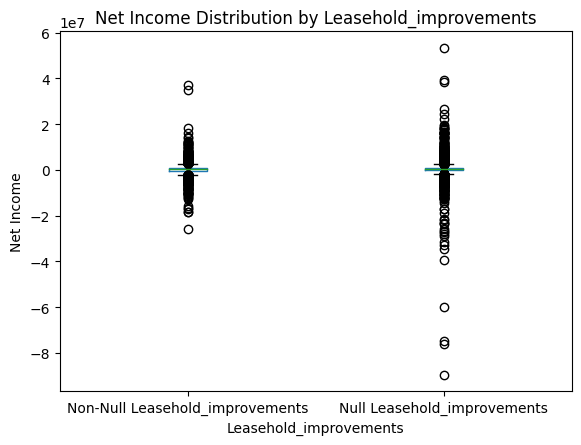

       Non-Null Leasehold_improvements  Null: Leasehold_improvements
count                     8.830000e+03                  5.875000e+03
mean                      3.205562e+05                  2.244568e+05
std                       1.698871e+06                  3.427490e+06
min                      -2.572346e+07                 -8.971656e+07
25%                      -2.843000e+05                 -2.596410e+05
50%                       3.203900e+05                  2.268440e+05
75%                       9.431370e+05                  8.266270e+05
max                       3.709429e+07                  5.337325e+07
T-Test p-value: 0.0243634813049533
Mann-Whitney U Test p-value: nan


In [377]:
selected_columns = [
    "Leasehold_improvements",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]


# Create a new column for grouping
df_selected["Leasehold_improvements"] = df_selected["Leasehold_improvements"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Leasehold_improvements", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Leasehold_improvements", "Null Leasehold_improvements"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Leasehold_improvements"].notnull()]
df_null = df20_cleaned[df20_cleaned["Leasehold_improvements"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Leasehold_improvements": df_non_null["Net_Income"].describe(),
    "Null: Leasehold_improvements": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

There are no varaibles in df15-19 that are close to this variable. This variable wouldnt apply universally to the other years because this is imporvements made this year. 

The Variable is important according to Hypothesis testing. The Null will be handled later in cleaning. THe nulls are significant compared to the non Nulls when analyzing Net_Income. 

# Overhead_Non-Salary_Costs

I jsut need to change the name to match 

In [378]:
df20_cleaned['Overhead_Non_Salary_Costs'] = df20_cleaned["Overhead_Non-Salary_Costs"]
df21_cleaned['Overhead_Non_Salary_Costs'] = df21_cleaned["Overhead_Non-Salary_Costs"]

df20_cleaned = df20_cleaned.drop(columns=["Overhead_Non-Salary_Costs"])
df21_cleaned = df21_cleaned.drop(columns=["Overhead_Non-Salary_Costs"])


# Total_long_term_liabilities

We can calculate this.

In [379]:
liabilities_columns = [col for col in df20_cleaned.columns if "liabilities" in col.lower()]
df_liabilities = df20_cleaned[liabilities_columns]
df_liabilities

Other_current_liabilities  Total_current_liabilities  \
0                       146013.0                  1509159.0   
1                         5427.0                  -257980.0   
2                        11931.0                   245384.0   
3                       354342.0                   937284.0   
4                     15092370.0                 16471912.0   
...                          ...                        ...   
14944                    69940.0                  1695956.0   
14945                  3910631.0                  4765995.0   
14946                     -150.0                   116946.0   
14947                   348187.0                  1224546.0   
14948                   790544.0                  3086703.0   

       Other_long_term_liabilities  Total_long_term_liabilities  \
0                              NaN                    8194774.0   
1                            257.0                        259.0   
2                              NaN                    3287601.0   
3                              NaN                    6423181.0   
4                              NaN                          NaN   
...                            ...                          ...   
14944                      18820.0                      18820.0   
14945                    4946666.0                    4946666.0   
14946                          NaN                          NaN   
14947                          NaN                     793600.0   
14948                      97813.0                     367022.0   

       Total_liabilities  Total_Liabilities_and_fund_balances  
0              9703933.0                           14400312.0  
1              -257721.0                            -278550.0  
2              3532985.0                            2817453.0  
3              7360465.0                            3176256.0  
4             16471912.0                           16961403.0  
...                  ...                                  ...  
14944          1714776.0                            2519888.0  
14945          9712661.0                            6382624.0  
14946           116946.0                             256712.0  
14947          2018146.0                            1476332.0  
14948          3453725.0                            3007023.0  

[14949 rows x 6 columns]

It seems that we can do Total_long_term_liabilities =  Total_Liabiltieas - Total_current_liabilties

In [380]:
liabilities_columns = [col for col in df19.columns if "liabilities" in col.lower()]
df_liabilities = df19[liabilities_columns]
df_liabilities

Other_current_liabilities  Total_current_liabilities  Total_liabilities
0                            NaN                        NaN                NaN
1                        26837.0                    94275.0            94275.0
2                        -3353.0                   237612.0           237612.0
3                            NaN                        NaN                NaN
4                       101118.0                   489058.0          4885852.0
...                          ...                        ...                ...
15177                    55205.0                  1655963.0          3333399.0
15178                   773118.0                  6598103.0          8172906.0
15179                        NaN                  3460167.0          3460167.0
15180                   -34927.0                   415426.0           415426.0
15181                        NaN                   211650.0           211650.0

[15182 rows x 3 columns]

In [381]:
df19["Total_long_term_liabilities"] = df19["Total_liabilities"] - df19["Total_current_liabilities"]


In [382]:
liabilities_columns = [col for col in df19.columns if "liabilities" in col.lower()]
df_liabilities = df19[liabilities_columns]
df_liabilities

Other_current_liabilities  Total_current_liabilities  \
0                            NaN                        NaN   
1                        26837.0                    94275.0   
2                        -3353.0                   237612.0   
3                            NaN                        NaN   
4                       101118.0                   489058.0   
...                          ...                        ...   
15177                    55205.0                  1655963.0   
15178                   773118.0                  6598103.0   
15179                        NaN                  3460167.0   
15180                   -34927.0                   415426.0   
15181                        NaN                   211650.0   

       Total_liabilities  Total_long_term_liabilities  
0                    NaN                          NaN  
1                94275.0                          0.0  
2               237612.0                          0.0  
3                    NaN                          NaN  
4              4885852.0                    4396794.0  
...                  ...                          ...  
15177          3333399.0                    1677436.0  
15178          8172906.0                    1574803.0  
15179          3460167.0                          0.0  
15180           415426.0                          0.0  
15181           211650.0                          0.0  

[15182 rows x 4 columns]

Seems good. 

In [383]:
df18["Total_long_term_liabilities"] = df18["Total_liabilities"] - df18["Total_current_liabilities"]
df17["Total_long_term_liabilities"] = df17["Total_liabilities"] - df17["Total_current_liabilities"]
df16["Total_long_term_liabilities"] = df16["Total_liabilities"] - df16["Total_current_liabilities"]
df15["Total_long_term_liabilities"] = df15["Total_liabilities"] - df15["Total_current_liabilities"]


##  Investments

In [384]:
df15['Investments'] = np.nan
df16['Investments'] = np.nan
df17['Investments'] = np.nan
df18['Investments'] = np.nan
df19['Investments'] = np.nan

# Net_Income_from_service_to_patients

In [385]:
df15['Net_Income_from_service_to_patients'] = df15["Net_Income_from_patients"]
df16['Net_Income_from_service_to_patients'] = df16["Net_Income_from_patients"]
df17['Net_Income_from_service_to_patients'] = df17["Net_Income_from_patients"]
df18['Net_Income_from_service_to_patients'] = df18["Net_Income_from_patients"]
df19['Net_Income_from_service_to_patients'] = df19["Net_Income_from_patients"]

df15 = df15.drop(columns=["Net_Income_from_patients"])
df16 = df16.drop(columns=["Net_Income_from_patients"])
df17 = df17.drop(columns=["Net_Income_from_patients"])
df18 = df18.drop(columns=["Net_Income_from_patients"])
df19 = df19.drop(columns=["Net_Income_from_patients"])

# Wage-related_Costs_(core)

In [386]:
df15['Wage-related_Costs_(core)'] = df15["Wage_related_Costs_core"]
df16['Wage-related_Costs_(core)'] = df16["Wage_related_Costs_core"]
df17['Wage-related_Costs_(core)'] = df17["Wage_related_Costs_core"]
df18['Wage-related_Costs_(core)'] = df18["Wage_related_Costs_core"]
df19['Wage-related_Costs_(core)'] = df19["Wage_related_Costs_core"]

df15 = df15.drop(columns=["Wage_related_Costs_core"])
df16 = df16.drop(columns=["Wage_related_Costs_core"])
df17 = df17.drop(columns=["Wage_related_Costs_core"])
df18 = df18.drop(columns=["Wage_related_Costs_core"])
df19 = df19.drop(columns=["Wage_related_Costs_core"])

# Total_Salaries_(adjusted)

In [387]:
df15['Total_Salaries_(adjusted)'] = df15["Total_Salaries_adjusted"]
df16['Total_Salaries_(adjusted)'] = df16["Total_Salaries_adjusted"]
df17['Total_Salaries_(adjusted)'] = df17["Total_Salaries_adjusted"]
df18['Total_Salaries_(adjusted)'] = df18["Total_Salaries_adjusted"]
df19['Total_Salaries_(adjusted)'] = df19["Total_Salaries_adjusted"]

df15 = df15.drop(columns=["Total_Salaries_adjusted"])
df16 = df16.drop(columns=["Total_Salaries_adjusted"])
df17 = df17.drop(columns=["Total_Salaries_adjusted"])
df18 = df18.drop(columns=["Total_Salaries_adjusted"])
df19 = df19.drop(columns=["Total_Salaries_adjusted"])

# SNF_Average_Length_of_Stay_Total

In [388]:
df15['SNF_Average_Length_of_Stay_Total'] = df15["SNF_Average_Length_of_stay_Tot"]
df16['SNF_Average_Length_of_Stay_Total'] = df16["SNF_Average_Length_of_stay_Tot"]
df17['SNF_Average_Length_of_Stay_Total'] = df17["SNF_Average_Length_of_stay_Tot"]
df18['SNF_Average_Length_of_Stay_Total'] = df18["SNF_Average_Length_of_stay_Tot"]
df19['SNF_Average_Length_of_Stay_Total'] = df19["SNF_Average_Length_of_stay_Tot"]

df15 = df15.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df16 = df16.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df17 = df17.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df18 = df18.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df19 = df19.drop(columns=["SNF_Average_Length_of_stay_Tot"])

# Notes_Payable
this doesnt exist in df19. There is Accounts Payable in both. Notes payable is similar but typically larger and longer payable values

In [389]:
selected_columns = [
    "Notes_Payable",
    "Notes_and_Loans_Payable_(short_term)", 
    "Mortgage_payable", 
    "Other_long_term_liabilities", 
    "Total_long_term_liabilities", 
    "Total_liabilities", 
    "Accounts_payable", 
    "Payroll_taxes_payable", 
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

Notes_Payable  Notes_and_Loans_Payable_(short_term)  Mortgage_payable  \
10363            NaN                                   NaN        36422308.0   
1275             NaN                                   NaN        56663532.0   
11523            NaN                              624359.0               NaN   
8776             NaN                                   NaN               NaN   
7194             NaN                              662922.0               NaN   
11622            NaN                                   NaN               NaN   
9166             NaN                                   NaN               NaN   
7319      43000752.0                             1275000.0               NaN   
1820             NaN                                   NaN               NaN   
2541             NaN                                   NaN               NaN   

       Other_long_term_liabilities  Total_long_term_liabilities  \
10363                   12143409.0                   48565717.0   
1275                    58081730.0                  114745262.0   
11523                          NaN                          NaN   
8776                           NaN                          NaN   
7194                      760268.0                    1609303.0   
11622                          NaN                          NaN   
9166                           NaN                          NaN   
7319                    10734680.0                   53735432.0   
1820                           NaN                          NaN   
2541                           NaN                          NaN   

       Total_liabilities  Accounts_payable  Payroll_taxes_payable  \
10363         52984260.0         1010780.0               418830.0   
1275         119643038.0           -1294.0                    NaN   
11523          2310958.0          190232.0               159029.0   
8776            340126.0         -262829.0                -2227.0   
7194           3252960.0          272091.0               145118.0   
11622           670401.0           73438.0                    NaN   
9166           6137677.0          132435.0                    NaN   
7319          59230707.0          317850.0                    NaN   
1820            733241.0          161568.0                15756.0   
2541            226165.0               NaN                    NaN   

       Total_current_liabilities  Total_Assets  Net_Income  Total_Income  
10363                  4418543.0    56736244.0    432483.0      432485.0  
1275                   4897776.0    92327196.0  -1443278.0    -1443278.0  
11523                  2310958.0     3326768.0   1401050.0     1401050.0  
8776                    340126.0     2044704.0    541455.0      541455.0  
7194                   1643657.0      624176.0  -1024747.0    -1024747.0  
11622                   670401.0     1657913.0    539013.0      539013.0  
9166                   6137677.0     8230266.0   -471795.0     -471795.0  
7319                   5495275.0   101461859.0  12201942.0    12201942.0  
1820                    733241.0     2916194.0    699765.0      699765.0  
2541                    226165.0      208182.0    -21112.0      -21112.0

Giving this to chat, I am able to derive this formula for getting Notes Payable. 
Notes Payable=Total Long-Term Liabilities−(Mortgage Payable+Other Long-Term Liabilities)

The only issue is mortgage payable is not in df19 either. 

I will do a deep dive into Notes payable real quick

In [390]:
df19_filtered = df19[df19["Provider_CCN"] == 415071]
df19_filtered
# scroll to Total_current_liabilities and Total Liabilities

rpt_rec_num  Provider_CCN                         Facility_Name  \
1882      1258378        415071  SOUTH COUNTY NURSING AND REHABILITAT   

         Street_Address            City State_Code Zip_Code      County  \
1882  740 OAK HILL ROAD  NORTH KINGSTON         RI     2852  WASHINGTON   

      Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
1882               39300.0                  U               1/1/2019   

     Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
1882           12/31/2019                4             875274.0   

      Accounts_payable  Buildings  Cash_on_hand_and_in_banks  \
1882          446232.0  4389001.0                     7450.0   

      General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
1882             -715063.0     15278023.0             1250700.0   

      Inpatient_Revenue  Less_Total_Operating_Expense  \
1882         15278023.0                     9685202.0   

      Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
1882                   5113022.0                 980543.0    503692.0   

      Net_Patient_Revenue  Number_of_Beds  Other_Assets  \
1882           10165001.0           120.0    -4854981.0   

      Other_current_liabilities  Overhead_Non_Salary_Costs  \
1882                  1295905.0                  5698092.0   

      SNF_Admissions_Other  SNF_Admissions_Title_XIX  \
1882                 161.0                      30.0   

      SNF_Admissions_Title_XVIII  SNF_Admissions_Total  \
1882                        92.0                 283.0   

      SNF_Average_Length_stay_XIX  SNF_Average_Length_stay_XVIII  \
1882                       367.06                          33.32   

      SNF_Days_Other  SNF_Days_Title_XIX  SNF_Days_Title_XVIII  \
1882          7009.0             26428.0                2266.0   

      SNF_Days_Total  SNF_Discharges_Title_Other  SNF_Discharges_Title_XIX  \
1882         35703.0                       140.0                      72.0   

      SNF_Discharges_Title_XVIII  SNF_Discharges_Total  \
1882                        68.0                 280.0   

      SNF_bed_Days_Available  Salaries_wages_and_fees_payable  Total_Assets  \
1882                 43800.0                         205771.0     1251929.0   

      Total_Bed_Days_Available  Total_Costs  Total_Days_Other  \
1882                   43800.0    1265013.0            7009.0   

      Total_Days_Title_XIX  Total_Days_Title_XVIII  Total_Days_Total  \
1882               26428.0                  2266.0           35703.0   

      Total_Discharges_Title_Other  Total_Discharges_Title_XIX  \
1882                         140.0                        72.0   

      Total_Discharges_Title_XVIII  Total_Discharges_Total  \
1882                          68.0                   280.0   

      Total_General_Inpatient_Revenue  Total_Income  \
1882                       12772605.0      503692.0   

      Total_Liab_and_fund_balances  Total_RUG_Days  \
1882                     1251929.0          1560.0   

      Total_Salaries_From_Worksheet_A  Total_current_assets  \
1882                        3987110.0             1684662.0   

      Total_current_liabilities  Total_fixed_Assets  Total_fund_balances  \
1882                  1957631.0           4422248.0            -715063.0   

      Total_liabilities  Total_other_Assets  Fixed_equipment  Total_Charges  \
1882          1966992.0          -4854981.0              NaN            NaN   

      Contract_Labor  SNF_Number_of_Beds  \
1882             NaN               120.0   

      Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
1882                                                NaN                  

      Total_long_term_liabilities  Investments  \
1882                       9361.0          NaN   

      Net_Income_from_service_to_patients  Wage-related_Costs_(core)  \
1882                             479799.0                   763846.0   

      Total_Salaries_(adjusted)  SNF_Average_Len

In [391]:
df20_cleaned_filtered = df20_cleaned[df20_cleaned["Provider_CCN"] == 415071]
df20_cleaned_filtered


rpt_rec_num  Provider_CCN                         Facility_Name  \
9657       1314978        415071  SOUTH COUNTY NURSING AND REHABILITAT   
14947      1364622        415071   SOUTH COUNTY NURSING & REHAB CENTER   

          Street_Address             City State_Code Zip_Code      County  \
9657   740 OAK HILL ROAD   NORTH KINGSTON         RI    02852  WASHINGTON   
14947  740 OAK HILL ROAD  NORTH KINGSTOWN         RI    02852  WASHINGTON   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
9657                39300.0                  U             01/01/2020   
14947               39300.0                  U             07/01/2020   

      Fiscal_Year_End_Date  Type_of_Control  Total_Days_Title_XVIII  \
9657            06/30/2020              6.0                  1018.0   
14947           12/31/2020              6.0                   576.0   

       Total_Days_Title_XIX  Total_Days_Other  Total_Days_Total  \
9657                11408.0            2301.0           14727.0   
14947                6957.0            2690.0           10223.0   

       Number_of_Beds  Total_Bed_Days_Available  Total_Discharges_Title_XVIII  \
9657            120.0                   21840.0                          26.0   
14947           120.0                   22080.0                          14.0   

       Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
9657                        102.0                          54.0   
14947                        27.0                          39.0   

       Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_XVIII  \
9657                    182.0                                   39.15   
14947                    80.0                                   41.14   

       SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
9657                                 111.84                             80.92   
14947                                257.67                            127.79   

       SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  \
9657                         26.0                      15.0   
14947                        26.0                       9.0   

       SNF_Admissions_Other  SNF_Admissions_Total  SNF_Days_Title_XVIII  \
9657                   49.0                  90.0                1018.0   
14947                  54.0                  89.0                 576.0   

       SNF_Days_Title_XIX  SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  \
9657              11408.0          2301.0         14727.0               120.0   
14947              6957.0          2690.0         10223.0               120.0   

       SNF_Bed_Days_Available  SNF_Discharges_Title_XVIII  \
9657                  21840.0                        26.0   
14947                 22080.0                        14.0   

       SNF_Discharges_Title_XIX  SNF_Discharges_Title_Other  \
9657                      102.0                        54.0   
14947                      27.0                        39.0   

       SNF_Discharges_Total  Total_RUG_Days  Total_Salaries_From_Worksheet_A  \
9657                  182.0             NaN                        1948153.0   
14947                  80.0             NaN                        1408295.0   

       Total_Charges  Total_Costs  Wage-related_Costs_(core)  \
9657        804581.0     511050.0                   341271.0   
14947       453329.0     363700.0                   218453.0   

       Total_Salaries_(adjusted)  Contract_Labor  Cash_on_hand_and_in_banks  \
9657                   1948153.0       1602704.0                     4250.0   
14947                  1408295.0        255632.0                   154802.0   

       Accounts_Receivable  \
9657              991129.0   
14947             766098.0   

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
9657                                            674984.0                  
14947                                            45011.0   

In [392]:
df21_cleaned_filtered = df21_cleaned[df21_cleaned["Provider_CCN"] == 415071]
df21_cleaned_filtered

rpt_rec_num  Provider_CCN                        Facility_Name  \
8427      1334085        415071  SOUTH COUNTY NURSING & REHAB CENTER   

       Street_Address             City State_Code Zip_Code      County  \
8427  740 OAK HILL RD  NORTH KINGSTOWN         RI    02852  WASHINGTON   

      Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
8427               39300.0                  U             01/01/2021   

     Fiscal_Year_End_Date  Type_of_Control  Total_Days_Title_XVIII  \
8427           12/31/2021              6.0                  2642.0   

      Total_Days_Title_XIX  Total_Days_Other  Total_Days_Total  \
8427               14641.0            7961.0           25244.0   

      Number_of_Beds  Total_Bed_Days_Available  Total_Discharges_Title_XVIII  \
8427           120.0                   43800.0                          94.0   

      Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
8427                        72.0                         203.0   

      Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_XVIII  \
8427                   369.0                                   28.11   

      SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
8427                                203.35                             68.41   

      SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  \
8427                       135.0                      50.0   

      SNF_Admissions_Other  SNF_Admissions_Total  SNF_Days_Title_XVIII  \
8427                 211.0                 396.0                2642.0   

      SNF_Days_Title_XIX  SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  \
8427             14641.0          7961.0         25244.0               120.0   

      SNF_Bed_Days_Available  SNF_Discharges_Title_XVIII  \
8427                 43800.0                        94.0   

      SNF_Discharges_Title_XIX  SNF_Discharges_Title_Other  \
8427                      72.0                       203.0   

      SNF_Discharges_Total  Total_RUG_Days  Total_Salaries_From_Worksheet_A  \
8427                 369.0             NaN                        3346879.0   

      Total_Charges  Total_Costs  Wage-related_Costs_(core)  \
8427      1349411.0    1071082.0                   496564.0   

      Total_Salaries_(adjusted)  Contract_Labor  Cash_on_hand_and_in_banks  \
8427                  3346879.0        789611.0                   189942.0   

      Accounts_Receivable  \
8427            1281508.0   

      Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
8427                                           190408.0                  

      Inventory  Prepaid_expenses  Other_current_assets  Total_Current_Assets  \
8427        NaN          154826.0                   NaN             1910797.0   

      Land  Land_improvements  Buildings  Leasehold_improvements  \
8427   NaN                NaN        NaN                 21690.0   

      Fixed_equipment  Major_movable_equipment  Total_fixed_Assets  \
8427          87077.0                      NaN            190359.0   

      Investments  Other_Assets  Total_other_Assets  Total_Assets  \
8427          NaN           NaN                 NaN     2101156.0   

      Accounts_payable  Payroll_taxes_payable  \
8427          433079.0                74483.0   

      Notes_and_Loans_Payable_(short_term)  Other_current_liabilities  \
8427                              430749.0                   518838.0   

      Total_current_liabilities  Mortgage_payable  Notes_Payable  \
8427                  1647471.0               NaN            NaN   

      Other_long_term_liabilities  Total_long_term_liabilities  \
8427                      14014.0                      14014.0   

      Total_liabilities  General_fund_balance  Total_fund_balances  \
8427          1661485.0              439671.0             439671.0   

      Total_Liabilities_and_fund_balances  \
8427                            2101156.0   

      Total_General_Inpatient_Car

I found an explanation that is valid.

356,661 difference from total liabilities 2020(2nd one) and 2021
422,925 difference from current liabilities 

So it seem that they paid off around 356,661 of the debt and then the most of the rest went to Total_current_liabilities and the rest from that went to Other_longterm_liabilities. 

This makes sense. 

So the company took out a long term loan then the next year they sold most of it off and the rest went to current liabilities and some stayed in other long term liabilities. 

Because.... Total_long_term_liabilties = other_long_term_liabilities + Notes_payable.... I think I will quickly look at the significance/correlation and drop the column.

In [393]:

df_selected_cleaned = df_selected
df_selected_cleaned.fillna(0, inplace=True)
df_selected_cleaned

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\1596943463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_cleaned.fillna(0, inplace=True)


Notes_Payable  Notes_and_Loans_Payable_(short_term)  Mortgage_payable  \
0                0.0                              566616.0         8194774.0   
1                0.0                                   0.0               0.0   
2           515503.0                                   0.0               0.0   
3           500000.0                                   0.0         5923181.0   
4                0.0                                   0.0               0.0   
...              ...                                   ...               ...   
14944            0.0                             1118578.0               0.0   
14945            0.0                                   0.0               0.0   
14946            0.0                                   0.0               0.0   
14947       793600.0                              500000.0               0.0   
14948       269209.0                                   0.0               0.0   

       Other_long_term_liabilities  Total_long_term_liabilities  \
0                              0.0                    8194774.0   
1                            257.0                        259.0   
2                              0.0                    3287601.0   
3                              0.0                    6423181.0   
4                              0.0                          0.0   
...                            ...                          ...   
14944                      18820.0                      18820.0   
14945                    4946666.0                    4946666.0   
14946                          0.0                          0.0   
14947                          0.0                     793600.0   
14948                      97813.0                     367022.0   

       Total_liabilities  Accounts_payable  Payroll_taxes_payable  \
0              9703933.0          493549.0                    0.0   
1              -257721.0           73933.0              -337340.0   
2              3532985.0           90834.0                    0.0   
3              7360465.0          463420.0                26575.0   
4             16471912.0          958326.0                 -177.0   
...                  ...               ...                    ...   
14944          1714776.0          500847.0                    0.0   
14945          9712661.0          371095.0                    0.0   
14946           116946.0          117096.0                    0.0   
14947          2018146.0           95290.0                74483.0   
14948          3453725.0         1750174.0               190689.0   

       Total_current_liabilities  Total_Assets  Net_Income  Total_Income  
0                      1509159.0    14400312.0     60384.0       60384.0  
1                      -257980.0     -278550.0   -261181.0     -261181.0  
2                       245384.0     2817453.0   -191802.0     -191802.0  
3                       937284.0     3176256.0    -36899.0      -36899.0  
4                     16471912.0    16961403.0    157671.0      157671.0  
...                          ...           ...         ...           ...  
14944                  1695956.0     2519888.0    545241.0      545241.0  
14945                  4765995.0     6382624.0   -433682.0     -433682.0  
14946                   116946.0      256712.0   -511877.0     -511877.0  
14947                  1224546.0     1476332.0   -541814.0     -541814.0  
14948                  3086703.0     3007023.0    -89357.0      -58933.0  

[14949 rows x 12 columns]

In [394]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Notes_Payable']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Notes_Payable is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Notes_Payable is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: -0.010207837790998148
T-statistic: -634.8593675757543
P-value: 0.0
Reject the null hypothesis: Notes_Payable is significant in predicting Net_Income.


I took out Nulls and made them zero and still it is significant.

In [395]:
df_selected_cleaned.corr()

Notes_Payable  \
Notes_Payable                              1.000000   
Notes_and_Loans_Payable_(short_term)       0.034766   
Mortgage_payable                          -0.012213   
Other_long_term_liabilities                0.179070   
Total_long_term_liabilities                0.455946   
Total_liabilities                          0.461962   
Accounts_payable                           0.017844   
Payroll_taxes_payable                      0.018875   
Total_current_liabilities                  0.277498   
Total_Assets                               0.326186   
Net_Income                                -0.042432   
Total_Income                               0.014609   

                                      Notes_and_Loans_Payable_(short_term)  \
Notes_Payable                                                     0.034766   
Notes_and_Loans_Payable_(short_term)                              1.000000   
Mortgage_payable                                                  0.051548   
Other_long_term_liabilities                                       0.043520   
Total_long_term_liabilities                                       0.063642   
Total_liabilities                                                 0.152751   
Accounts_payable                                                  0.019480   
Payroll_taxes_payable                                             0.028767   
Total_current_liabilities                                         0.221602   
Total_Assets                                                      0.112130   
Net_Income                                                       -0.019952   
Total_Income                                                      0.098700   

                                      Mortgage_payable  \
Notes_Payable                                -0.012213   
Notes_and_Loans_Payable_(short_term)          0.051548   
Mortgage_payable                              1.000000   
Other_long_term_liabilities                   0.179572   
Total_long_term_liabilities                   0.446746   
Total_liabilities                             0.484229   
Accounts_payable                              0.092071   
Payroll_taxes_payable                         0.247671   
Total_current_liabilities                     0.337341   
Total_Assets                                  0.393909   
Net_Income                                   -0.076194   
Total_Income                                  0.259356   

                                      Other_long_term_liabilities  \
Notes_Payable                                            0.179070   
Notes_and_Loans_Payable_(short_term)                     0.043520   
Mortgage_payable                                         0.179572   
Other_long_term_liabilities                              1.000000   
Total_long_term_liabilities                              0.870868   
Total_liabilities                                        0.744284   
Accounts_payable                                         0.102027   
Payroll_taxes_payable                                    0.008261   
Total_current_liabilities                                0.243977   
Total_Assets                                             0.757104   
Net_Income                                              -0.107061   
Total_Income                                             0.200548   

                                      Total_long_term_liabilities  \
Notes_Payable                                            0.455946   
Notes_and_Loans_Payable_(short_term)                     0.063642   
Mortgage_payable                                         0.446746   
Other_long_term_liabilities                              0.870868   
Total_long_term_liabilities                              1.000000   
Total_liabilities                                        0.892784   
Accounts_payable                                         0.070265   
Payroll_taxes_payable                                    0.088238   
Total_current_liabilities        

In [396]:
df20_cleaned

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1254744         75031                      GLEN HILL CENTER   
1          1255877        495268         MARY WASHINGTON HEALTH CENTER   
2          1256270        295107      ADVANCED HEALTH CARE OF PARADISE   
3          1259169        146097            EL PASO HEALTH CARE CENTER   
4          1259189        215136  BIRCH MANOR CTR FOR REHAB & HEALTHCA   
...            ...           ...                                   ...   
14944      1363186        105382  SANDGATE GARDENS REHAB AND NURSING C   
14945      1363595        145970             THE VILLA AT WINDSOR PARK   
14946      1364413        375567               MEMORIAL NURSING CENTER   
14947      1364622        415071   SOUTH COUNTY NURSING & REHAB CENTER   
14948      1365542         56261   MERRITT MANOR CONVALESCENT HOSPITAL   

                       Street_Address             City State_Code Zip_Code  \
0                    1 GLEN HILL ROAD          DANBURY         CT    06811   
1                  2400 MCKINNEY BLVD   COLONIAL BEACH         VA    22443   
2      3455 PECOS-MCLEOD INTERCONNECT        LAS VEGAS         NV    89121   
3              850 EAST SECOND STREET          EL PASO         IL    61738   
4                     7309 SECOND AVE       SYKESVILLE         MD    21784   
...                               ...              ...        ...      ...   
14944           703 SOUTH 29TH STREET      FORT PIERCE         FL    34947   
14945           2649 EAST 75TH STREET          CHICAGO         IL    60649   
14946              319 EAST JOSEPHINE        FREDERICK         OK    73542   
14947               740 OAK HILL ROAD  NORTH KINGSTOWN         RI    02852   
14948         604 EAST MERRITT AVENUE           TULARE         CA    93274   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0         FAIRFIELD               14860.0                  U   
1      WESTMORELAND               99949.0                  R   
2             CLARK               29820.0                  U   
3          WOODFORD               37900.0                  U   
4           CARROLL               12580.0                  U   
...             ...                   ...                ...   
14944     ST. LUCIE               38940.0                  U   
14945          COOK               16974.0                  U   
14946       TILLMAN               99937.0                  R   
14947    WASHINGTON               39300.0                  U   
14948        TULARE               47300.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                 10/01/2019           10/31/2019              6.0   
1                 11/01/2019           12/29/2019              4.0   
2                 10/04/2019           12/31/2019              4.0   
3                 10/31/2019           12/31/2019              4.0   
4                 11/01/2019           12/31/2019              4.0   
...                      ...                  ...              ...   
14944             01/01/2020           12/31/2020              4.0   
14945             01/01/2020           12/31/2020              6.0   
14946             07/01/2020           06/30/2021              8.0   
14947             07/01/2020           12/31/2020              6.0   
14948             01/01/2020           12/31/2020              6.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
0                       735.0                1648.0             538.0   
1                       341.0                 260.0            2803.0   
2                      1381.0                   NaN             846.0   
3                       131.0                3853.0            1441.0   
4                       539.0                4957.0             378.0   
...                       ...                   ...               ...   
14944                  8319.0               18121.0         

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\1336549254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Notes_Payable"] = df_selected["Notes_Payable"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

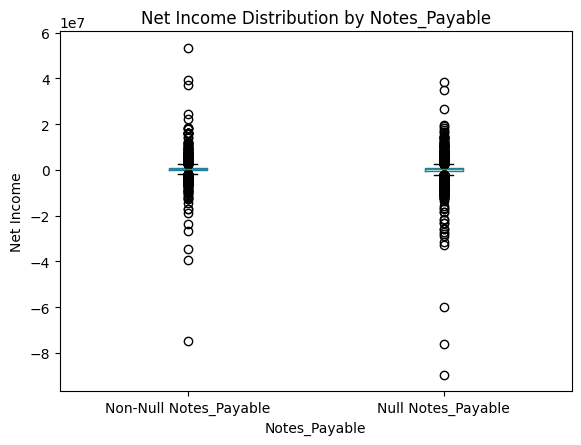

       Non-Null Notes_Payable  Null: Notes_Payable
count            4.201000e+03         1.050400e+04
mean             3.769733e+05         2.442432e+05
std              2.824273e+06         2.409283e+06
min             -7.481245e+07        -8.971656e+07
25%             -2.334440e+05        -2.947408e+05
50%              3.136950e+05         2.647455e+05
75%              9.209210e+05         8.986892e+05
max              5.337325e+07         3.846258e+07
T-Test p-value: 0.004130310155521638
Mann-Whitney U Test p-value: nan


In [397]:
selected_columns = [
    "Notes_Payable",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]

# Create a new column for grouping
df_selected["Notes_Payable"] = df_selected["Notes_Payable"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Notes_Payable", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Notes_Payable")
plt.suptitle("")
plt.xlabel("Notes_Payable")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Notes_Payable", "Null Notes_Payable"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Notes_Payable"].notnull()]
df_null = df20_cleaned[df20_cleaned["Notes_Payable"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Notes_Payable": df_non_null["Net_Income"].describe(),
    "Null: Notes_Payable": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

It is significant as a whole to Net_Income. the null to not null aparently doesnt matter. But the variable is very similar to Total_Liabilities and Total_liabilities has better correlation with the target. 

I will keep Notes_Payable in the code for the append but will probably take it out later as I cant necessarily calculate it accurately and Total_Liabilties takes it place. 

In [398]:
df15['Notes_Payable'] = np.nan
df16['Notes_Payable'] = np.nan
df17['Notes_Payable'] = np.nan
df18['Notes_Payable'] = np.nan
df19['Notes_Payable'] = np.nan

# 'Other_long_term_liabilities' 
This is the same story as Notes_Payable

In [399]:
df15['Other_long_term_liabilities'] = np.nan
df16['Other_long_term_liabilities'] = np.nan
df17['Other_long_term_liabilities'] = np.nan
df18['Other_long_term_liabilities'] = np.nan
df19['Other_long_term_liabilities'] = np.nan

## Payroll_taxes_payable

It is not in df19 and it will be part of total_liabiltities. 

In [400]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Payroll_taxes_payable']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.043924077945947444
T-statistic: 197.72155576727206
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


In [401]:
df20_cleaned

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1254744         75031                      GLEN HILL CENTER   
1          1255877        495268         MARY WASHINGTON HEALTH CENTER   
2          1256270        295107      ADVANCED HEALTH CARE OF PARADISE   
3          1259169        146097            EL PASO HEALTH CARE CENTER   
4          1259189        215136  BIRCH MANOR CTR FOR REHAB & HEALTHCA   
...            ...           ...                                   ...   
14944      1363186        105382  SANDGATE GARDENS REHAB AND NURSING C   
14945      1363595        145970             THE VILLA AT WINDSOR PARK   
14946      1364413        375567               MEMORIAL NURSING CENTER   
14947      1364622        415071   SOUTH COUNTY NURSING & REHAB CENTER   
14948      1365542         56261   MERRITT MANOR CONVALESCENT HOSPITAL   

                       Street_Address             City State_Code Zip_Code  \
0                    1 GLEN HILL ROAD          DANBURY         CT    06811   
1                  2400 MCKINNEY BLVD   COLONIAL BEACH         VA    22443   
2      3455 PECOS-MCLEOD INTERCONNECT        LAS VEGAS         NV    89121   
3              850 EAST SECOND STREET          EL PASO         IL    61738   
4                     7309 SECOND AVE       SYKESVILLE         MD    21784   
...                               ...              ...        ...      ...   
14944           703 SOUTH 29TH STREET      FORT PIERCE         FL    34947   
14945           2649 EAST 75TH STREET          CHICAGO         IL    60649   
14946              319 EAST JOSEPHINE        FREDERICK         OK    73542   
14947               740 OAK HILL ROAD  NORTH KINGSTOWN         RI    02852   
14948         604 EAST MERRITT AVENUE           TULARE         CA    93274   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0         FAIRFIELD               14860.0                  U   
1      WESTMORELAND               99949.0                  R   
2             CLARK               29820.0                  U   
3          WOODFORD               37900.0                  U   
4           CARROLL               12580.0                  U   
...             ...                   ...                ...   
14944     ST. LUCIE               38940.0                  U   
14945          COOK               16974.0                  U   
14946       TILLMAN               99937.0                  R   
14947    WASHINGTON               39300.0                  U   
14948        TULARE               47300.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                 10/01/2019           10/31/2019              6.0   
1                 11/01/2019           12/29/2019              4.0   
2                 10/04/2019           12/31/2019              4.0   
3                 10/31/2019           12/31/2019              4.0   
4                 11/01/2019           12/31/2019              4.0   
...                      ...                  ...              ...   
14944             01/01/2020           12/31/2020              4.0   
14945             01/01/2020           12/31/2020              6.0   
14946             07/01/2020           06/30/2021              8.0   
14947             07/01/2020           12/31/2020              6.0   
14948             01/01/2020           12/31/2020              6.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
0                       735.0                1648.0             538.0   
1                       341.0                 260.0            2803.0   
2                      1381.0                   NaN             846.0   
3                       131.0                3853.0            1441.0   
4                       539.0                4957.0             378.0   
...                       ...                   ...               ...   
14944                  8319.0               18121.0         

In [402]:
df_selected_cleaned.corr()

Notes_Payable  \
Notes_Payable                              1.000000   
Notes_and_Loans_Payable_(short_term)       0.034766   
Mortgage_payable                          -0.012213   
Other_long_term_liabilities                0.179070   
Total_long_term_liabilities                0.455946   
Total_liabilities                          0.461962   
Accounts_payable                           0.017844   
Payroll_taxes_payable                      0.018875   
Total_current_liabilities                  0.277498   
Total_Assets                               0.326186   
Net_Income                                -0.042432   
Total_Income                               0.014609   

                                      Notes_and_Loans_Payable_(short_term)  \
Notes_Payable                                                     0.034766   
Notes_and_Loans_Payable_(short_term)                              1.000000   
Mortgage_payable                                                  0.051548   
Other_long_term_liabilities                                       0.043520   
Total_long_term_liabilities                                       0.063642   
Total_liabilities                                                 0.152751   
Accounts_payable                                                  0.019480   
Payroll_taxes_payable                                             0.028767   
Total_current_liabilities                                         0.221602   
Total_Assets                                                      0.112130   
Net_Income                                                       -0.019952   
Total_Income                                                      0.098700   

                                      Mortgage_payable  \
Notes_Payable                                -0.012213   
Notes_and_Loans_Payable_(short_term)          0.051548   
Mortgage_payable                              1.000000   
Other_long_term_liabilities                   0.179572   
Total_long_term_liabilities                   0.446746   
Total_liabilities                             0.484229   
Accounts_payable                              0.092071   
Payroll_taxes_payable                         0.247671   
Total_current_liabilities                     0.337341   
Total_Assets                                  0.393909   
Net_Income                                   -0.076194   
Total_Income                                  0.259356   

                                      Other_long_term_liabilities  \
Notes_Payable                                            0.179070   
Notes_and_Loans_Payable_(short_term)                     0.043520   
Mortgage_payable                                         0.179572   
Other_long_term_liabilities                              1.000000   
Total_long_term_liabilities                              0.870868   
Total_liabilities                                        0.744284   
Accounts_payable                                         0.102027   
Payroll_taxes_payable                                    0.008261   
Total_current_liabilities                                0.243977   
Total_Assets                                             0.757104   
Net_Income                                              -0.107061   
Total_Income                                             0.200548   

                                      Total_long_term_liabilities  \
Notes_Payable                                            0.455946   
Notes_and_Loans_Payable_(short_term)                     0.063642   
Mortgage_payable                                         0.446746   
Other_long_term_liabilities                              0.870868   
Total_long_term_liabilities                              1.000000   
Total_liabilities                                        0.892784   
Accounts_payable                                         0.070265   
Payroll_taxes_payable                                    0.088238   
Total_current_liabilities        

Total Liabilities has better correlation with Net_Income then Payroll_taxes_payable does with Net_Income. 

I will include it in the merge then probably take out. 

In [403]:
df15['Payroll_taxes_payable'] = np.nan
df16['Payroll_taxes_payable'] = np.nan
df17['Payroll_taxes_payable'] = np.nan
df18['Payroll_taxes_payable'] = np.nan
df19['Payroll_taxes_payable'] = np.nan

# Land_improvements

There are no columns like this in df19

In [404]:
selected_columns = [
    "Land_improvements",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

Land_improvements  Total_current_liabilities  Total_Assets  Net_Income  \
3594            384789.0                  7218142.0    26412531.0  -2078193.0   
10234                NaN                   968637.0     2119352.0   -782298.0   
2789            265793.0                  2343523.0     2265069.0   -739365.0   
6948                 NaN                 -2058838.0     6477791.0   2150151.0   
6731                 NaN                   253198.0    13879269.0    474034.0   
4427                 NaN                  2093551.0     2013568.0    377118.0   
710                  NaN                 -4470527.0      153847.0   -136118.0   
2847            813079.0                   630378.0    21126991.0    242514.0   
1510            121673.0                   458721.0     2801016.0   1029412.0   
2123                 NaN                  -731980.0     2804503.0  -1296057.0   

       Total_Income  
3594     -2078193.0  
10234     -782250.0  
2789      -739365.0  
6948      2172624.0  
6731       474034.0  
4427       398913.0  
710       -136118.0  
2847       242514.0  
1510      1029412.0  
2123     -3991957.0

In [405]:
df_selected = df_selected.dropna()

In [406]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Land_improvements']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.015304662253540047
T-statistic: 66.97274503112008
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


both null are signficant 

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\3256580522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Land_improvements"] = df_selected["Land_improvements"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

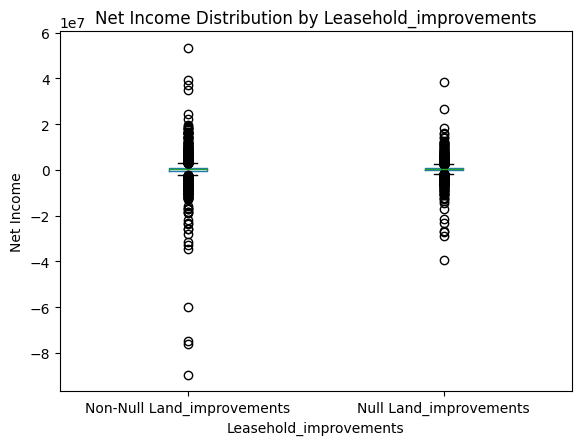

       Non-Null: Land_improvements  Null: Land_improvements
count                 4.887000e+03             9.818000e+03
mean                  2.015102e+05             3.223075e+05
std                   3.693627e+06             1.683216e+06
min                  -8.971656e+07            -3.936368e+07
25%                  -4.163905e+05            -2.163722e+05
50%                   2.260500e+05             2.964695e+05
75%                   9.336630e+05             8.945398e+05
max                   5.337325e+07             3.846258e+07
T-Test p-value: 0.006494148040144279
Mann-Whitney U Test p-value: nan


In [407]:
selected_columns = [
    "Land_improvements",
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Land_improvements"] = df_selected["Land_improvements"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Land_improvements", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Land_improvements", "Null Land_improvements"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Land_improvements"].notnull()]
df_null = df20_cleaned[df20_cleaned["Land_improvements"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Land_improvements": df_non_null["Net_Income"].describe(),
    "Null: Land_improvements": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

In [408]:
df15['Land_improvements'] = np.nan
df16['Land_improvements'] = np.nan
df17['Land_improvements'] = np.nan
df18['Land_improvements'] = np.nan
df19['Land_improvements'] = np.nan

# Allowable_Bad_Debts

In [409]:
df20_cleaned

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1254744         75031                      GLEN HILL CENTER   
1          1255877        495268         MARY WASHINGTON HEALTH CENTER   
2          1256270        295107      ADVANCED HEALTH CARE OF PARADISE   
3          1259169        146097            EL PASO HEALTH CARE CENTER   
4          1259189        215136  BIRCH MANOR CTR FOR REHAB & HEALTHCA   
...            ...           ...                                   ...   
14944      1363186        105382  SANDGATE GARDENS REHAB AND NURSING C   
14945      1363595        145970             THE VILLA AT WINDSOR PARK   
14946      1364413        375567               MEMORIAL NURSING CENTER   
14947      1364622        415071   SOUTH COUNTY NURSING & REHAB CENTER   
14948      1365542         56261   MERRITT MANOR CONVALESCENT HOSPITAL   

                       Street_Address             City State_Code Zip_Code  \
0                    1 GLEN HILL ROAD          DANBURY         CT    06811   
1                  2400 MCKINNEY BLVD   COLONIAL BEACH         VA    22443   
2      3455 PECOS-MCLEOD INTERCONNECT        LAS VEGAS         NV    89121   
3              850 EAST SECOND STREET          EL PASO         IL    61738   
4                     7309 SECOND AVE       SYKESVILLE         MD    21784   
...                               ...              ...        ...      ...   
14944           703 SOUTH 29TH STREET      FORT PIERCE         FL    34947   
14945           2649 EAST 75TH STREET          CHICAGO         IL    60649   
14946              319 EAST JOSEPHINE        FREDERICK         OK    73542   
14947               740 OAK HILL ROAD  NORTH KINGSTOWN         RI    02852   
14948         604 EAST MERRITT AVENUE           TULARE         CA    93274   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0         FAIRFIELD               14860.0                  U   
1      WESTMORELAND               99949.0                  R   
2             CLARK               29820.0                  U   
3          WOODFORD               37900.0                  U   
4           CARROLL               12580.0                  U   
...             ...                   ...                ...   
14944     ST. LUCIE               38940.0                  U   
14945          COOK               16974.0                  U   
14946       TILLMAN               99937.0                  R   
14947    WASHINGTON               39300.0                  U   
14948        TULARE               47300.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                 10/01/2019           10/31/2019              6.0   
1                 11/01/2019           12/29/2019              4.0   
2                 10/04/2019           12/31/2019              4.0   
3                 10/31/2019           12/31/2019              4.0   
4                 11/01/2019           12/31/2019              4.0   
...                      ...                  ...              ...   
14944             01/01/2020           12/31/2020              4.0   
14945             01/01/2020           12/31/2020              6.0   
14946             07/01/2020           06/30/2021              8.0   
14947             07/01/2020           12/31/2020              6.0   
14948             01/01/2020           12/31/2020              6.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
0                       735.0                1648.0             538.0   
1                       341.0                 260.0            2803.0   
2                      1381.0                   NaN             846.0   
3                       131.0                3853.0            1441.0   
4                       539.0                4957.0             378.0   
...                       ...                   ...               ...   
14944                  8319.0               18121.0         

In [410]:
selected_columns = [
    "Provider_CCN",
    "Allowable_Bad_Debts", 
    "Net_Patient_Revenue", 
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Accounts_Receivable",
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

Provider_CCN  Allowable_Bad_Debts  Net_Patient_Revenue  \
11326        395834              61419.0           11999991.0   
3258          65420               3685.0            5123662.0   
3737         555219               6572.0           11494050.0   
8715         505123              94854.0           10786608.0   
8462         335410             196340.0           15778827.0   
14557        255297              71027.0            7560827.0   
12866        105623             766005.0           11081264.0   
7877         265167             123379.0            7446439.0   
2959         205143              29038.0            3931350.0   
2204         475012              18519.0           14934073.0   

       Less_Contractual_Allowance_and_discounts_on_patients'_accounts  \
11326                                          1431033.0                
3258                                            457199.0                
3737                                            839379.0                
8715                                             55902.0                
8462                                                 NaN                
14557                                           889994.0                
12866                                         10461980.0                
7877                                           1962719.0                
2959                                            750109.0                
2204                                           5328562.0                

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
11326                                           232707.0                  
3258                                             53000.0                  
3737                                             50768.0                  
8715                                            347600.0                  
8462                                                 NaN                  
14557                                            13454.0                  
12866                                           241066.0                  
7877                                            193511.0                  
2959                                             40000.0                  
2204                                            114622.0                  

       Accounts_Receivable  Net_Income  Total_Income  
11326            1325569.0  -1234111.0    -1225801.0  
3258              471446.0   -564336.0     -564335.0  
3737              998151.0    149143.0      149145.0  
8715             1700181.0   -495557.0     -495557.0  
8462             1888539.0    456443.0      456443.0  
14557             636785.0    559963.0      559963.0  
12866            1681384.0    215127.0      222240.0  
7877             1534550.0     29664.0       29664.0  
2959              466221.0      2743.0        2743.0  
2204             1455206.0  -1133363.0    -1133363.0

In [411]:
selected_columns = [
    "Provider_CCN",
    "Allowable_Bad_Debts", 
    "Net_Patient_Revenue", 
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Accounts_Receivable",
    "Net_Income", 
    "Total_Income"
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)

Provider_CCN  Allowable_Bad_Debts  Net_Patient_Revenue  \
3496         195547              26254.0            6104487.0   
10609        525557                  NaN           14784990.0   
12858        495273             144202.0           14636626.0   
13078        315143              49296.0           10110902.0   
13409        515163              55484.0            4474357.0   
7910         105360             104477.0            8007433.0   
2731          55964              60912.0           13356010.0   
13010        315329              62346.0           23270168.0   
5606         366152                  NaN            9686730.0   
10207        265801              34520.0            2851275.0   

       Less_Contractual_Allowance_and_discounts_on_patients'_accounts  \
3496                                            399308.0                
10609                                           128508.0                
12858                                          7412573.0                
13078                                          6641271.0                
13409                                           326578.0                
7910                                           2076013.0                
2731                                           3058333.0                
13010                                          3076671.0                
5606                                           1624301.0                
10207                                          -130314.0                

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
3496                                            264629.0                  
10609                                                NaN                  
12858                                           334299.0                  
13078                                           233481.0                  
13409                                            68195.0                  
7910                                             48499.0                  
2731                                             87804.0                  
13010                                           465300.0                  
5606                                            170000.0                  
10207                                                NaN                  

       Accounts_Receivable  Net_Income  Total_Income  
3496              794615.0   1365745.0     1365745.0  
10609            1378002.0   -841409.0     -841409.0  
12858            2029783.0    836763.0      836763.0  
13078            1490433.0   -909079.0     -909079.0  
13409            3502862.0    336152.0      336152.0  
7910              765953.0    619234.0      619234.0  
2731             1852905.0   -146677.0     -138651.0  
13010            1987911.0  -3261306.0    -3150094.0  
5606             1095402.0   2482840.0     2482840.0  
10207             327257.0   -668001.0     -668001.0

In [412]:
selected_columns = [
    "Allowable_Bad_Debts", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)

Allowable_Bad_Debts  Net_Income
12847             353434.0   4656352.0
12266                  NaN     11870.0
5579               14098.0    971053.0
9942              168787.0   1815634.0
11293              30215.0   -837667.0
2371               68600.0   -101263.0
7737               47525.0   -361507.0
2206                   NaN   -476057.0
8913                   NaN   -308903.0
1021              195026.0    150426.0

In [413]:
df_selected = df_selected.dropna()

In [414]:


# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Allowable_Bad_Debts']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 1.3695129697491397
T-statistic: 1035.108421382879
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\1942745973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Allowable_Bad_Debts"] = df_selected["Allowable_Bad_Debts"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

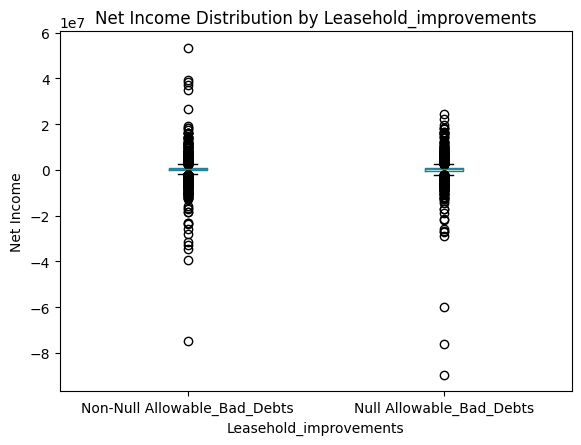

       Non-Null: Allowable_Bad_Debts  Null: Allowable_Bad_Debts
count                   1.091900e+04               3.786000e+03
mean                    3.240370e+05               1.613934e+05
std                     2.193008e+06               3.328683e+06
min                    -7.481245e+07              -8.971656e+07
25%                    -2.508335e+05              -3.498230e+05
50%                     3.175250e+05               1.737245e+05
75%                     9.224845e+05               8.258105e+05
max                     5.337325e+07               2.456536e+07
T-Test p-value: 0.0006695221649719312
Mann-Whitney U Test p-value: nan


In [415]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Allowable_Bad_Debts"] = df_selected["Allowable_Bad_Debts"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Allowable_Bad_Debts", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Allowable_Bad_Debts", "Null Allowable_Bad_Debts"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Allowable_Bad_Debts"].notnull()]
df_null = df20_cleaned[df20_cleaned["Allowable_Bad_Debts"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Allowable_Bad_Debts": df_non_null["Net_Income"].describe(),
    "Null: Allowable_Bad_Debts": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

In [416]:
df15['Allowable_Bad_Debts'] = np.nan
df16['Allowable_Bad_Debts'] = np.nan
df17['Allowable_Bad_Debts'] = np.nan
df18['Allowable_Bad_Debts'] = np.nan
df19['Allowable_Bad_Debts'] = np.nan

# SNF_bed_Days_Available

In [417]:
df15['SNF_bed_Days_Available'] = df15["SNF_bed_Days_Available"]
df16['SNF_bed_Days_Available'] = df16["SNF_bed_Days_Available"]
df17['SNF_bed_Days_Available'] = df17["SNF_bed_Days_Available"]
df18['SNF_bed_Days_Available'] = df18["SNF_bed_Days_Available"]
df19['SNF_bed_Days_Available'] = df19["SNF_bed_Days_Available"]

df15 = df15.drop(columns=["SNF_bed_Days_Available"])
df16 = df16.drop(columns=["SNF_bed_Days_Available"])
df17 = df17.drop(columns=["SNF_bed_Days_Available"])
df18 = df18.drop(columns=["SNF_bed_Days_Available"])
df19 = df19.drop(columns=["SNF_bed_Days_Available"])

# SNF_Average_Length_of_Stay_Title_XVIII

In [418]:
df15['SNF_Average_Length_of_Stay_Title_XVIII'] = df15["SNF_Average_Length_stay_XVIII"]
df16['SNF_Average_Length_of_Stay_Title_XVIII'] = df16["SNF_Average_Length_stay_XVIII"]
df17['SNF_Average_Length_of_Stay_Title_XVIII'] = df17["SNF_Average_Length_stay_XVIII"]
df18['SNF_Average_Length_of_Stay_Title_XVIII'] = df18["SNF_Average_Length_stay_XVIII"]
df19['SNF_Average_Length_of_Stay_Title_XVIII'] = df19["SNF_Average_Length_stay_XVIII"]

df15 = df15.drop(columns=["SNF_Average_Length_stay_XVIII"])
df16 = df16.drop(columns=["SNF_Average_Length_stay_XVIII"])
df17 = df17.drop(columns=["SNF_Average_Length_stay_XVIII"])
df18 = df18.drop(columns=["SNF_Average_Length_stay_XVIII"])
df19 = df19.drop(columns=["SNF_Average_Length_stay_XVIII"])

# Total_General_Inpatient_Care_Services_Revenue

In [419]:
df15['Total_General_Inpatient_Care_Services_Revenue'] = df15["Total_General_Inpatient_Revenue"]
df16['Total_General_Inpatient_Care_Services_Revenue'] = df16["Total_General_Inpatient_Revenue"]
df17['Total_General_Inpatient_Care_Services_Revenue'] = df17["Total_General_Inpatient_Revenue"]
df18['Total_General_Inpatient_Care_Services_Revenue'] = df18["Total_General_Inpatient_Revenue"]
df19['Total_General_Inpatient_Care_Services_Revenue'] = df19["Total_General_Inpatient_Revenue"]

df15 = df15.drop(columns=["Total_General_Inpatient_Revenue"])
df16 = df16.drop(columns=["Total_General_Inpatient_Revenue"])
df17 = df17.drop(columns=["Total_General_Inpatient_Revenue"])
df18 = df18.drop(columns=["Total_General_Inpatient_Revenue"])
df19 = df19.drop(columns=["Total_General_Inpatient_Revenue"])

# Total_Liabilities_and_fund_balances

In [420]:
df15['Total_Liabilities_and_fund_balances'] = df15["Total_Liab_and_fund_balances"]
df16['Total_Liabilities_and_fund_balances'] = df16["Total_Liab_and_fund_balances"]
df17['Total_Liabilities_and_fund_balances'] = df17["Total_Liab_and_fund_balances"]
df18['Total_Liabilities_and_fund_balances'] = df18["Total_Liab_and_fund_balances"]
df19['Total_Liabilities_and_fund_balances'] = df19["Total_Liab_and_fund_balances"]

df15 = df15.drop(columns=["Total_Liab_and_fund_balances"])
df16 = df16.drop(columns=["Total_Liab_and_fund_balances"])
df17 = df17.drop(columns=["Total_Liab_and_fund_balances"])
df18 = df18.drop(columns=["Total_Liab_and_fund_balances"])
df19 = df19.drop(columns=["Total_Liab_and_fund_balances"])

# SNF_Average_Length_of_Stay_Title_XIX

In [421]:
df15['SNF_Average_Length_of_Stay_Title_XIX'] = df15["SNF_Average_Length_stay_XIX"]
df16['SNF_Average_Length_of_Stay_Title_XIX'] = df16["SNF_Average_Length_stay_XIX"]
df17['SNF_Average_Length_of_Stay_Title_XIX'] = df17["SNF_Average_Length_stay_XIX"]
df18['SNF_Average_Length_of_Stay_Title_XIX'] = df18["SNF_Average_Length_stay_XIX"]
df19['SNF_Average_Length_of_Stay_Title_XIX'] = df19["SNF_Average_Length_stay_XIX"]

df15 = df15.drop(columns=["SNF_Average_Length_stay_XIX"])
df16 = df16.drop(columns=["SNF_Average_Length_stay_XIX"])
df17 = df17.drop(columns=["SNF_Average_Length_stay_XIX"])
df18 = df18.drop(columns=["SNF_Average_Length_stay_XIX"])
df19 = df19.drop(columns=["SNF_Average_Length_stay_XIX"])

# Other_current_assets

In [422]:
selected_columns = [
    "Other_current_assets", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Other_current_assets']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.035533273635992256
T-statistic: 163.38421061096497
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\2615514057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Other_current_assets"] = df_selected["Other_current_assets"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

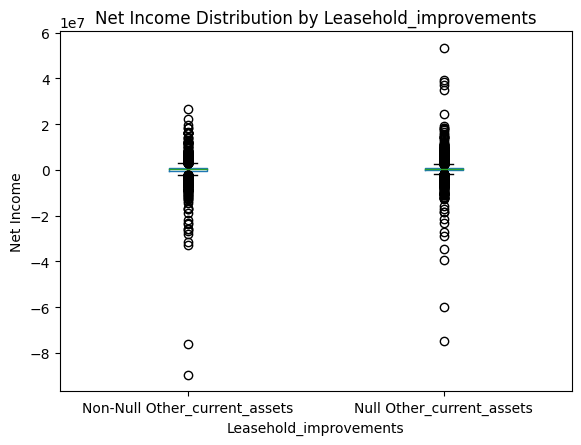

       Non-Null: Other_current_assets  Null: Other_current_assets
count                    4.479000e+03                1.022600e+04
mean                     2.788673e+05                2.836054e+05
std                      3.072371e+06                2.260545e+06
min                     -8.971656e+07               -7.481245e+07
25%                     -2.929480e+05               -2.672508e+05
50%                      2.874540e+05                2.752360e+05
75%                      9.540395e+05                8.816072e+05
max                      2.672461e+07                5.337325e+07
T-Test p-value: 0.9169385507951004
Mann-Whitney U Test p-value: nan


In [423]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Other_current_assets"] = df_selected["Other_current_assets"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Other_current_assets", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Other_current_assets", "Null Other_current_assets"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Other_current_assets"].notnull()]
df_null = df20_cleaned[df20_cleaned["Other_current_assets"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Other_current_assets": df_non_null["Net_Income"].describe(),
    "Null: Other_current_assets": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

I will keep it in the master merge set for now but will probably take it out later bc it is similar to Current_Assets

In [424]:
df15['Other_current_assets'] = np.nan
df16['Other_current_assets'] = np.nan
df17['Other_current_assets'] = np.nan
df18['Other_current_assets'] = np.nan
df19['Other_current_assets'] = np.nan

# Total_Current_Assets

In [425]:
df15['Total_Current_Assets'] = df15["Total_current_assets"]
df16['Total_Current_Assets'] = df16["Total_current_assets"]
df17['Total_Current_Assets'] = df17["Total_current_assets"]
df18['Total_Current_Assets'] = df18["Total_current_assets"]
df19['Total_Current_Assets'] = df19["Total_current_assets"]

df15 = df15.drop(columns=["Total_current_assets"])
df16 = df16.drop(columns=["Total_current_assets"])
df17 = df17.drop(columns=["Total_current_assets"])
df18 = df18.drop(columns=["Total_current_assets"])
df19 = df19.drop(columns=["Total_current_assets"])

# Less_discounts_on_patients

In [426]:
df20_cleaned['Less_discounts_on_patients'] = df20_cleaned["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"]
df21_cleaned['Less_discounts_on_patients'] = df21_cleaned["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"]

df20_cleaned = df20_cleaned.drop(columns=["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"])
df21_cleaned = df21_cleaned.drop(columns=["Less_Contractual_Allowance_and_discounts_on_patients'_accounts"])


# Total_Other_Income

In [427]:
df20_cleaned.sample(4)

rpt_rec_num  Provider_CCN                    Facility_Name  \
13697      1341762        395491            PLEASANT VALLEY MANOR   
4878       1302936        366155                       NEW ALBANY   
4276       1302057        365673         WOODVIEW NURSING & REHAB   
13798      1341936        395217  RICHBORO REHAB & NURSING CENTER   

           Street_Address         City State_Code Zip_Code    County  \
13697    4227 MANOR DRIVE  STROUDSBURG         PA    18360    MONROE   
4878   5691 THOMPSON ROAD   NEW ALBANY         OH    43230  FRANKLIN   
4276      2770 CLIME ROAD     COLUMBUS         OH    43223  FRANKLIN   
13798    253 TWINING ROAD     RICHBORO         PA    18954     BUCKS   

       Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
13697               20700.0                  U             01/01/2020   
4878                18140.0                  U             01/01/2020   
4276                18140.0                  U             03/01/2020   
13798               33874.0                  U             01/01/2020   

      Fiscal_Year_End_Date  Type_of_Control  Total_Days_Title_XVIII  \
13697           12/31/2020              9.0                  5443.0   
4878            12/31/2020              6.0                  6754.0   
4276            12/31/2020              5.0                   498.0   
13798           12/31/2020              5.0                  5083.0   

       Total_Days_Title_XIX  Total_Days_Other  Total_Days_Total  \
13697               29911.0            4831.0           40185.0   
4878                 2876.0           10020.0           19650.0   
4276                15642.0            2726.0           18866.0   
13798               16532.0            3088.0           24703.0   

       Number_of_Beds  Total_Bed_Days_Available  Total_Discharges_Title_XVIII  \
13697           174.0                   63684.0                          99.0   
4878             67.0                   24522.0                         277.0   
4276             95.0                   29070.0                          23.0   
13798            82.0                   30012.0                         111.0   

       Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
13697                        59.0                          60.0   
4878                          3.0                         272.0   
4276                         78.0                          74.0   
13798                        83.0                          94.0   

       Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_XVIII  \
13697                   218.0                                   54.98   
4878                    552.0                                   24.38   
4276                    175.0                                   21.65   
13798                   288.0                                   45.79   

       SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
13697                                506.97                            184.33   
4878                                 958.67                             35.60   
4276                                 200.54                            107.81   
13798                                199.18                             85.77   

       SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  \
13697                        78.0                      12.0   
4878                        267.0                      18.0   
4276                         32.0                      65.0   
13798                       154.0                      38.0   

       SNF_Admissions_Other  SNF_Admissions_Total  SNF_Days_Title_XVIII  \
13697                  59.0                 149.0                5443.0   
4878                  274.0                 559.0                6754.0   
4276                   73.0                 170.0                 498.0   
13798                  98.0                 290.0                5083.0   

       SNF_Days_Title_XIX  SNF_Days_

There are a lot of negative Total_Income while Total_Other_Income is positive

In [428]:
selected_columns = [
    "Net_Income_from_service_to_patients",
    "Total_Other_Income", 
    "Net_Patient_Revenue", 
    "Total_Income",
    "Gross_Revenue",
    "Inpatient_Revenue",
    "Accounts_Receivable",
    "Net_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected.sample(10)

Net_Income_from_service_to_patients  Total_Other_Income  \
7734                             -713914.0            654264.0   
12397                            -697646.0            196100.0   
13417                           -3544704.0           1189568.0   
14477                           -3926108.0           2854274.0   
7045                             -646445.0            947608.0   
13364                             478272.0            894031.0   
7737                             -754519.0            622930.0   
13145                           -1743292.0           2431959.0   
7504                            -1856211.0           1071010.0   
1590                             -705688.0            760721.0   

       Net_Patient_Revenue  Total_Income  Gross_Revenue  Inpatient_Revenue  \
7734            15974097.0      -59650.0     21557263.0         21557263.0   
12397            9033848.0     -501546.0     15646401.0         15646401.0   
13417           15742820.0    -2355136.0     24962132.0         24962132.0   
14477            8029039.0    -1071834.0     15317582.0         15317582.0   
7045             4812250.0      301163.0      5492039.0          5492039.0   
13364           11469032.0     1372303.0     24466099.0         24466099.0   
7737             5531566.0     -131589.0      5981896.0          5981896.0   
13145           15822949.0      688667.0     16864854.0         16864854.0   
7504            11814066.0     -785201.0     15514360.0         15514360.0   
1590             3506158.0       55033.0      4257077.0          4257077.0   

       Accounts_Receivable  Net_Income  
7734             2005533.0    -59650.0  
12397            1391217.0   -501546.0  
13417             940311.0  -2355353.0  
14477            1584403.0  -1071834.0  
7045              246675.0    163646.0  
13364            1537211.0   1372303.0  
7737              149392.0   -131589.0  
13145            -268686.0    688667.0  
7504             2531723.0   -785201.0  
1590              242387.0     55033.0

In [429]:
df_selected.corr()

Net_Income_from_service_to_patients  \
Net_Income_from_service_to_patients                             1.000000   
Total_Other_Income                                             -0.298776   
Net_Patient_Revenue                                            -0.167442   
Total_Income                                                    0.091161   
Gross_Revenue                                                  -0.121645   
Inpatient_Revenue                                              -0.115527   
Accounts_Receivable                                            -0.035997   
Net_Income                                                      0.313121   

                                     Total_Other_Income  Net_Patient_Revenue  \
Net_Income_from_service_to_patients           -0.298776            -0.167442   
Total_Other_Income                             1.000000             0.137343   
Net_Patient_Revenue                            0.137343             1.000000   
Total_Income                                   0.924140             0.075926   
Gross_Revenue                                  0.095599             0.804152   
Inpatient_Revenue                              0.092814             0.798210   
Accounts_Receivable                            0.249478             0.166768   
Net_Income                                    -0.106226             0.109122   

                                     Total_Income  Gross_Revenue  \
Net_Income_from_service_to_patients      0.091161      -0.121645   
Total_Other_Income                       0.924140       0.095599   
Net_Patient_Revenue                      0.075926       0.804152   
Total_Income                             1.000000       0.051274   
Gross_Revenue                            0.051274       1.000000   
Inpatient_Revenue                        0.050844       0.998074   
Accounts_Receivable                      0.196793       0.224702   
Net_Income                               0.016990       0.104926   

                                     Inpatient_Revenue  Accounts_Receivable  \
Net_Income_from_service_to_patients          -0.115527            -0.035997   
Total_Other_Income                            0.092814             0.249478   
Net_Patient_Revenue                           0.798210             0.166768   
Total_Income                                  0.050844             0.196793   
Gross_Revenue                                 0.998074             0.224702   
Inpatient_Revenue                             1.000000             0.224510   
Accounts_Receivable                           0.224510             1.000000   
Net_Income                                    0.103901            -0.011847   

                                     Net_Income  
Net_Income_from_service_to_patients    0.313121  
Total_Other_Income                    -0.106226  
Net_Patient_Revenue                    0.109122  
Total_Income                           0.016990  
Gross_Revenue                          0.104926  
Inpatient_Revenue                      0.103901  
Accounts_Receivable                   -0.011847  
Net_Income                             1.000000

Total_Other_Income = Total_Income - Net_Income_from_service_to_patients

In [430]:
# Assuming df19 is already loaded as a DataFrame
# Ensure required columns exist
df19["Total_Other_Income"] = df19["Total_Income"] - df19["Net_Income_from_service_to_patients"]

# Display the updated DataFrame
df19[["Total_Income", "Net_Income_from_service_to_patients", "Total_Other_Income"]].head(10)

Total_Income  Net_Income_from_service_to_patients  Total_Other_Income
0           NaN                                  NaN                 NaN
1       17284.0                              17284.0                 0.0
2    -1141609.0                           -1146519.0              4910.0
3           NaN                                  NaN                 NaN
4       71251.0                              71101.0               150.0
5     -654846.0                            -655194.0               348.0
6     -181890.0                            -184908.0              3018.0
7      -43295.0                             -45159.0              1864.0
8      169936.0                             166305.0              3631.0
9     -648964.0                            -648964.0                 0.0

In [431]:
selected_columns = [
    "Total_Other_Income", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Total_Other_Income']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.0491208494701573
T-statistic: 2835.212663913773
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\1167367152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Total_Other_Income"] = df_selected["Total_Other_Income"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

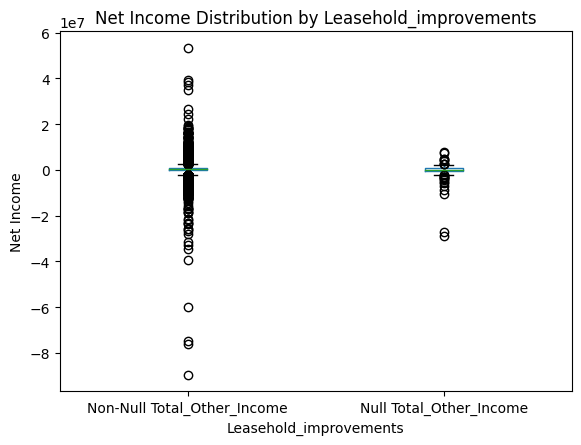

       Non-Null: Total_Other_Income  Null: Total_Other_Income
count                  1.445200e+04              2.530000e+02
mean                   2.914528e+05             -2.485410e+05
std                    2.524914e+06              3.034219e+06
min                   -8.971656e+07             -2.906434e+07
25%                   -2.705815e+05             -5.095060e+05
50%                    2.833965e+05              2.735100e+04
75%                    9.103215e+05              6.085490e+05
max                    5.337325e+07              7.816630e+06
T-Test p-value: 0.0007825448086819679
Mann-Whitney U Test p-value: nan


In [432]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Total_Other_Income"] = df_selected["Total_Other_Income"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Total_Other_Income", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Total_Other_Income", "Null Total_Other_Income"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Total_Other_Income"].notnull()]
df_null = df20_cleaned[df20_cleaned["Total_Other_Income"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Total_Other_Income": df_non_null["Net_Income"].describe(),
    "Null: Total_Other_Income": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

I will use the formula on the rest of the datasets.

In [433]:
df18["Total_Other_Income"] = df18["Total_Income"] - df18["Net_Income_from_service_to_patients"]
df17["Total_Other_Income"] = df17["Total_Income"] - df17["Net_Income_from_service_to_patients"]
df16["Total_Other_Income"] = df16["Total_Income"] - df16["Net_Income_from_service_to_patients"]
df15["Total_Other_Income"] = df15["Total_Income"] - df15["Net_Income_from_service_to_patients"]

# SNF_Bed_Days_Available

In [434]:
df19

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1226920        525009  CROSSROADS CARE CENTER OF EAST GREEN   
1          1228236         45228                      MAPLE HEALTHCARE   
2          1230331        435123          GOOD SAMARITAN SOCIETY-SELBY   
3          1232670        525232            CCC OF WEST GREEN BAY  LLC   
4          1235138         35270    LA ESTANCIA NURSING & REHAB CENTER   
...            ...           ...                                   ...   
15177      1347594        395628        RENAISSANCE HEALTHCARE & REHAB   
15178      1350728        396122     FOX SUBACUTE CTR AT MECHANICSBURG   
15179      1352460        396141    FOX SUBACUTE AT SOUTH PHILADELPHIA   
15180      1356468        345205    WESTWOOD HILLS NURSING & REHAB CTR   
15181      1364900        375567               MEMORIAL NURSING CENTER   

                 Street_Address           City State_Code    Zip_Code  \
0          600 S WEBSTER AVENUE      GREEN BAY         WI       54301   
1            200 S MAPLE STREET          HAZEN         AR       72064   
2              4861 LINCOLN AVE          SELBY         SD  57472-0299   
3           1760 SHAWANO AVENUE      GREEN BAY         WI       54303   
4       15810 SOUTH 42ND STREET        PHOENIX         AZ       85048   
...                         ...            ...        ...         ...   
15177          4712 CHESTER AVE   PHILADELPHIA         PA       19072   
15178  120 SOUTH FILBERT STREET  MECHANICSBURG         PA       17055   
15179   1930 SOUTH BROAD STREET   PHILADELPHIA         PA       19145   
15180      1016 FLETCHER STREET     WILKESBORO         NC       28697   
15181        319 EAST JOSEPHINE      FREDERICK         OK       73542   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0             BROWN                   NaN                NaN   
1           PRAIRIE               99904.0                  R   
2          WALWORHT               99943.0                  R   
3             BROWN                   NaN                NaN   
4          MARICOPA               38060.0                  U   
...             ...                   ...                ...   
15177  PHILADELPHIA               37964.0                  U   
15178    CUMBERLAND               25420.0                  U   
15179  PHILADELPHIA               37964.0                  U   
15180        WILKES               99934.0                  R   
15181       TILLMAN               99937.0                  R   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                        NaN                  NaN                4   
1                  11/1/2018           12/31/2018                4   
2                  10/1/2018           11/30/2018                4   
3                        NaN                  NaN                4   
4                  11/1/2018           12/31/2018                4   
...                      ...                  ...              ...   
15177               7/1/2019            6/30/2020                4   
15178               7/1/2019            6/30/2020                4   
15179               1/1/2019           12/31/2019                4   
15180              10/1/2018            9/30/2019                4   
15181               7/1/2019            6/30/2020                4   

       Accounts_Receivable  Accounts_payable  Buildings  \
0                      NaN               NaN        NaN   
1                 138970.0            7613.0        NaN   
2                 320167.0          151920.0     2528.0   
3                      NaN               NaN        NaN   
4                1265667.0          222514.0  4242811.0   
...                    ...               ...        ...   
15177            -325256.0         1529461.0        NaN   
15178            4496967.0          311411.0   128302.0   
15179            3915965.0         1999253.0        NaN   
15180            1960581.0           8715

In [435]:
df20_cleaned

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1254744         75031                      GLEN HILL CENTER   
1          1255877        495268         MARY WASHINGTON HEALTH CENTER   
2          1256270        295107      ADVANCED HEALTH CARE OF PARADISE   
3          1259169        146097            EL PASO HEALTH CARE CENTER   
4          1259189        215136  BIRCH MANOR CTR FOR REHAB & HEALTHCA   
...            ...           ...                                   ...   
14944      1363186        105382  SANDGATE GARDENS REHAB AND NURSING C   
14945      1363595        145970             THE VILLA AT WINDSOR PARK   
14946      1364413        375567               MEMORIAL NURSING CENTER   
14947      1364622        415071   SOUTH COUNTY NURSING & REHAB CENTER   
14948      1365542         56261   MERRITT MANOR CONVALESCENT HOSPITAL   

                       Street_Address             City State_Code Zip_Code  \
0                    1 GLEN HILL ROAD          DANBURY         CT    06811   
1                  2400 MCKINNEY BLVD   COLONIAL BEACH         VA    22443   
2      3455 PECOS-MCLEOD INTERCONNECT        LAS VEGAS         NV    89121   
3              850 EAST SECOND STREET          EL PASO         IL    61738   
4                     7309 SECOND AVE       SYKESVILLE         MD    21784   
...                               ...              ...        ...      ...   
14944           703 SOUTH 29TH STREET      FORT PIERCE         FL    34947   
14945           2649 EAST 75TH STREET          CHICAGO         IL    60649   
14946              319 EAST JOSEPHINE        FREDERICK         OK    73542   
14947               740 OAK HILL ROAD  NORTH KINGSTOWN         RI    02852   
14948         604 EAST MERRITT AVENUE           TULARE         CA    93274   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0         FAIRFIELD               14860.0                  U   
1      WESTMORELAND               99949.0                  R   
2             CLARK               29820.0                  U   
3          WOODFORD               37900.0                  U   
4           CARROLL               12580.0                  U   
...             ...                   ...                ...   
14944     ST. LUCIE               38940.0                  U   
14945          COOK               16974.0                  U   
14946       TILLMAN               99937.0                  R   
14947    WASHINGTON               39300.0                  U   
14948        TULARE               47300.0                  U   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                 10/01/2019           10/31/2019              6.0   
1                 11/01/2019           12/29/2019              4.0   
2                 10/04/2019           12/31/2019              4.0   
3                 10/31/2019           12/31/2019              4.0   
4                 11/01/2019           12/31/2019              4.0   
...                      ...                  ...              ...   
14944             01/01/2020           12/31/2020              4.0   
14945             01/01/2020           12/31/2020              6.0   
14946             07/01/2020           06/30/2021              8.0   
14947             07/01/2020           12/31/2020              6.0   
14948             01/01/2020           12/31/2020              6.0   

       Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
0                       735.0                1648.0             538.0   
1                       341.0                 260.0            2803.0   
2                      1381.0                   NaN             846.0   
3                       131.0                3853.0            1441.0   
4                       539.0                4957.0             378.0   
...                       ...                   ...               ...   
14944                  8319.0               18121.0         

In [436]:

# Selecting specific columns from df20_cleaned
selected_columns = [
    "SNF_Admissions_Title_XVIII", "SNF_Admissions_Title_XIX", "SNF_Admissions_Other", "SNF_Admissions_Total",
    "SNF_Days_Title_XVIII", "SNF_Days_Title_XIX", "SNF_Days_Other", "SNF_Days_Total",
    "SNF_Number_of_Beds", "SNF_Bed_Days_Available", "SNF_Discharges_Title_XVIII", "SNF_Discharges_Title_XIX",
    "SNF_Discharges_Title_Other", "SNF_Discharges_Total"
]
df_selected = df20_cleaned[selected_columns]

# Display the new dataset
df_selected.head()

SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  SNF_Admissions_Other  \
0                        27.0                       2.0                  29.0   
1                        16.0                       9.0                   4.0   
2                       133.0                       NaN                   5.0   
3                         3.0                       6.0                   1.0   
4                        17.0                       4.0                   5.0   

   SNF_Admissions_Total  SNF_Days_Title_XVIII  SNF_Days_Title_XIX  \
0                  58.0                 735.0              1648.0   
1                  29.0                 341.0               260.0   
2                 138.0                1381.0                 NaN   
3                  10.0                 131.0              3853.0   
4                  26.0                 539.0              4957.0   

   SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  SNF_Bed_Days_Available  \
0           538.0          2921.0               100.0                  3100.0   
1          2803.0          3404.0                66.0                  3894.0   
2           846.0          2227.0                38.0                  3382.0   
3          1441.0          5425.0               123.0                  7749.0   
4           378.0          5874.0               118.0                  7198.0   

   SNF_Discharges_Title_XVIII  SNF_Discharges_Title_XIX  \
0                        24.0                       8.0   
1                        11.0                       8.0   
2                        47.0                       NaN   
3                         3.0                      14.0   
4                        11.0                      10.0   

   SNF_Discharges_Title_Other  SNF_Discharges_Total  
0                        25.0                  57.0  
1                         7.0                  26.0  
2                         4.0                  51.0  
3                         1.0                  18.0  
4                         9.0                  30.0

In [437]:
# Function to calculate SNF_Bed_Days_Available
def calculate_snf_bed_days_available(df, reporting_period_days=365):
    df["SNF_Bed_Days_Available1"] = df["SNF_Number_of_Beds"] * reporting_period_days
    return df

# Apply the function to df_selected
df_selected = calculate_snf_bed_days_available(df_selected)

# Display the updated dataset
df_selected.head()

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\2584304885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SNF_Bed_Days_Available1"] = df["SNF_Number_of_Beds"] * reporting_period_days


SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  SNF_Admissions_Other  \
0                        27.0                       2.0                  29.0   
1                        16.0                       9.0                   4.0   
2                       133.0                       NaN                   5.0   
3                         3.0                       6.0                   1.0   
4                        17.0                       4.0                   5.0   

   SNF_Admissions_Total  SNF_Days_Title_XVIII  SNF_Days_Title_XIX  \
0                  58.0                 735.0              1648.0   
1                  29.0                 341.0               260.0   
2                 138.0                1381.0                 NaN   
3                  10.0                 131.0              3853.0   
4                  26.0                 539.0              4957.0   

   SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  SNF_Bed_Days_Available  \
0           538.0          2921.0               100.0                  3100.0   
1          2803.0          3404.0                66.0                  3894.0   
2           846.0          2227.0                38.0                  3382.0   
3          1441.0          5425.0               123.0                  7749.0   
4           378.0          5874.0               118.0                  7198.0   

   SNF_Discharges_Title_XVIII  SNF_Discharges_Title_XIX  \
0                        24.0                       8.0   
1                        11.0                       8.0   
2                        47.0                       NaN   
3                         3.0                      14.0   
4                        11.0                      10.0   

   SNF_Discharges_Title_Other  SNF_Discharges_Total  SNF_Bed_Days_Available1  
0                        25.0                  57.0                  36500.0  
1                         7.0                  26.0                  24090.0  
2                         4.0                  51.0                  13870.0  
3                         1.0                  18.0                  44895.0  
4                         9.0                  30.0                  43070.0

There is no way to calculate it. 

In [438]:
selected_columns = [
    "SNF_Bed_Days_Available", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['SNF_Bed_Days_Available']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for SNF_Bed_Days_Available: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: SNF_Bed_Days_Available is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: SNF_Bed_Days_Available is not significant in predicting Net_Income.")


Coefficient (Slope) for SNF_Bed_Days_Available: 0.8885938795731375
T-statistic: 285.225642587645
P-value: 0.0
Reject the null hypothesis: SNF_Bed_Days_Available is significant in predicting Net_Income.


It is clear that this is important so I will bring it to the master dataset. Maybe it is universal to each year. 

In [439]:
fit = df20_cleaned[df20_cleaned['Provider_CCN'] == 75031]
fit
#scroll to SNF_Bed_Days_Available

rpt_rec_num  Provider_CCN     Facility_Name    Street_Address     City  \
0         1254744         75031  GLEN HILL CENTER  1 GLEN HILL ROAD  DANBURY   
158       1273998         75031  GLEN HILL CENTER  1 GLEN HILL ROAD  DANBURY   
2208      1291896         75031  GLEN HILL CENTER  1 GLEN HILL ROAD  DANBURY   

     State_Code Zip_Code     County  Medicare_CBSA_Number Rural_versus_Urban  \
0            CT    06811  FAIRFIELD               14860.0                  U   
158          CT    06811  FAIRFIELD               14860.0                  U   
2208         CT    06811  FAIRFIELD               14860.0                  U   

     Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                10/01/2019           10/31/2019              6.0   
158              11/01/2019           12/31/2019              6.0   
2208             01/01/2020           12/31/2020              6.0   

      Total_Days_Title_XVIII  Total_Days_Title_XIX  Total_Days_Other  \
0                      735.0                1648.0             538.0   
158                   1286.0                3501.0            1140.0   
2208                  6641.0               18301.0            4717.0   

      Total_Days_Total  Number_of_Beds  Total_Bed_Days_Available  \
0               2921.0           100.0                    3100.0   
158             5927.0           100.0                    6100.0   
2208           29659.0           100.0                   36600.0   

      Total_Discharges_Title_XVIII  Total_Discharges_Title_XIX  \
0                             24.0                         8.0   
158                           40.0                         6.0   
2208                         190.0                        47.0   

      Total_Discharges_Title_Other  Total_Discharges_Total  \
0                             25.0                    57.0   
158                           32.0                    78.0   
2208                         108.0                   345.0   

      SNF_Average_Length_of_Stay_Title_XVIII  \
0                                      30.63   
158                                    32.15   
2208                                   34.95   

      SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
0                                   206.00                             51.25   
158                                 583.50                             75.99   
2208                                389.38                             85.97   

      SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  \
0                           27.0                       2.0   
158                         43.0                       1.0   
2208                       212.0                      18.0   

      SNF_Admissions_Other  SNF_Admissions_Total  SNF_Days_Title_XVIII  \
0                     29.0                  58.0                 735.0   
158                   30.0                  74.0                1286.0   
2208                 100.0                 330.0                6641.0   

      SNF_Days_Title_XIX  SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  \
0                 1648.0           538.0          2921.0               100.0   
158               3501.0          1140.0          5927.0               100.0   
2208             18301.0          4717.0         29659.0               100.0   

      SNF_Bed_Days_Available  SNF_Discharges_Title_XVIII  \
0                     3100.0                        24.0   
158                   6100.0                        40.0   
2208                 36600.0                       190.0   

      SNF_Discharges_Title_XIX  SNF_Discharges_Title_Other  \
0                          8.0                        25.0   
158                        6.0                        32.0   
2208                      47.0                       108.0   

      SNF_Discharges_Total  Total_RUG_Days  Total_Salaries_From_Worksheet_A  \
0                     57.0             NaN                   

In [440]:
fit = df21_cleaned[df21_cleaned['Provider_CCN'] == 75031]
fit

rpt_rec_num  Provider_CCN     Facility_Name      Street_Address  \
5016      1329764         75031  GLEN HILL CENTER  ONE GLEN HILL ROAD   

         City State_Code Zip_Code     County  Medicare_CBSA_Number  \
5016  DANBURY         CT    06811  FAIRFIELD               14860.0   

     Rural_versus_Urban Fiscal_Year_Begin_Date Fiscal_Year_End_Date  \
5016                  U             01/01/2021           12/31/2021   

      Type_of_Control  Total_Days_Title_XVIII  Total_Days_Title_XIX  \
5016              4.0                  7188.0               18188.0   

      Total_Days_Other  Total_Days_Total  Number_of_Beds  \
5016            6282.0           31658.0           100.0   

      Total_Bed_Days_Available  Total_Discharges_Title_XVIII  \
5016                   36500.0                         200.0   

      Total_Discharges_Title_XIX  Total_Discharges_Title_Other  \
5016                        49.0                         191.0   

      Total_Discharges_Total  SNF_Average_Length_of_Stay_Title_XVIII  \
5016                   440.0                                   35.94   

      SNF_Average_Length_of_Stay_Title_XIX  SNF_Average_Length_of_Stay_Total  \
5016                                371.18                             71.95   

      SNF_Admissions_Title_XVIII  SNF_Admissions_Title_XIX  \
5016                       237.0                      19.0   

      SNF_Admissions_Other  SNF_Admissions_Total  SNF_Days_Title_XVIII  \
5016                 189.0                 445.0                7188.0   

      SNF_Days_Title_XIX  SNF_Days_Other  SNF_Days_Total  SNF_Number_of_Beds  \
5016             18188.0          6282.0         31658.0               100.0   

      SNF_Bed_Days_Available  SNF_Discharges_Title_XVIII  \
5016                 36500.0                       200.0   

      SNF_Discharges_Title_XIX  SNF_Discharges_Title_Other  \
5016                      49.0                       191.0   

      SNF_Discharges_Total  Total_RUG_Days  Total_Salaries_From_Worksheet_A  \
5016                 440.0             NaN                        4568673.0   

      Total_Charges  Total_Costs  Wage-related_Costs_(core)  \
5016      3061928.0    2088794.0                   722649.0   

      Total_Salaries_(adjusted)  Contract_Labor  Cash_on_hand_and_in_banks  \
5016                  4568673.0       2283497.0                     9426.0   

      Accounts_Receivable  \
5016            1504996.0   

      Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
5016                                           260143.0                  

      Inventory  Prepaid_expenses  Other_current_assets  Total_Current_Assets  \
5016    39531.0          186754.0                   NaN             1485186.0   

      Land  Land_improvements  Buildings  Leasehold_improvements  \
5016   NaN             2856.0        NaN                 12581.0   

      Fixed_equipment  Major_movable_equipment  Total_fixed_Assets  \
5016           7274.0                 153424.0            963030.0   

      Investments  Other_Assets  Total_other_Assets  Total_Assets  \
5016          NaN     7278619.0          12427519.0    14875735.0   

      Accounts_payable  Payroll_taxes_payable  \
5016          608085.0                    NaN   

      Notes_and_Loans_Payable_(short_term)  Other_current_liabilities  \
5016                                   NaN                  1165987.0   

      Total_current_liabilities  Mortgage_payable  Notes_Payable  \
5016                  1779514.0         7585332.0            NaN   

      Other_long_term_liabilities  Total_long_term_liabilities  \
5016                          NaN                   12570277.0   

      Total_liabilities  General_fund_balance  Total_fund_balances  \
5016         14349791.0              525944.0             525944.0   

      Total_Liabilities_and_fund_balances  \
5016                           14875735.0   

      Total_General_Inpatient_Care_Services_Revenue  Inpatient_Revenue  \
5016     

It seems to mostly be universal with a slight change. There are some issues with the months and years which will be addressed in cleaning. For now I will add empty cells for the append. Later I will find a way to add the bed days available to df15-df19.

In [441]:
df15['SNF_Bed_Days_Available'] = np.nan
df16['SNF_Bed_Days_Available'] = np.nan
df17['SNF_Bed_Days_Available'] = np.nan
df18['SNF_Bed_Days_Available'] = np.nan
df19['SNF_Bed_Days_Available'] = np.nan

# Leasehold_improvements

In [442]:
leasehold_columns = [
    "Provider_CCN", "Facility_Name", "Street_Address", "City", "State_Code", "Zip_Code", "County",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements", "Fixed_equipment", "Major_movable_equipment",
    "Total_fixed_Assets", "Investments", "Other_Assets", "Total_other_Assets", "Total_Assets", "Fiscal_Year_Begin_Date",	"Fiscal_Year_End_Date"
]
df_leasehold = df20_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 146097]
df_l

Provider_CCN               Facility_Name          Street_Address  \
3           146097  EL PASO HEALTH CARE CENTER  850 EAST SECOND STREET   
5249        146097  EL PASO HEALTH CARE CENTER  850 EAST SECOND STREET   

         City State_Code Zip_Code    County     Land  Land_improvements  \
3     EL PASO         IL    61738  WOODFORD  64278.0                NaN   
5249  EL PASO         IL    61738  WOODFORD      NaN                NaN   

      Buildings  Leasehold_improvements  Fixed_equipment  \
3      934850.0                123823.0              NaN   
5249        NaN                     NaN              NaN   

      Major_movable_equipment  Total_fixed_Assets  Investments  Other_Assets  \
3                    341266.0            484549.0          NaN      150875.0   
5249                   5062.0             40005.0          NaN           NaN   

      Total_other_Assets  Total_Assets Fiscal_Year_Begin_Date  \
3               350041.0     3176256.0             10/31/2019   
5249           2803505.0     4137464.0             01/01/2020   

     Fiscal_Year_End_Date  
3              12/31/2019  
5249           12/31/2020

In [443]:
df_leasehold = df21_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 146097]
df_l

Provider_CCN               Facility_Name          Street_Address  \
11796        146097  EL PASO HEALTH CARE CENTER  850 EAST SECOND STREET   

          City State_Code Zip_Code    County  Land  Land_improvements  \
11796  EL PASO         IL    61738  WOODFORD   NaN                NaN   

       Buildings  Leasehold_improvements  Fixed_equipment  \
11796        NaN                 25201.0              NaN   

       Major_movable_equipment  Total_fixed_Assets  Investments  Other_Assets  \
11796                  15737.0             66645.0          NaN           NaN   

       Total_other_Assets  Total_Assets Fiscal_Year_Begin_Date  \
11796           4138886.0     4943423.0             01/01/2021   

      Fiscal_Year_End_Date  
11796           12/31/2021

# Leasehold_improvements

Make a column that is binary and its either they own land or lease. 

There are no similar columns in df15-19. If I can get it there it will be important for knowing what lease improvements do longterm. 

In [444]:
leasehold_columns = [
    "Provider_CCN", "Cash_on_hand_and_in_banks",	"Other_current_assets", "Accounts_Receivable",	"Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements", "Fixed_equipment", "Major_movable_equipment",
    "Total_fixed_Assets", "Investments", "Other_Assets", "Total_other_Assets","Inventory", "Total_Current_Assets", "Total_Assets", "Fiscal_Year_Begin_Date",	"Fiscal_Year_End_Date"
]
df_leasehold = df20_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 75031]
df_l

Provider_CCN  Cash_on_hand_and_in_banks  Other_current_assets  \
0            75031                    15647.0                   NaN   
158          75031                    29579.0                   NaN   
2208         75031                    50199.0                   NaN   

      Accounts_Receivable  \
0               1223466.0   
158             1126809.0   
2208            1379322.0   

      Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  Land  \
0                                              135613.0                  NaN   
158                                            130476.0                  NaN   
2208                                           206045.0                  NaN   

      Land_improvements  Buildings  Leasehold_improvements  Fixed_equipment  \
0                 518.0        NaN                 10688.0           3374.0   
158               518.0        NaN                 11327.0           3374.0   
2208             2856.0        NaN                  5211.0           3374.0   

      Major_movable_equipment  Total_fixed_Assets  Investments  Other_Assets  \
0                     17985.0             35976.0          NaN    13080009.0   
158                   17826.0             34151.0          NaN    13410592.0   
2208                 134808.0            134784.0          NaN    13456674.0   

      Total_other_Assets  Inventory  Total_Current_Assets  Total_Assets  \
0             13080009.0    65289.0             1284327.0    14400312.0   
158           13410592.0    65289.0             1338130.0    14782873.0   
2208          14039803.0    65163.0             1636990.0    15811577.0   

     Fiscal_Year_Begin_Date Fiscal_Year_End_Date  
0                10/01/2019           10/31/2019  
158              11/01/2019           12/31/2019  
2208             01/01/2020           12/31/2020

In [445]:
df_leasehold = df21_cleaned[leasehold_columns]

# Display the leasehold dataset
df_l = df_leasehold[df_leasehold['Provider_CCN'] == 75031]
df_l

Provider_CCN  Cash_on_hand_and_in_banks  Other_current_assets  \
5016         75031                     9426.0                   NaN   

      Accounts_Receivable  \
5016            1504996.0   

      Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  Land  \
5016                                           260143.0                  NaN   

      Land_improvements  Buildings  Leasehold_improvements  Fixed_equipment  \
5016             2856.0        NaN                 12581.0           7274.0   

      Major_movable_equipment  Total_fixed_Assets  Investments  Other_Assets  \
5016                 153424.0            963030.0          NaN     7278619.0   

      Total_other_Assets  Inventory  Total_Current_Assets  Total_Assets  \
5016          12427519.0    39531.0             1485186.0    14875735.0   

     Fiscal_Year_Begin_Date Fiscal_Year_End_Date  
5016             01/01/2021           12/31/2021

Leasehold Improvements & No Land/Buildings

Land = NaN, Buildings = NaN, Leasehold Improvements = 12,581.0 → Suggests the facility is leased, which aligns with Leasehold Improvements.
If they lease the facility, they wouldn't own land or buildings, so those would be missing.
Accounts Receivable & Allowances for Uncollectibles

Accounts Receivable = 1,504,996.0
Less: Allowances for Uncollectibles = 260,143.0 → Looks reasonable, as a percentage (~17% of receivables).
Total Fixed Assets Calculation

Fixed Equipment: 7,274.0
Major Movable Equipment: 153,424.0
Leasehold Improvements: 12,581.0
Total Fixed Assets: 963,030.0 → Mismatch! Something else is included in Fixed Assets, or a value is missing.
Total Current Assets Seems Reasonable

Cash on Hand = 9,426.0
Inventory = 39,531.0
Total Current Assets = 1,485,186.0 → Matches sum of smaller components, assuming Other Current Assets = NaN.
⚠️ What Looks Off or Needs Confirmation
Total Fixed Assets Mismatch

The sum of Leasehold Improvements + Fixed Equipment + Major Movable Equipment is 173,279.0, but Total Fixed Assets is 963,030.0.
Missing items? Are there additional capitalized lease obligations included?
Other Assets & Total Other Assets are Very High

Other Assets = 7,278,619.0
Total Other Assets = 12,427,519.0
This means there are $5.1M in unexplained "Other Assets" → could be long-term investments, deferred assets, goodwill, or intangibles.
Investments = NaN, which is strange because Total Other Assets is high.
Total Assets Check

Total Assets = 14,875,735.0
Confirmed:
Total Fixed Assets
+
Total Other Assets
+
Total Current Assets = 963,030.0+12,427,519.0+1,485,186.0=14,875,735.0

Total Fixed Assets+Total Other Assets+Total Current Assets=963,030.0+12,427,519.0+1,485,186.0=14,875,735.0
✅ This checks out, so mathematically it works.


There's no way to calculate it. but i can atleast make a variable now in every year knowing if they are leasing or not.

In [446]:
df15['Leasehold_improvements'] = np.nan
df16['Leasehold_improvements'] = np.nan
df17['Leasehold_improvements'] = np.nan
df18['Leasehold_improvements'] = np.nan
df19['Leasehold_improvements'] = np.nan

# Mortgage_payable

In [447]:
df_liabilities = df20_cleaned[[
    "Provider_CCN", "Facility_Name", "Fiscal_Year_Begin_Date", "Fiscal_Year_End_Date",
    "Accounts_payable", "Payroll_taxes_payable", "Notes_and_Loans_Payable_(short_term)",
    "Other_current_liabilities", "Total_current_liabilities", "Mortgage_payable", 
    "Notes_Payable", "Other_long_term_liabilities", "Total_long_term_liabilities", 
    "Total_liabilities", "Net_Income"
]]

# Display the DataFrame
df_liabilities


Provider_CCN                         Facility_Name  \
0             75031                      GLEN HILL CENTER   
1            495268         MARY WASHINGTON HEALTH CENTER   
2            295107      ADVANCED HEALTH CARE OF PARADISE   
3            146097            EL PASO HEALTH CARE CENTER   
4            215136  BIRCH MANOR CTR FOR REHAB & HEALTHCA   
...             ...                                   ...   
14944        105382  SANDGATE GARDENS REHAB AND NURSING C   
14945        145970             THE VILLA AT WINDSOR PARK   
14946        375567               MEMORIAL NURSING CENTER   
14947        415071   SOUTH COUNTY NURSING & REHAB CENTER   
14948         56261   MERRITT MANOR CONVALESCENT HOSPITAL   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Accounts_payable  \
0                 10/01/2019           10/31/2019          493549.0   
1                 11/01/2019           12/29/2019           73933.0   
2                 10/04/2019           12/31/2019           90834.0   
3                 10/31/2019           12/31/2019          463420.0   
4                 11/01/2019           12/31/2019          958326.0   
...                      ...                  ...               ...   
14944             01/01/2020           12/31/2020          500847.0   
14945             01/01/2020           12/31/2020          371095.0   
14946             07/01/2020           06/30/2021          117096.0   
14947             07/01/2020           12/31/2020           95290.0   
14948             01/01/2020           12/31/2020         1750174.0   

       Payroll_taxes_payable  Notes_and_Loans_Payable_(short_term)  \
0                        NaN                              566616.0   
1                  -337340.0                                   NaN   
2                        NaN                                   NaN   
3                    26575.0                                   NaN   
4                     -177.0                                   NaN   
...                      ...                                   ...   
14944                    NaN                             1118578.0   
14945                    NaN                                   NaN   
14946                    NaN                                   NaN   
14947                74483.0                              500000.0   
14948               190689.0                                   NaN   

       Other_current_liabilities  Total_current_liabilities  Mortgage_payable  \
0                       146013.0                  1509159.0         8194774.0   
1                         5427.0                  -257980.0               NaN   
2                        11931.0                   245384.0               NaN   
3                       354342.0                   937284.0         5923181.0   
4                     15092370.0                 16471912.0               NaN   
...                          ...                        ...               ...   
14944                    69940.0                  1695956.0               NaN   
14945                  3910631.0                  4765995.0               NaN   
14946                     -150.0                   116946.0               NaN   
14947                   348187.0                  1224546.0               NaN   
14948                   790544.0                  3086703.0               NaN   

       Notes_Payable  Other_long_term_liabilities  \
0                NaN                          NaN   
1                NaN                        257.0   
2           515503.0                          NaN   
3           500000.0                          NaN   
4                NaN                          NaN   
...              ...                          ...   
14944            NaN                      18820.0   
14945            NaN                    4946666.0   
14946            NaN                          NaN   
14947       793600.0                          NaN   
14948       269209.0    

Total long term liabilites is made up of mortgage payable, notes_payable, and other_long_term_liabilites which are all missing so i cant calculate it but it can be probably universal other than some payoffs of it each year.

In [448]:
df15['Mortgage_payable'] = np.nan
df16['Mortgage_payable'] = np.nan
df17['Mortgage_payable'] = np.nan
df18['Mortgage_payable'] = np.nan
df19['Mortgage_payable'] = np.nan

# Notes_and_Loans_Payable_(short_term)

In [449]:
df_liabilities = df20_cleaned[[
    "Provider_CCN", 
    "Accounts_payable", "Payroll_taxes_payable", "Notes_and_Loans_Payable_(short_term)", "Salaries_wages_and_fees_payable", 
    "Other_current_liabilities", "Total_current_liabilities", "Mortgage_payable", 
    "Notes_Payable", "Other_long_term_liabilities", "Total_long_term_liabilities", 
    "Total_liabilities", "Net_Income"
]]

# Display the DataFrame
df_liabilities

Provider_CCN  Accounts_payable  Payroll_taxes_payable  \
0             75031          493549.0                    NaN   
1            495268           73933.0              -337340.0   
2            295107           90834.0                    NaN   
3            146097          463420.0                26575.0   
4            215136          958326.0                 -177.0   
...             ...               ...                    ...   
14944        105382          500847.0                    NaN   
14945        145970          371095.0                    NaN   
14946        375567          117096.0                    NaN   
14947        415071           95290.0                74483.0   
14948         56261         1750174.0               190689.0   

       Notes_and_Loans_Payable_(short_term)  Salaries_wages_and_fees_payable  \
0                                  566616.0                         259658.0   
1                                       NaN                              NaN   
2                                       NaN                         142619.0   
3                                       NaN                          92947.0   
4                                       NaN                         421393.0   
...                                     ...                              ...   
14944                             1118578.0                         137054.0   
14945                                   NaN                         484269.0   
14946                                   NaN                              NaN   
14947                              500000.0                         206586.0   
14948                                   NaN                         355296.0   

       Other_current_liabilities  Total_current_liabilities  Mortgage_payable  \
0                       146013.0                  1509159.0         8194774.0   
1                         5427.0                  -257980.0               NaN   
2                        11931.0                   245384.0               NaN   
3                       354342.0                   937284.0         5923181.0   
4                     15092370.0                 16471912.0               NaN   
...                          ...                        ...               ...   
14944                    69940.0                  1695956.0               NaN   
14945                  3910631.0                  4765995.0               NaN   
14946                     -150.0                   116946.0               NaN   
14947                   348187.0                  1224546.0               NaN   
14948                   790544.0                  3086703.0               NaN   

       Notes_Payable  Other_long_term_liabilities  \
0                NaN                          NaN   
1                NaN                        257.0   
2           515503.0                          NaN   
3           500000.0                          NaN   
4                NaN                          NaN   
...              ...                          ...   
14944            NaN                      18820.0   
14945            NaN                    4946666.0   
14946            NaN                          NaN   
14947       793600.0                          NaN   
14948       269209.0                      97813.0   

       Total_long_term_liabilities  Total_liabilities  Net_Income  
0                        8194774.0          9703933.0     60384.0  
1                            259.0          -257721.0   -261181.0  
2                        3287601.0          3532985.0   -191802.0  
3                        6423181.0          7360465.0    -36899.0  
4                              NaN         16471912.0    157671.0  
...                            ...                ...         ...  
14944                      18820.0          1714776.0    545241.0  
14945                    4946666.0          9712661.0   -433682.0  
14946                          NaN           116946.0  

The missing value in the first one is Payroll_taxes_Payable which is about 40 thousand

In [450]:
df_liabilities = df21_cleaned[[
    "Provider_CCN", 
    "Accounts_payable", "Payroll_taxes_payable", "Notes_and_Loans_Payable_(short_term)", "Salaries_wages_and_fees_payable", 
    "Other_current_liabilities", "Total_current_liabilities", "Mortgage_payable", 
    "Notes_Payable", "Other_long_term_liabilities", "Total_long_term_liabilities", 
    "Total_liabilities", "Net_Income"
]]

In [451]:
df_l = df_liabilities[df_liabilities['Provider_CCN'] == 75031]
df_l

Provider_CCN  Accounts_payable  Payroll_taxes_payable  \
5016         75031          608085.0                    NaN   

      Notes_and_Loans_Payable_(short_term)  Salaries_wages_and_fees_payable  \
5016                                   NaN                              NaN   

      Other_current_liabilities  Total_current_liabilities  Mortgage_payable  \
5016                  1165987.0                  1779514.0         7585332.0   

      Notes_Payable  Other_long_term_liabilities  Total_long_term_liabilities  \
5016            NaN                          NaN                   12570277.0   

      Total_liabilities  Net_Income  
5016         14349791.0    525944.0

It seems they just move the money from accounts in 2020 to different ones in 2021. so it all adds up but its just not specific in the accounts. 

I will probably take out all the ones that make up Total_current_liabilities bc i would have to estimate them unless i did it by averages and of the 2020 numbers. 

In [452]:
df15['Notes_and_Loans_Payable_(short_term)'] = np.nan
df16['Notes_and_Loans_Payable_(short_term)'] = np.nan
df17['Notes_and_Loans_Payable_(short_term)'] = np.nan
df18['Notes_and_Loans_Payable_(short_term)'] = np.nan
df19['Notes_and_Loans_Payable_(short_term)'] = np.nan

In [453]:
df20_cleaned = df20_cleaned.drop(columns=["Estimated_Allowances_for_Uncollectible1"])

# Land

In [454]:
df_land20 = df20_cleaned[[
    "Provider_CCN", "Facility_Name", "Fiscal_Year_Begin_Date", "Fiscal_Year_End_Date",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements",
    "Fixed_equipment", "Major_movable_equipment", "Total_fixed_Assets"
]]

# Display the DataFrame
df_land20.sample(10)

Provider_CCN                        Facility_Name  \
2493          35106       WESTERN CANAL HEALTHCARE  INC.   
9071         205101  PINNACLE GROUP OF HUDSON VALLEY LLC   
13776        115604         BROWNS HEALTH & REHAB CENTER   
14303        315193                OCEANA REHABILITATION   
1508          15120                    NHC  OF  ANNISTON   
13719        195517               ST. JUDES NURSING HOME   
1787         555700    THE REHAB CENTRE OF BEVERLY HILLS   
14662        345317  BRIAN CTR HLTH & RETIREMENT-CLAYTON   
9774         105193   PARK MEADOWS HEALTH & REHAB CENTER   
9244         676000        PINE RIDGE HEALTH CARE L.L.P.   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date     Land  Land_improvements  \
2493              08/01/2020           12/31/2020      NaN                NaN   
9071              01/01/2020           12/31/2020   1723.0                NaN   
13776             01/01/2020           12/31/2020      NaN                NaN   
14303             01/01/2020           12/31/2020      NaN                NaN   
1508              01/01/2020           12/31/2020      NaN                NaN   
13719             01/01/2020           12/31/2020      NaN                NaN   
1787              01/01/2020           12/31/2020      NaN                NaN   
14662             04/01/2020           03/31/2021      NaN                NaN   
9774              01/01/2020           12/31/2020      NaN                NaN   
9244              09/01/2020           08/31/2021  72663.0           112432.0   

        Buildings  Leasehold_improvements  Fixed_equipment  \
2493          NaN                     NaN              NaN   
9071          NaN                173117.0         206036.0   
13776         NaN                 51633.0              NaN   
14303         NaN                565671.0              NaN   
1508          NaN               4113752.0              NaN   
13719    203342.0                     NaN              NaN   
1787          NaN               2385405.0        1231097.0   
14662  13668363.0                890296.0         432084.0   
9774          NaN                     NaN              NaN   
9244    2722396.0                143755.0         123507.0   

       Major_movable_equipment  Total_fixed_Assets  
2493                       NaN                 NaN  
9071                       NaN            400665.0  
13776                 197445.0            126861.0  
14303                  54778.0            138256.0  
1508                 2631800.0           1387231.0  
13719                  18723.0            220469.0  
1787                 1205783.0           1446065.0  
14662                      NaN          10574982.0  
9774                       NaN                 NaN  
9244                  111352.0           1184362.0

In [455]:
df_land21 = df21_cleaned[[
    "Provider_CCN", "Facility_Name", "Fiscal_Year_Begin_Date", "Fiscal_Year_End_Date",
    "Land", "Land_improvements", "Buildings", "Leasehold_improvements",
    "Fixed_equipment", "Major_movable_equipment", "Total_fixed_Assets"
]]

# Display the DataFrame
df_l = df_land21[df_land21['Provider_CCN'] == 15452]
df_l

Provider_CCN    Facility_Name Fiscal_Year_Begin_Date  \
573         15452  EAMC - OAK PARK             10/01/2020   

    Fiscal_Year_End_Date       Land  Land_improvements    Buildings  \
573           09/30/2021  8246005.0         13860889.0  260341762.0   

     Leasehold_improvements  Fixed_equipment  Major_movable_equipment  \
573                772943.0       17245619.0              167112063.0   

     Total_fixed_Assets  
573         242398319.0

how can there be land improvements but no land?

there a lot that have land improvements but not a number for the land.

In [456]:
selected_columns = [
    "Land", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Land']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.18638993614586802
T-statistic: 370.8333917511776
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\4073458745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Land"] = df_selected["Land"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

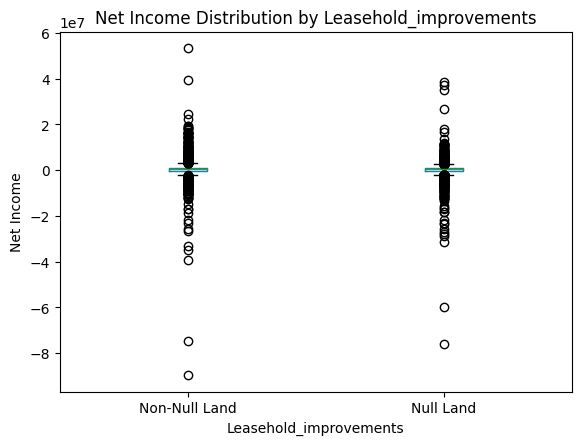

       Non-Null: Land    Null: Land
count    3.672000e+03  1.103300e+04
mean     2.822254e+05  2.821411e+05
std      3.683090e+06  2.013433e+06
min     -8.971656e+07 -7.619267e+07
25%     -3.890118e+05 -2.458870e+05
50%      2.483610e+05  2.863730e+05
75%      9.449652e+05  8.977870e+05
max      5.337325e+07  3.846258e+07
T-Test p-value: 0.9986076427019728
Mann-Whitney U Test p-value: nan


In [457]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Land"] = df_selected["Land"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Land", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Land", "Null Land"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Land"].notnull()]
df_null = df20_cleaned[df20_cleaned["Land"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Land": df_non_null["Net_Income"].describe(),
    "Null: Land": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

land is important to net income but the nulls dont matter. 

In [458]:
# Assuming df20_cleaned and df21_cleaned are already defined

def fill_land_values(df20, df21):
    # Create a mapping from df20_cleaned using Provider_CCN as the key
    land_mapping = df20.set_index("Provider_CCN")["Land"].dropna()
    
    # Fill df21_cleaned["Land"] only where it's NaN, based on the mapping
    df21["Land"] = df21.apply(
        lambda row: land_mapping.get(row["Provider_CCN"], row["Land"]) if pd.isna(row["Land"]) else row["Land"], 
        axis=1
    )
    
    return df21

df21_cleaned = fill_land_values(df20_cleaned, df21_cleaned)

In [459]:
# Create a mapping while handling duplicates by taking the first occurrence
land_mapping = df20_cleaned.groupby("Provider_CCN")["Land"].first()

# Map df19["Provider_CCN"] to the cleaned land_mapping
df19["Land"] = df19["Provider_CCN"].map(land_mapping)
df18["Land"] = df18["Provider_CCN"].map(land_mapping)
df17["Land"] = df17["Provider_CCN"].map(land_mapping)
df16["Land"] = df16["Provider_CCN"].map(land_mapping)
df15["Land"] = df15["Provider_CCN"].map(land_mapping)


In [460]:
df19

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1226920        525009  CROSSROADS CARE CENTER OF EAST GREEN   
1          1228236         45228                      MAPLE HEALTHCARE   
2          1230331        435123          GOOD SAMARITAN SOCIETY-SELBY   
3          1232670        525232            CCC OF WEST GREEN BAY  LLC   
4          1235138         35270    LA ESTANCIA NURSING & REHAB CENTER   
...            ...           ...                                   ...   
15177      1347594        395628        RENAISSANCE HEALTHCARE & REHAB   
15178      1350728        396122     FOX SUBACUTE CTR AT MECHANICSBURG   
15179      1352460        396141    FOX SUBACUTE AT SOUTH PHILADELPHIA   
15180      1356468        345205    WESTWOOD HILLS NURSING & REHAB CTR   
15181      1364900        375567               MEMORIAL NURSING CENTER   

                 Street_Address           City State_Code    Zip_Code  \
0          600 S WEBSTER AVENUE      GREEN BAY         WI       54301   
1            200 S MAPLE STREET          HAZEN         AR       72064   
2              4861 LINCOLN AVE          SELBY         SD  57472-0299   
3           1760 SHAWANO AVENUE      GREEN BAY         WI       54303   
4       15810 SOUTH 42ND STREET        PHOENIX         AZ       85048   
...                         ...            ...        ...         ...   
15177          4712 CHESTER AVE   PHILADELPHIA         PA       19072   
15178  120 SOUTH FILBERT STREET  MECHANICSBURG         PA       17055   
15179   1930 SOUTH BROAD STREET   PHILADELPHIA         PA       19145   
15180      1016 FLETCHER STREET     WILKESBORO         NC       28697   
15181        319 EAST JOSEPHINE      FREDERICK         OK       73542   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0             BROWN                   NaN                NaN   
1           PRAIRIE               99904.0                  R   
2          WALWORHT               99943.0                  R   
3             BROWN                   NaN                NaN   
4          MARICOPA               38060.0                  U   
...             ...                   ...                ...   
15177  PHILADELPHIA               37964.0                  U   
15178    CUMBERLAND               25420.0                  U   
15179  PHILADELPHIA               37964.0                  U   
15180        WILKES               99934.0                  R   
15181       TILLMAN               99937.0                  R   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                        NaN                  NaN                4   
1                  11/1/2018           12/31/2018                4   
2                  10/1/2018           11/30/2018                4   
3                        NaN                  NaN                4   
4                  11/1/2018           12/31/2018                4   
...                      ...                  ...              ...   
15177               7/1/2019            6/30/2020                4   
15178               7/1/2019            6/30/2020                4   
15179               1/1/2019           12/31/2019                4   
15180              10/1/2018            9/30/2019                4   
15181               7/1/2019            6/30/2020                4   

       Accounts_Receivable  Accounts_payable  Buildings  \
0                      NaN               NaN        NaN   
1                 138970.0            7613.0        NaN   
2                 320167.0          151920.0     2528.0   
3                      NaN               NaN        NaN   
4                1265667.0          222514.0  4242811.0   
...                    ...               ...        ...   
15177            -325256.0         1529461.0        NaN   
15178            4496967.0          311411.0   128302.0   
15179            3915965.0         1999253.0        NaN   
15180            1960581.0           8715

# Inventory

In [461]:
df_land20 = df20_cleaned[[
    "Provider_CCN", "Cash_on_hand_and_in_banks",
    "Accounts_Receivable",
    "Inventory",
    "Prepaid_expenses",
    "Other_current_assets",
    "Total_Current_Assets",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"
]]

df_land20

Provider_CCN  Cash_on_hand_and_in_banks  Accounts_Receivable  \
0             75031                    15647.0            1223466.0   
1            495268                   -15807.0              55469.0   
2            295107                   -20979.0            1533839.0   
3            146097                      700.0            2372254.0   
4            215136                   281625.0            1923803.0   
...             ...                        ...                  ...   
14944        105382                     9637.0            2399292.0   
14945        145970                        NaN           10005188.0   
14946        375567                    14948.0               1400.0   
14947        415071                   154802.0             766098.0   
14948         56261                     6188.0            2032241.0   

       Inventory  Prepaid_expenses  Other_current_assets  \
0        65289.0           24359.0                   NaN   
1            NaN         -318469.0                   NaN   
2            NaN           50238.0                   NaN   
3        15035.0           35995.0                   NaN   
4            NaN          111574.0                   NaN   
...          ...               ...                   ...   
14944        NaN          119308.0                   NaN   
14945        NaN          641462.0              305118.0   
14946        NaN               NaN                   NaN   
14947        NaN          416772.0                   NaN   
14948        NaN          281919.0                   NaN   

       Total_Current_Assets  \
0                 1284327.0   
1                 -278807.0   
2                 1433191.0   
3                 2341666.0   
4                 2317002.0   
...                     ...   
14944             2058583.0   
14945             5964739.0   
14946               16348.0   
14947             1331299.0   
14948             2293162.0   

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  
0                                               135613.0                 
1                                                    NaN                 
2                                                 4500.0                 
3                                                82713.0                 
4                                                    NaN                 
...                                                  ...                 
14944                                           191291.0                 
14945                                          4987029.0                 
14946                                                NaN                 
14947                                            45011.0                 
14948                                            32889.0                 

[14949 rows x 8 columns]

In [462]:
df_land21 = df21_cleaned[[
    "Provider_CCN", "Cash_on_hand_and_in_banks",
    "Accounts_Receivable",
    "Inventory",
    "Prepaid_expenses",
    "Other_current_assets",
    "Total_Current_Assets",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"
]]

# Display the DataFrame
df_l = df_land21[df_land21['Provider_CCN'] == 146097]
df_l

Provider_CCN  Cash_on_hand_and_in_banks  Accounts_Receivable  \
11796        146097                  -331759.0            1180754.0   

       Inventory  Prepaid_expenses  Other_current_assets  \
11796        NaN           53329.0                   NaN   

       Total_Current_Assets  \
11796              737892.0   

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  
11796                                           171022.0

inventory is not very reliable. How can 65k of inventory be at a provider one year and the next year its NA?

The numbers change from year to year or are NA. so idk if i can just simply fill this into the other years. Maybe by average.

In [463]:
selected_columns = [
    "Inventory", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Inventory']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Leasehold_improvements: 0.04114545676869758
T-statistic: 36.6755699664931
P-value: 0.0
Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.


not by much tho

In [464]:

df_selected = df20_cleaned[selected_columns]
# Create a new column for grouping
df_selected["Inventory"] = df_selected["Inventory"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_selected.boxplot(column="Net_Income", by="Inventory", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Inventory", "Null Inventory"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df20_cleaned[df20_cleaned["Inventory"].notnull()]
df_null = df20_cleaned[df20_cleaned["Inventory"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null: Inventory": df_non_null["Net_Income"].describe(),
    "Null: Inventory": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\3253501904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Inventory"] = df_selected["Inventory"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

       Non-Null: Inventory  Null: Inventory
count         4.998000e+03     9.707000e+03
mean          2.246357e+05     3.117818e+05
std           3.376971e+06     1.965861e+06
min          -8.971656e+07    -7.619267e+07
25%          -3.917915e+05    -2.174100e+05
50%           2.262230e+05     3.062770e+05
75%           8.627152e+05     9.214895e+05
max           5.337325e+07     3.846258e+07
T-Test p-value: 0.04834517363818893
Mann-Whitney U Test p-value: nan


In [465]:
df15['Inventory'] = np.nan
df16['Inventory'] = np.nan
df17['Inventory'] = np.nan
df18['Inventory'] = np.nan
df19['Inventory'] = np.nan

# Prepaid_expenses

In [466]:
# Define the list of expense-related columns
expense_columns = [
    "Provider_CCN", "Total_Charges", "Total_Costs", "Wage-related_Costs_(core)", "Total_Salaries_(adjusted)", 
    "Contract_Labor", "Overhead_Non_Salary_Costs", "Less_discounts_on_patients", 
    "Less_Total_Operating_Expense", "Accounts_payable", "Payroll_taxes_payable", 
    "Notes_and_Loans_Payable_(short_term)", "Other_current_liabilities", "Total_current_liabilities", 
    "Mortgage_payable", "Notes_Payable", "Other_long_term_liabilities", "Total_long_term_liabilities", 
    "Total_liabilities", "Allowable_Bad_Debts", 
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable", "Cash_on_hand_and_in_banks", 
    "Accounts_Receivable", "Inventory", "Other_current_assets", 
    "Total_Current_Assets", "Investments", "Land", "Land_improvements", "Buildings", "Leasehold_improvements", 
    "Fixed_equipment", "Major_movable_equipment", "Total_fixed_Assets", "Investments", 
    "Other_Assets", "Total_other_Assets", "Total_Assets", "Total_General_Inpatient_Care_Services_Revenue", 
    "Inpatient_Revenue", "Gross_Revenue", "Net_Patient_Revenue", "Net_Income_from_service_to_patients", 
    "Total_Other_Income", "Total_Income", "Net_Income", "Inpatient_PPS_Amount", 
    "Salaries_wages_and_fees_payable", "Prepaid_expenses"
]

# Select only the expense-related columns from df20_cleaned
df20_expenses = df20_cleaned[expense_columns]

# Display the first few rows
df20_expenses.head()


Provider_CCN  Total_Charges  Total_Costs  Wage-related_Costs_(core)  \
0         75031       299558.0     195203.0                    79053.0   
1        495268       254234.0     210445.0                    60217.0   
2        295107       791188.0     492172.0                    83667.0   
3        146097        34477.0      42549.0                    33821.0   
4        215136       137122.0     222656.0                   103797.0   

   Total_Salaries_(adjusted)  Contract_Labor  Overhead_Non_Salary_Costs  \
0                   371857.0        136024.0                   651205.0   
1                   369008.0        156009.0                   707183.0   
2                   713984.0         17352.0                  1021337.0   
3                   324450.0             NaN                   590251.0   
4                   844993.0             NaN                  1035955.0   

   Less_discounts_on_patients  Less_Total_Operating_Expense  Accounts_payable  \
0                    712087.0                     1023062.0          493549.0   
1                    472648.0                     1076191.0           73933.0   
2                    364289.0                     1735321.0           90834.0   
3                    183413.0                      914701.0          463420.0   
4                         NaN                     1880948.0          958326.0   

   Payroll_taxes_payable  Notes_and_Loans_Payable_(short_term)  \
0                    NaN                              566616.0   
1              -337340.0                                   NaN   
2                    NaN                                   NaN   
3                26575.0                                   NaN   
4                 -177.0                                   NaN   

   Other_current_liabilities  Total_current_liabilities  Mortgage_payable  \
0                   146013.0                  1509159.0         8194774.0   
1                     5427.0                  -257980.0               NaN   
2                    11931.0                   245384.0               NaN   
3                   354342.0                   937284.0         5923181.0   
4                 15092370.0                 16471912.0               NaN   

   Notes_Payable  Other_long_term_liabilities  Total_long_term_liabilities  \
0            NaN                          NaN                    8194774.0   
1            NaN                        257.0                        259.0   
2       515503.0                          NaN                    3287601.0   
3       500000.0                          NaN                    6423181.0   
4            NaN                          NaN                          NaN   

   Total_liabilities  Allowable_Bad_Debts  \
0          9703933.0               4814.0   
1          -257721.0                  NaN   
2          3532985.0                  NaN   
3          7360465.0               3876.0   
4         16471912.0                  NaN   

   Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
0                                           135613.0                  
1                                                NaN                  
2                                             4500.0                  
3                                            82713.0                  
4                                                NaN                  

   Cash_on_hand_and_in_banks  Accounts_Receivable  Inventory  \
0                    15647.0            1223466.0    65289.0   
1                   -15807.0              55469.0        NaN   
2                   -20979.0            1533839.0        NaN   
3                      700.0            2372254.0    15035.0   
4                   281625.0            1923803.0        NaN   

   Other_current_assets  Total_Current_Assets  Investments     Land  \
0                   NaN             1284327.0          NaN      NaN   
1                   NaN             -278807.0          NaN      Na

In [467]:
df20_expenses["Prepaid_expenses_test"] = (
    df20_expenses["Total_Current_Assets"] 
    + df20_expenses["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].fillna(0)
) - df20_expenses[["Cash_on_hand_and_in_banks", "Accounts_Receivable","Inventory", "Other_current_assets"]].sum(axis=1, skipna=True)  # Ignores NaN values in the sum

df20_expenses


C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\2221300862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20_expenses["Prepaid_expenses_test"] = (


Provider_CCN  Total_Charges  Total_Costs  Wage-related_Costs_(core)  \
0             75031       299558.0     195203.0                    79053.0   
1            495268       254234.0     210445.0                    60217.0   
2            295107       791188.0     492172.0                    83667.0   
3            146097        34477.0      42549.0                    33821.0   
4            215136       137122.0     222656.0                   103797.0   
...             ...            ...          ...                        ...   
14944        105382      1454089.0    1585761.0                   680814.0   
14945        145970      3325030.0    1322483.0                  1110438.0   
14946        375567        19670.0      16221.0                   372070.0   
14947        415071       453329.0     363700.0                   218453.0   
14948         56261      1049604.0     990470.0                   552231.0   

       Total_Salaries_(adjusted)  Contract_Labor  Overhead_Non_Salary_Costs  \
0                       371857.0        136024.0                   651205.0   
1                       369008.0        156009.0                   707183.0   
2                       713984.0         17352.0                  1021337.0   
3                       324450.0             NaN                   590251.0   
4                       844993.0             NaN                  1035955.0   
...                          ...             ...                        ...   
14944                  4620444.0         28405.0                  7267864.0   
14945                  6897345.0        956956.0                 10205508.0   
14946                  1217063.0             NaN                   935345.0   
14947                  1408295.0        255632.0                  2134249.0   
14948                  4991128.0        498812.0                  5035803.0   

       Less_discounts_on_patients  Less_Total_Operating_Expense  \
0                        712087.0                     1023062.0   
1                        472648.0                     1076191.0   
2                        364289.0                     1735321.0   
3                        183413.0                      914701.0   
4                             NaN                     1880948.0   
...                           ...                           ...   
14944                   9567596.0                    11888308.0   
14945                    205457.0                    17102853.0   
14946                         NaN                     2152408.0   
14947                   1010345.0                     3542544.0   
14948                  -1394622.0                    10026931.0   

       Accounts_payable  Payroll_taxes_payable  \
0              493549.0                    NaN   
1               73933.0              -337340.0   
2               90834.0                    NaN   
3              463420.0                26575.0   
4              958326.0                 -177.0   
...                 ...                    ...   
14944          500847.0                    NaN   
14945          371095.0                    NaN   
14946          117096.0                    NaN   
14947           95290.0                74483.0   
14948         1750174.0               190689.0   

       Notes_and_Loans_Payable_(short_term)  Other_current_liabilities  \
0                                  566616.0                   146013.0   
1                                       NaN                     5427.0   
2                                       NaN                    11931.0   
3                                       NaN                   354342.0   
4                                       NaN                 15092370.0   
...                                     ...                        ...   
14944                             1118578.0                    69940.0   
14945                                   NaN                  3910631.0   
14946                                   NaN      

In [468]:
# Select only the relevant columns for the calculation
df_filtered = df20_expenses[[
    "Total_Current_Assets", 
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable", 
    "Allowable_Bad_Debts", 
    "Cash_on_hand_and_in_banks", 
    "Accounts_Receivable", 
    "Inventory", 
    "Other_current_assets"
]]

# Display the filtered dataframe
df_filtered


Total_Current_Assets  \
0                 1284327.0   
1                 -278807.0   
2                 1433191.0   
3                 2341666.0   
4                 2317002.0   
...                     ...   
14944             2058583.0   
14945             5964739.0   
14946               16348.0   
14947             1331299.0   
14948             2293162.0   

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
0                                               135613.0                  
1                                                    NaN                  
2                                                 4500.0                  
3                                                82713.0                  
4                                                    NaN                  
...                                                  ...                  
14944                                           191291.0                  
14945                                          4987029.0                  
14946                                                NaN                  
14947                                            45011.0                  
14948                                            32889.0                  

       Allowable_Bad_Debts  Cash_on_hand_and_in_banks  Accounts_Receivable  \
0                   4814.0                    15647.0            1223466.0   
1                      NaN                   -15807.0              55469.0   
2                      NaN                   -20979.0            1533839.0   
3                   3876.0                      700.0            2372254.0   
4                      NaN                   281625.0            1923803.0   
...                    ...                        ...                  ...   
14944            1320104.0                     9637.0            2399292.0   
14945             292024.0                        NaN           10005188.0   
14946                  NaN                    14948.0               1400.0   
14947                  NaN                   154802.0             766098.0   
14948                  NaN                     6188.0            2032241.0   

       Inventory  Other_current_assets  
0        65289.0                   NaN  
1            NaN                   NaN  
2            NaN                   NaN  
3        15035.0                   NaN  
4            NaN                   NaN  
...          ...                   ...  
14944        NaN                   NaN  
14945        NaN              305118.0  
14946        NaN                   NaN  
14947        NaN                   NaN  
14948        NaN                   NaN  

[14949 rows x 7 columns]

In [469]:
df20_expenses[[
    "Total_Current_Assets", 
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable", 
    "Allowable_Bad_Debts", 
    "Cash_on_hand_and_in_banks", 
    "Accounts_Receivable", 
    "Inventory", 
    "Other_current_assets",
    "Prepaid_expenses_test", 
    "Prepaid_expenses"]]

Total_Current_Assets  \
0                 1284327.0   
1                 -278807.0   
2                 1433191.0   
3                 2341666.0   
4                 2317002.0   
...                     ...   
14944             2058583.0   
14945             5964739.0   
14946               16348.0   
14947             1331299.0   
14948             2293162.0   

       Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
0                                               135613.0                  
1                                                    NaN                  
2                                                 4500.0                  
3                                                82713.0                  
4                                                    NaN                  
...                                                  ...                  
14944                                           191291.0                  
14945                                          4987029.0                  
14946                                                NaN                  
14947                                            45011.0                  
14948                                            32889.0                  

       Allowable_Bad_Debts  Cash_on_hand_and_in_banks  Accounts_Receivable  \
0                   4814.0                    15647.0            1223466.0   
1                      NaN                   -15807.0              55469.0   
2                      NaN                   -20979.0            1533839.0   
3                   3876.0                      700.0            2372254.0   
4                      NaN                   281625.0            1923803.0   
...                    ...                        ...                  ...   
14944            1320104.0                     9637.0            2399292.0   
14945             292024.0                        NaN           10005188.0   
14946                  NaN                    14948.0               1400.0   
14947                  NaN                   154802.0             766098.0   
14948                  NaN                     6188.0            2032241.0   

       Inventory  Other_current_assets  Prepaid_expenses_test  \
0        65289.0                   NaN               115538.0   
1            NaN                   NaN              -318469.0   
2            NaN                   NaN               -75169.0   
3        15035.0                   NaN                36390.0   
4            NaN                   NaN               111574.0   
...          ...                   ...                    ...   
14944        NaN                   NaN              -159055.0   
14945        NaN              305118.0               641462.0   
14946        NaN                   NaN                    0.0   
14947        NaN                   NaN               455410.0   
14948        NaN                   NaN               287622.0   

       Prepaid_expenses  
0               24359.0  
1             -318469.0  
2               50238.0  
3               35995.0  
4              111574.0  
...                 ...  
14944          119308.0  
14945          641462.0  
14946               NaN  
14947          416772.0  
14948          281919.0  

[14949 rows x 9 columns]

Some are the calculated well and some aren't. I explored the patterns i see but there is no say of what differentiates the correct ones from the incorrect ones. I thought maybe when Allowable debts and Less:... are NA then it is accurate but it wasnt true in the rest of the data set.

In [470]:
# Count how many of the values in the two columns are equal
equal_count = (df20_expenses["Prepaid_expenses_test"] == df20_expenses["Prepaid_expenses"]).sum()

# Count how many are not equal
not_equal_count = (df20_expenses["Prepaid_expenses_test"] != df20_expenses["Prepaid_expenses"]).sum()

# Calculate accuracy (the percentage of equal values)
accuracy = equal_count / len(df20_expenses) * 100

# Display the results
equal_count, not_equal_count, accuracy


(4447, 10502, 29.74780921800789)

In [471]:
# Calculate 95% and 90% accuracy intervals for each row
df20_expenses["95%_lower"] = df20_expenses["Prepaid_expenses"] * 0.5
df20_expenses["95%_upper"] = df20_expenses["Prepaid_expenses"] * 1.5

df20_expenses["90%_lower"] = df20_expenses["Prepaid_expenses"] * 0.90
df20_expenses["90%_upper"] = df20_expenses["Prepaid_expenses"] * 1.10

# Check how many are within the 95% and 90% intervals
within_95 = ((df20_expenses["Prepaid_expenses_test"] >= df20_expenses["95%_lower"]) &
             (df20_expenses["Prepaid_expenses_test"] <= df20_expenses["95%_upper"]))

within_90 = ((df20_expenses["Prepaid_expenses_test"] >= df20_expenses["90%_lower"]) &
             (df20_expenses["Prepaid_expenses_test"] <= df20_expenses["90%_upper"]))

# Calculate the percentage within each range
percentage_within_95 = within_95.sum() / len(df20_expenses) * 100
percentage_within_90 = within_90.sum() / len(df20_expenses) * 100

percentage_within_95, percentage_within_90


C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\3160295716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20_expenses["95%_lower"] = df20_expenses["Prepaid_expenses"] * 0.5
C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\3160295716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20_expenses["95%_upper"] = df20_expenses["Prepaid_expenses"] * 1.5
C:\Users\lukep\AppData\Local\Temp\ipykernel_9168\3160295716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

(41.74192253662453, 34.611010769951164)

This calculation is not accurate at all really. so i shouldnt use it. 

This makes no sense the Accounts receivable is greater than total current assets and Total Assets. Something is wrong there. 

In [472]:
# Adjust Accounts_Receivable by subtracting bad debts and allowances
adjusted_AR = df20_expenses["Accounts_Receivable"] - (
    df20_expenses["Allowable_Bad_Debts"].fillna(0) + 
    df20_expenses["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].fillna(0)
)

# Count where adjusted AR is greater than Total Current Assets
count_issues = (adjusted_AR > df20_expenses["Total_Current_Assets"]).sum()

print(f"Count of Adjusted Accounts_Receivable greater than Total_Current_Assets: {count_issues}")



Count of Adjusted Accounts_Receivable greater than Total_Current_Assets: 1102


In [473]:
# Adjust Accounts_Receivable by subtracting bad debts and allowances
adjusted_AR = df20_expenses["Accounts_Receivable"] - (
    df20_expenses["Allowable_Bad_Debts"].fillna(0) + 
    df20_expenses["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].fillna(0)
)

# Count where adjusted AR is greater than Total Current Assets
count_issues = (adjusted_AR > df20_expenses["Total_Assets"]).sum()

print(f"Count of Adjusted Accounts_Receivable greater than Total_Assets: {count_issues}")


Count of Adjusted Accounts_Receivable greater than Total_Assets: 783


These are just wrong. AR (minus the allowances) and plus the other types of current_assets should make up total current assets and total assets. 

I will ask about this. I need to look at other irregularities like this.

In [474]:
selected_columns = [
    "Prepaid_expenses", 
    "Net_Income", 
]

df_selected = df21_cleaned[selected_columns]
df_selected.sample(10)
df_selected = df_selected.dropna()
# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected['Prepaid_expenses']  # Predictor (independent variable)
y = df_selected['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Prepaid_expenses: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Prepaid_expenses is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Prepaid_expenses is not significant in predicting Net_Income.")


Coefficient (Slope) for Prepaid_expenses: -0.003745918308813444
T-statistic: -15.230741819973954
P-value: 0.0
Reject the null hypothesis: Prepaid_expenses is significant in predicting Net_Income.


I will keep it in for now but then I should take it out if there are other current assets that are correlated with net_income

In [475]:
df15['Prepaid_expenses'] = np.nan
df16['Prepaid_expenses'] = np.nan
df17['Prepaid_expenses'] = np.nan
df18['Prepaid_expenses'] = np.nan
df19['Prepaid_expenses'] = np.nan

In [477]:
# Find columns in df1 but not in df2
cols_in_d20 = list(set(df20_cleaned.columns) - set(df19.columns))

# Find columns in df2 but not in df1
cols_in_df19 = list(set(df19.columns) - set(df20_cleaned.columns))

# Print results
print("Columns in d20 not in df19:", cols_in_d20)
print("Columns in df19 nit in df20:", cols_in_df19)

Columns in d20 not in df19: []
Columns in df19 nit in df20: []


Text(0.5, 1.0, 'Missing Values Heatmap')

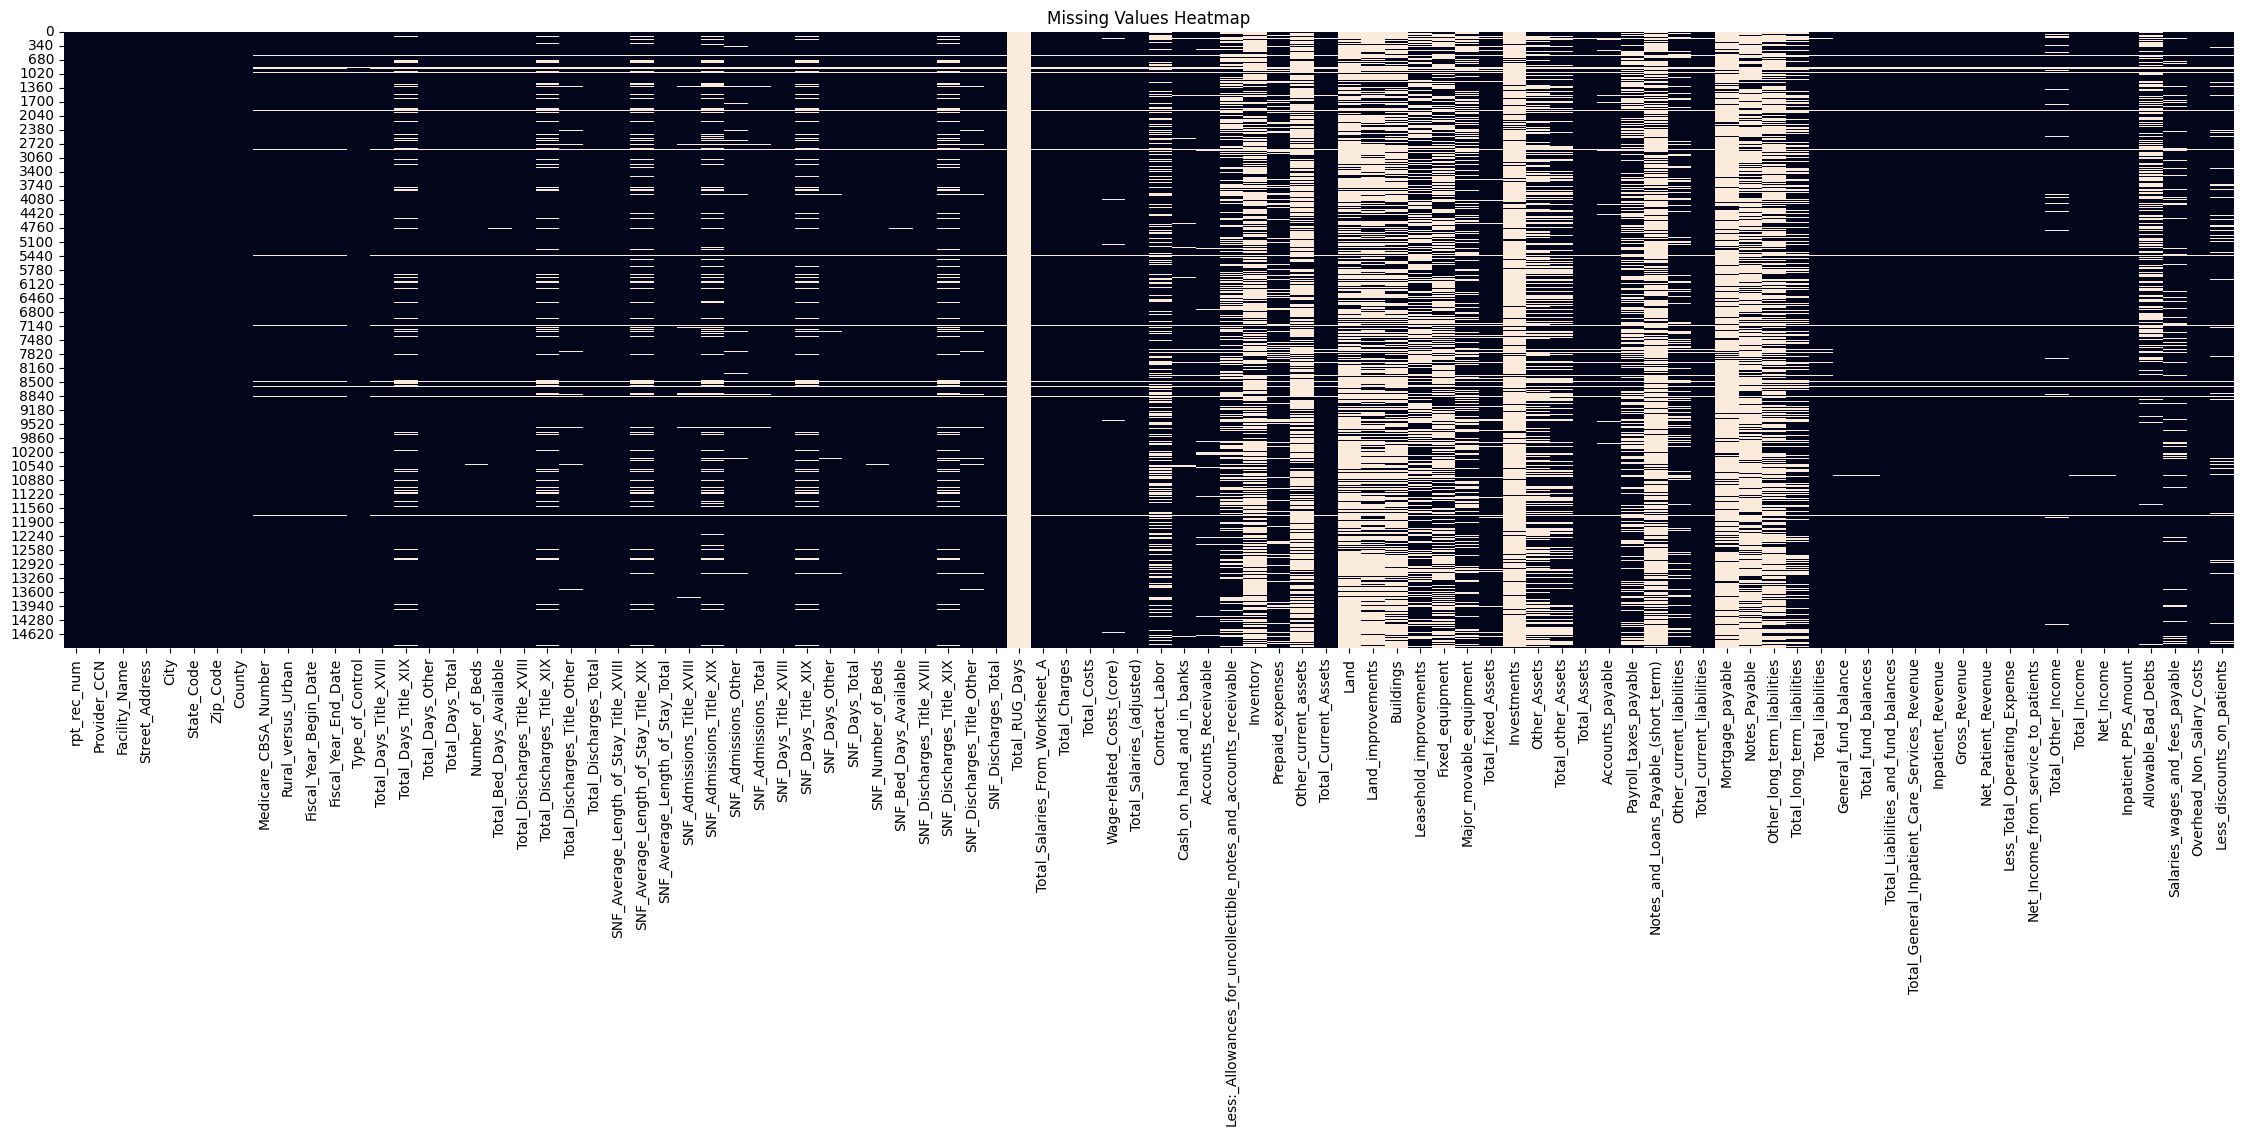

In [478]:
plt.figure(figsize=(28, 8))
sns.heatmap(df20_cleaned.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

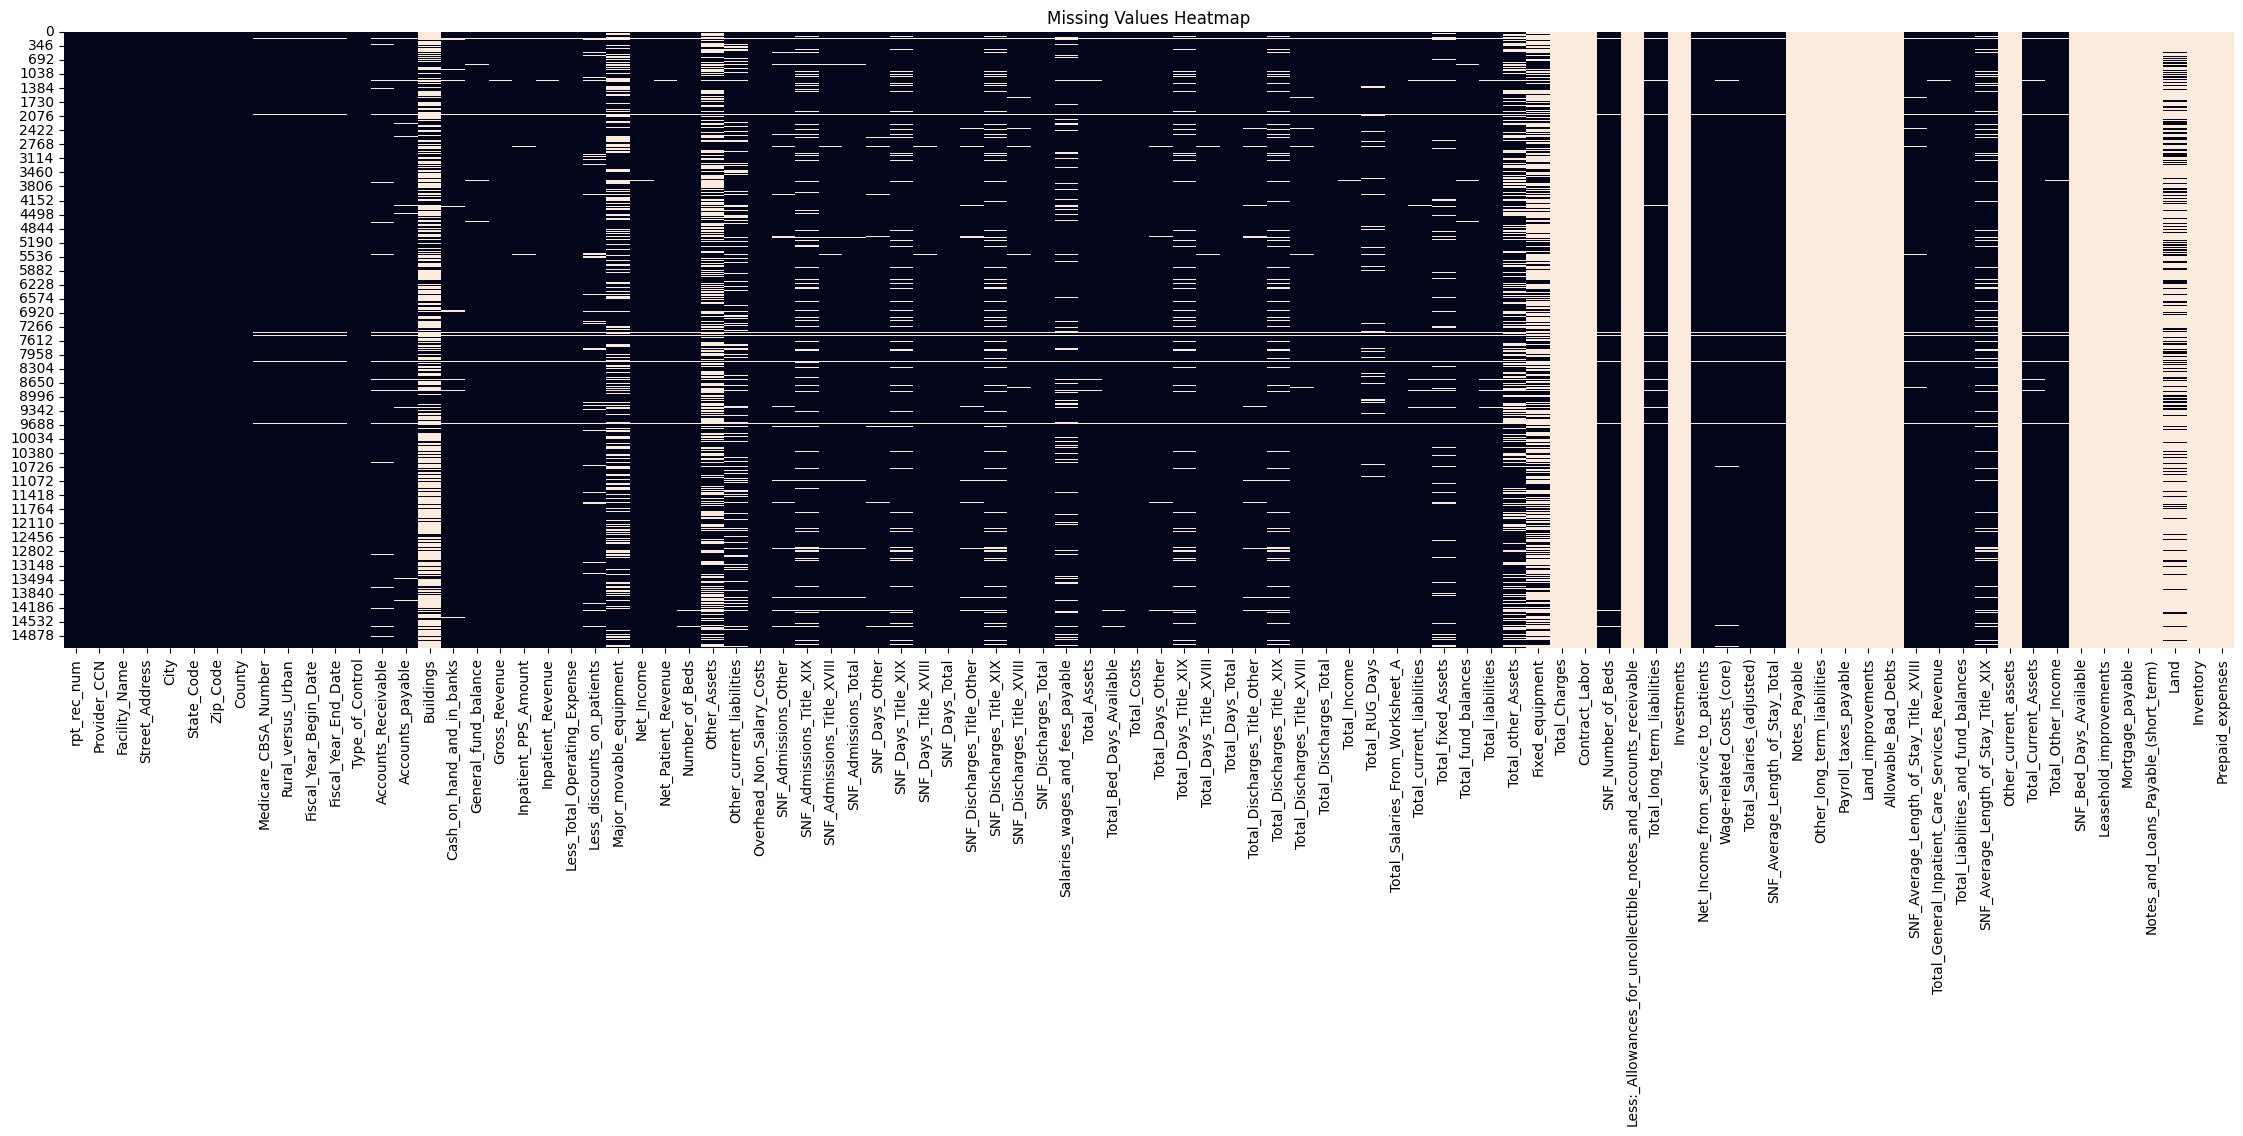

In [479]:
plt.figure(figsize=(28, 8))
sns.heatmap(df19.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

## Make a Key (Year) for each dataset

In [482]:
# Add 'Year' column to each dataframe
df15['Year'] = 2015
df16['Year'] = 2016
df17['Year'] = 2017
df18['Year'] = 2018
df19['Year'] = 2019
df20_cleaned['Year'] = 2020
df21_cleaned['Year'] = 2021

df17

rpt_rec_num  Provider_CCN                         Facility_Name  \
0          1156385        225718      HANCOCK PARK LIMITED PARTNERSHIP   
1          1157220        345507           AUTUMN CARE OF MYRTLE GROVE   
2          1157221        345222                 AUTUMN CARE OF DREXEL   
3          1157223        345567              AUTUMN CARE OF CORNELIUS   
4          1159776        345269              AUTUMN CARE OF SALISBURY   
...            ...           ...                                   ...   
15428      1342926        255161      NMMC-BALDWYN SKILLED NURSING FAC   
15429      1346257        425314  SOUTHERN OAKS REHABILITATION AND HEA   
15430      1346418        215005   NEW ANNAPOLIS NRSG AND REHAB CENTER   
15431      1346803        445225  7026 SIGNATURE HEALTHCARE AT METHODI   
15432      1355290        345205    WESTWOOD HILLS NURSING & REHAB CTR   

                 Street_Address        City State_Code    Zip_Code  \
0                164 PARKINGWAY      QUINCY         MA        2169   
1      5725 CAROLINA BEACH ROAD  WILMINGTON         NC  28412-2611   
2            307 OAKLAND AVENUE   MORGANTON         NC  28655-6928   
3         19530 MT ZION PARKWAY   CONNELIUS         NC  28031-8398   
4       1505 BRINGLE FERRY ROAD   SALISBURY         NC  28146-4776   
...                         ...         ...        ...         ...   
15428   739 FOURTH STREET SOUTH     BALDWYN         MS       38824   
15429            109 BENTZ ROAD    PIEDMONT         SC       29673   
15430      900 VAN BUREN STREET   ANNAPOLIS         MD       21401   
15431            1265 UNION AVE     MEMPHIS         TN  38104-3415   
15432      1016 FLETCHER STREET  WILKESBORO         NC       28697   

             County  Medicare_CBSA_Number Rural_versus_Urban  \
0           NORFOLK               14454.0                  U   
1       NEW HANOVER               48900.0                  U   
2             BURKE               25860.0                  U   
3       MECKLENBURG               16740.0                  U   
4             ROWAN               16740.0                  U   
...             ...                   ...                ...   
15428           LEE               99925.0                  R   
15429      ANDERSON               24860.0                  U   
15430  ANNE ARUNDEL               12580.0                  U   
15431        SHELBY               32820.0                  U   
15432        WILKES               99934.0                  R   

      Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                  10/1/2016           10/31/2016                4   
1                  10/1/2016           12/31/2016                4   
2                  10/1/2016           12/31/2016                4   
3                  10/1/2016           12/31/2016                4   
4                  10/1/2016           12/31/2016                4   
...                      ...                  ...              ...   
15428              10/1/2016            9/30/2017                4   
15429               1/1/2017           12/31/2017                4   
15430               1/1/2017            1/31/2018                4   
15431               1/1/2017            1/20/2018                4   
15432              10/1/2016            9/30/2017                4   

       Accounts_Receivable  Accounts_payable   Buildings  \
0                2051299.0          799750.0  16043578.0   
1                 729841.0          333058.0         NaN   
2                 838625.0          353341.0         NaN   
3                 877313.0          308233.0         NaN   
4                 906715.0          277266.0         NaN   
...                    ...               ...         ...   
15428            2530564.0               NaN   1532500.0   
15429            1655328.0           23840.0   8798838.0   
15430            2679985.0          311459.0    213533.0   
15431             447799.0          229548.0         NaN   
15432  

## Third Append the years together

In [483]:
# List all the dataframes to append
dfs = [df15, df16, df17, df18, df19, df20_cleaned, df21_cleaned]

# Append the dataframes
df_combined = pd.concat(dfs, ignore_index=True)

# Display the combined dataframe
df_combined


rpt_rec_num  Provider_CCN                         Facility_Name  \
0           1089712        495134  RIDGECREST MANOR NURSING & REHAB CTR   
1           1091410         75417        REGENCY HEIGHTS OF NORWICH LLC   
2           1093283        165252            WESTVIEW ACRES CARE CENTER   
3           1095547        225497          VERO HEALTH & REHAB  PARKWAY   
4           1095966        265161         WILSONS CREEK NURSING & REHAB   
...             ...           ...                                   ...   
106264      1365869        505453             KIN ON HEALTH CARE CENTER   
106265      1365888        675765          LCS-WP  LLC DBA WALNUT PLACE   
106266      1365889        675932  STRATFORD HOSPITAL DISTRICT DBA ARBO   
106267      1365890        675956      WINDSOR NRS & REHAB CTR OF DUVAL   
106268      1365892        676481                 BETHANY SENIOR LIVING   

               Street_Address          City State_Code    Zip_Code  \
0        157 ROSS-CARTER BLVD      DUFFIELD         VA       24244   
1            60 CROUCH AVENUE       NORWICH         CT        6360   
2             203 SW LORRAINE          LEON         IA       50144   
3            1190 VFW PARKWAY  WEST ROXBURY         MA        2132   
4         3403 WEST MT VERNON   SPRINGFIELD         MO       65802   
...                       ...           ...        ...         ...   
106264     4416 SOUTH BRANDON       SEATTLE         WA       98118   
106265  5515 GLEN LAKES DRIVE        DALLAS         TX       75231   
106266   609 RIO CONCHO DRIVE    SAN ANGELO         TX  76903-6029   
106267     5301 W. DUVAL ROAD        AUSTIN         TX       78727   
106268  118 TRINITY SHORES DR   PORT LAVACA         TX       77979   

            County Medicare_CBSA_Number Rural_versus_Urban  \
0            SCOTT              28700.0                  U   
1       NEW LONDON              35980.0                  U   
2          DECATUR              99916.0                  R   
3          SUFFOLK              14454.0                  U   
4           GREENE              44180.0                  U   
...            ...                  ...                ...   
106264        KING              42644.0                  U   
106265      DALLAS              19124.0                  U   
106266   TOM GREEN              41660.0                  U   
106267      TRAVIS              12420.0                  U   
106268     CALHOUN              99945.0                  R   

       Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0                   11/1/2014           12/31/2014              4.0   
1                   10/1/2014           12/14/2014              4.0   
2                   10/1/2014           12/31/2014              4.0   
3                   11/1/2014           12/31/2014              4.0   
4                   12/1/2014           12/31/2014              4.0   
...                       ...                  ...              ...   
106264             01/01/2021           12/31/2021              2.0   
106265             01/01/2021           12/31/2021              6.0   
106266             01/01/2021           12/31/2021             11.0   
106267             01/01/2021           12/31/2021              6.0   
106268             01/01/2021           12/31/2021              8.0   

        Accounts_Receivable  Accounts_payable   Buildings  \
0                 1366877.0          292277.0         NaN   
1                 1326379.0               NaN         NaN   
2                  135859.0           79894.0         NaN   
3                 1222903.0          537451.0         NaN   
4                  634347.0          253637.0         NaN   
...                     ...               ...         ...   
106264             943077.0          207955.0   8083558.0   
106265            2122183.0          301619.0  14910479.0   
106266             762149.0          240719.0         NaN   
106267            1298809.0         -195157.0         NaN 

### BEAUTIFUL

Text(0.5, 1.0, 'Missing Values Heatmap')

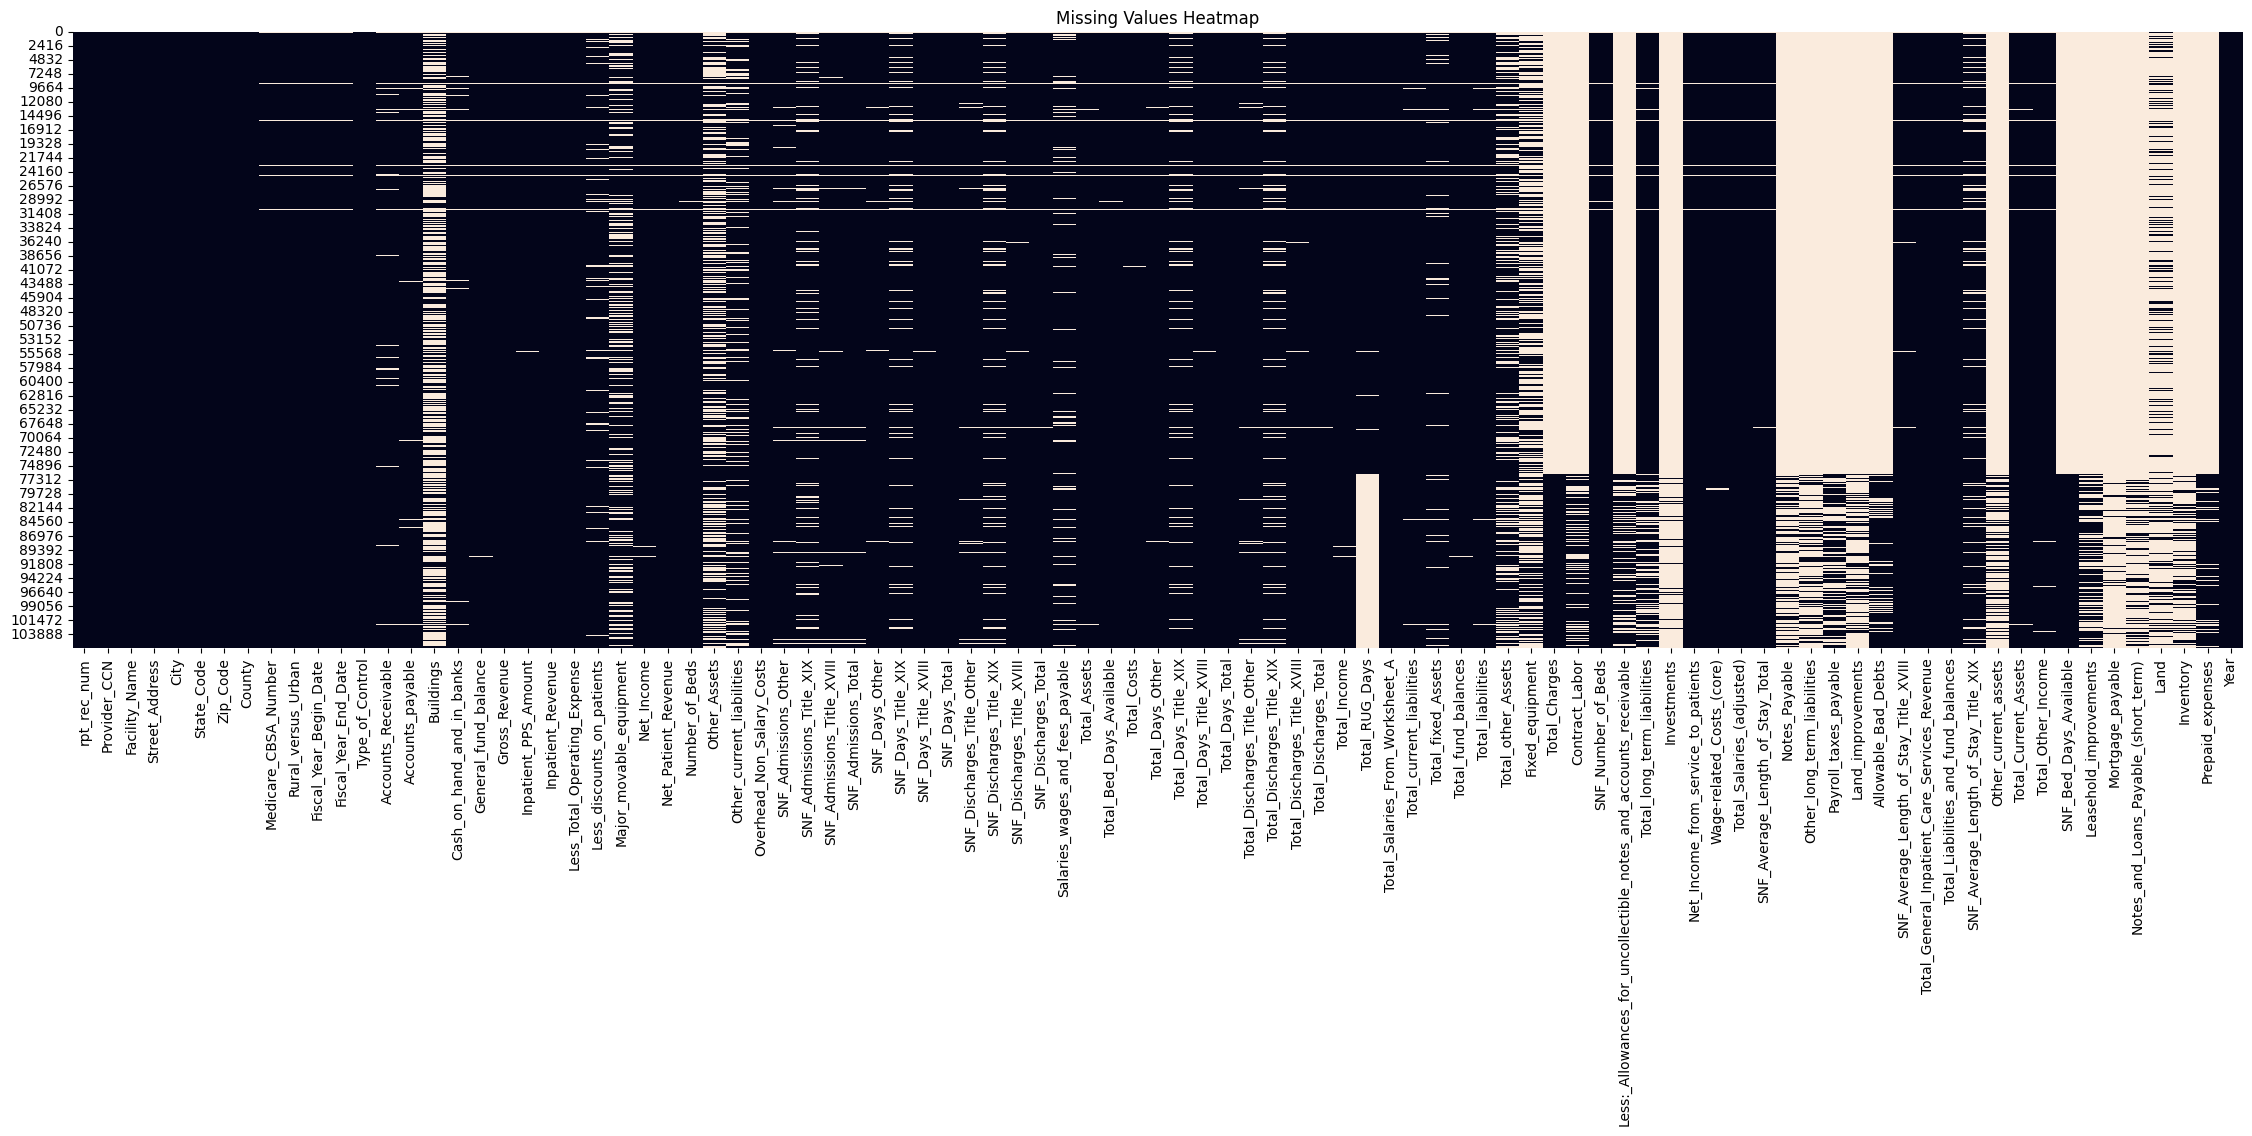

In [484]:
plt.figure(figsize=(28, 8))
sns.heatmap(df_combined.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

In [485]:
df_Cost = df_combined

### THE APPEND is Done. 

We know a lot more about the columns I ended up adding to the df15-df19 that were in the other years. 

We also understand the financial statements and how the asset variables liability variables, revenue variables, and company stock interact within these classes and within each other. 

### Next is to look at dealing with ALL the NAs 

The more clean your dataset, the better and easily your analysis will be.


In [486]:
# Export df_Cost to a CSV file
df_Cost.to_csv('df_Cost.csv', index=False)
# then move it to the dataset folder

I WILL DO THE NEXT PART IN ETL_COST_CORRELATION.IPYNB

# HOW TO HANDLE NAs
## Keep Missingness as a Feature:

Create a binary feature indicating whether the value is missing (1 for missing, 0 otherwise). This allows the model to capture any relationship between missingness and the target.
Impute Strategically:

## Impute missing values with a meaningful approach:
Numerical Data: Use mean, median, or target-specific group means.
Categorical Data: Use the most frequent category or a new category like "Missing".
### Advanced approaches: Predict missing values using a model based on other features.
## Test Different Approaches:

Try visualizing and modeling with and without the missingness feature to assess its predictive power.

Before deciding, it’s important to check if there is any pattern in the missing data. If the missing values tend to happen for certain types of entities (e.g., smaller companies or companies in a specific industry), that might influence your decision.

## Now we split up by datatype and visualize. 

### How to deal with NA's for Object
Years can be changed with confidence. 

We can't randomly put a CBSA Number. Missing ones have a large differnce though (maybe those are medicaid then which makes sense bc medicaid does better; if so then I make it binary 0,1 for medicare vs medicaid.). 

For Rural vs Urban we can take ZIP code and if any match ZIP and has RvsU then we can put that value in the missing one. And if not then we make another category as "not defined".

Missing street address can just put "not defined" 

### FLOAT 64 NA's Analysis by %

### How to deal with NA's for Float64
Fixed Equipment (a large number) can either put a value of 0 or see if we can predict using other features. 
Building - If "total assets" correlates well with the "Buildings" variable, you could use it to estimate the missing values. For example, you could create a model (e.g., regression) to predict the "Buildings" value based on "total assets" or use the average "Buildings" value for entities with similar asset sizes.


In [ ]:
print("\nModerate Missing (8% to 30%):")
moderate_missing


Moderate Missing (8% to 30%):


NameError: name 'moderate_missing' is not defined

In [ ]:
print("\nLow Missing (Less than 8%):")
low_missing


Low Missing (Less than 8%):


Data Type  Non-Null Count  Null Count  \
Net_Income                        float64           14911         491   
SNF_Discharges_Total              float64           14917         485   
Total_Days_Other                  float64           14917         485   
SNF_Average_Length_of_stay_Tot    float64           14917         485   
General_fund_balance              float64           14918         484   
Total_fund_balances               float64           14918         484   
Total_Discharges_Total            float64           14919         483   
Target                            float64           14920         482   
Total_Costs                       float64           14927         475   
Inpatient_PPS_Amount              float64           14931         471   
SNF_Days_Title_XVIII              float64           14931         471   
Total_RUG_Days                    float64           14931         471   
Total_Days_Title_XVIII            float64           14931         471   
Total_Liab_and_fund_balances      float64           14940         462   
Net_Income_from_patients          float64           14946         456   
SNF_Days_Total                    float64           14948         454   
Total_Days_Total                  float64           14949         453   
Total_Salaries_From_Worksheet_A   float64           14950         452   
Total_Salaries_adjusted           float64           14950         452   
Less_Total_Operating_Expense      float64           14950         452   
Overhead_Non_Salary_Costs         float64           14950         452   

                                 Unique Values Sample Value  \
Net_Income                               14818     311430.0   
SNF_Discharges_Total                      1206         49.0   
Total_Days_Other                         10797        534.0   
SNF_Average_Length_of_stay_Tot           11636       137.14   
General_fund_balance                     14716     311430.0   
Total_fund_balances                      14717     311430.0   
Total_Discharges_Total                    1217         49.0   
Target                                   14830     311431.0   
Total_Costs                              14887     211585.0   
Inpatient_PPS_Amount                     14849     154022.0   
SNF_Days_Title_XVIII                      7623        333.0   
Total_RUG_Days                            7623        333.0   
Total_Days_Title_XVIII                    7638        333.0   
Total_Liab_and_fund_balances             14752     765020.0   
Net_Income_from_patients                 14880     311308.0   
SNF_Days_Total                           13059       6720.0   
Total_Days_Total                         13099       6720.0   
Total_Salaries_From_Worksheet_A          14882     660232.0   
Total_Salaries_adjusted                  14885     660232.0   
Less_Total_Operating_Expense             14919    1209322.0   
Overhead_Non_Salary_Costs                14932     549090.0   

                                 Percent Missing (%)  Target Mean (Null Rows)  \
Net_Income                                  3.187898             1.135777e+05   
SNF_Discharges_Total                        3.148942            -1.310709e+05   
Total_Days_Other                            3.148942            -9.505792e+05   
SNF_Average_Length_of_stay_Tot              3.148942            -1.310709e+05   
General_fund_balance                        3.142449            -3.473836e+05   
Total_fund_balances                         3.142449            -3.473836e+05   
Total_Discharges_Total                      3.135956             2.588084e+04   
Target                                      3.129464                      NaN   
Total_Costs                                 3.084015            -9.765885e+05   
Inpatient_PPS_Amount                        3.058044            -5.968279e+05   
SNF_Days_Title_XVIII                        3.058044            -5.968279e+05   
Total_RUG_Days                              3.058044            -5

# Data Type
Ensure the datatype is right for each.

# Make a dataset with Dummies

Financial Related Questions: 

What financial and operational factors most significantly impact the profitability of nursing homes, and how do these factors correlate with the quality of care provided?" 

 

“How do those factors influence the profitability of the nursing homes over the change in years? 

 

“At what accuracy can we predict the profitability of a nursing home 1 to 5 years out? 

 

“What type of financial state should one specifically look out for that turns a profit 1 to 5 years out?” 

 

“Are there any nursing homes that aren’t currently doing well, but could efficiently turn a profit with the right adjustment/investment?” 